In [1]:
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns
import numpy as np
# importing required libraries for normalizing data
from sklearn.preprocessing import StandardScaler,LabelBinarizer,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
# representation of model layers
from tensorflow.keras.utils import plot_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score , classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import joblib
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB

2025-05-25 07:29:01.989794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748158142.216598      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748158142.281413      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


📌 Nhãn Mirai: Thêm 13,351 dòng, tổng cộng 13,351 dòng
📌 Nhãn DDoS: Thêm 174,841 dòng, tổng cộng 174,841 dòng
📌 Nhãn Spoofing: Thêm 2,572 dòng, tổng cộng 2,572 dòng
📌 Nhãn BENIGN: Thêm 5,645 dòng, tổng cộng 5,645 dòng
📌 Nhãn DoS: Thêm 41,221 dòng, tổng cộng 41,221 dòng
📌 Nhãn Recon: Thêm 1,876 dòng, tổng cộng 1,876 dòng
📌 Nhãn BruteForce: Thêm 55 dòng, tổng cộng 55 dòng
📌 Nhãn Web-based: Thêm 105 dòng, tổng cộng 105 dòng
📌 File 0: Giữ 239,666 dòng sau khi lọc giới hạn
📌 Nhãn Recon: Thêm 1,888 dòng, tổng cộng 3,764 dòng
📌 Nhãn DoS: Thêm 41,933 dòng, tổng cộng 83,154 dòng
📌 Nhãn DDoS: Thêm 176,390 dòng, tổng cộng 351,231 dòng
📌 Nhãn Mirai: Thêm 13,615 dòng, tổng cộng 26,966 dòng
📌 Nhãn Spoofing: Thêm 2,544 dòng, tổng cộng 5,116 dòng
📌 Nhãn BENIGN: Thêm 5,778 dòng, tổng cộng 11,423 dòng
📌 Nhãn Web-based: Thêm 147 dòng, tổng cộng 252 dòng
📌 Nhãn BruteForce: Thêm 70 dòng, tổng cộng 125 dòng
📌 File 1: Giữ 242,365 dòng sau khi lọc giới hạn
📌 Nhãn DoS: Thêm 40,184 dòng, tổng cộng 123,338 dòng
📌

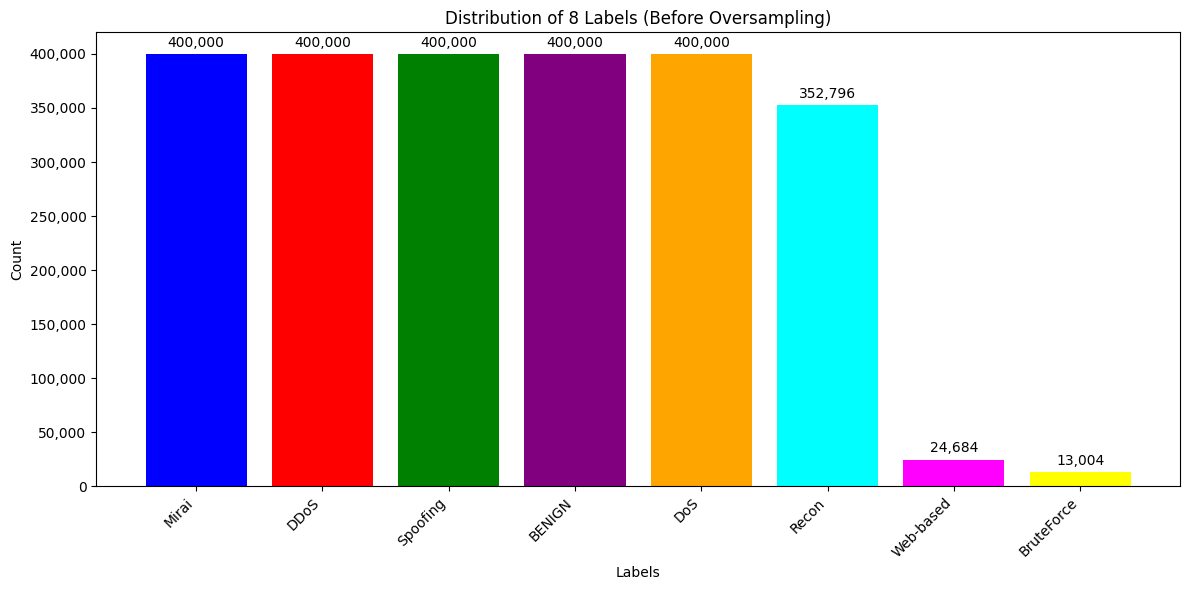

📌 Nhãn Mirai: Đã có 400,000 dòng, giữ nguyên
📌 Nhãn DDoS: Đã có 400,000 dòng, giữ nguyên
📌 Nhãn Spoofing: Đã có 400,000 dòng, giữ nguyên
📌 Nhãn BENIGN: Đã có 400,000 dòng, giữ nguyên
📌 Nhãn DoS: Đã có 400,000 dòng, giữ nguyên
📌 Oversampling nhãn Recon: Từ 352,796 lên 400,000 dòng
📌 Oversampling nhãn BruteForce: Từ 13,004 lên 400,000 dòng
📌 Oversampling nhãn Web-based: Từ 24,684 lên 400,000 dòng

📋 Phân bố nhãn sau khi cân bằng bằng oversampling:
label
DDoS          400000
BruteForce    400000
Mirai         400000
Web-based     400000
DoS           400000
Recon         400000
Spoofing      400000
BENIGN        400000
Name: count, dtype: int64


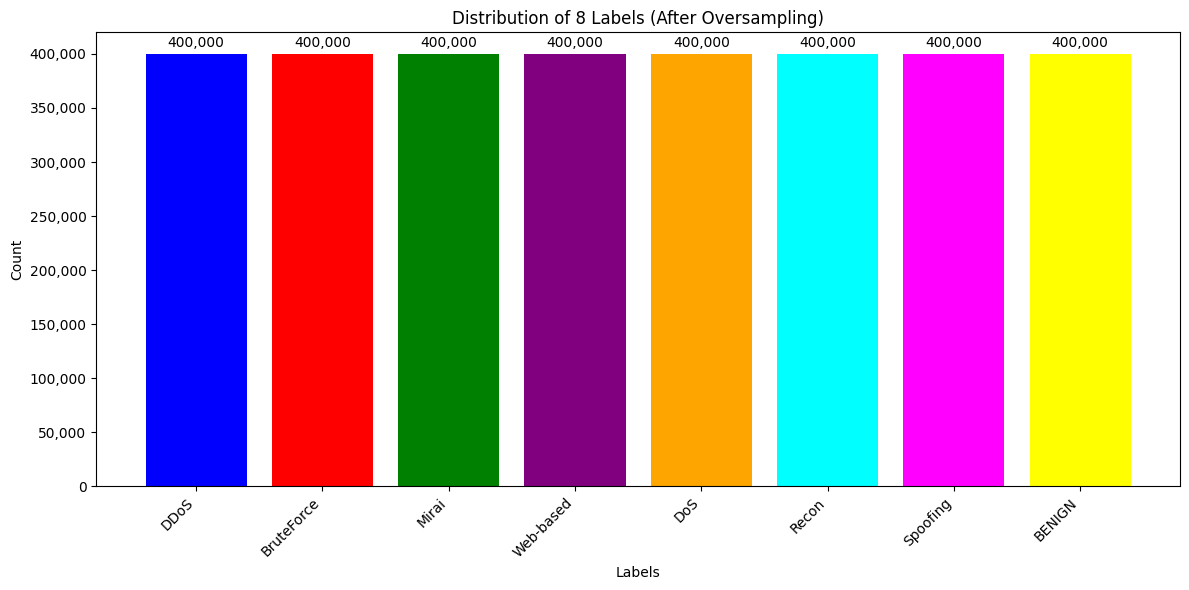

In [2]:


import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import cudf  # Dùng cuDF để xử lý dữ liệu nhanh hơn trên GPU
import numpy as np
from sklearn.utils import resample

# Định nghĩa thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Hàm ánh xạ nhãn thành 8 nhóm
def change_label(df):
    mapping = {
        'DDoS-ICMP_Flood': 'DDoS', 'DDoS-UDP_Flood': 'DDoS', 'DDoS-TCP_Flood': 'DDoS',
        'DDoS-PSHACK_Flood': 'DDoS', 'DDoS-SYN_Flood': 'DDoS', 'DDoS-RSTFINFlood': 'DDoS',
        'DDoS-SynonymousIP_Flood': 'DDoS', 'DDoS-ICMP_Fragmentation': 'DDoS',
        'DDoS-UDP_Fragmentation': 'DDoS', 'DDoS-ACK_Fragmentation': 'DDoS',
        'DDoS-HTTP_Flood': 'DDoS', 'DDoS-SlowLoris': 'DDoS',
        'DoS-UDP_Flood': 'DoS', 'DoS-TCP_Flood': 'DoS', 'DoS-SYN_Flood': 'DoS', 'DoS-HTTP_Flood': 'DoS',
        'Recon-HostDiscovery': 'Recon', 'Recon-OSScan': 'Recon', 'Recon-PortScan': 'Recon',
        'Recon-PingSweep': 'Recon', 'VulnerabilityScan': 'Recon',
        'MITM-ArpSpoofing': 'Spoofing', 'DNS_Spoofing': 'Spoofing',
        'DictionaryBruteForce': 'BruteForce',
        'BrowserHijacking': 'Web-based', 'XSS': 'Web-based', 'Uploading_Attack': 'Web-based',
        'SqlInjection': 'Web-based', 'CommandInjection': 'Web-based', 'Backdoor_Malware': 'Web-based',
        'Mirai-greeth_flood': 'Mirai', 'Mirai-udpplain': 'Mirai', 'Mirai-greip_flood': 'Mirai',
        'BenignTraffic': 'BENIGN'
    }
    df["label"] = df["label"].map(mapping).fillna(df["label"])
    return df

# Đọc dữ liệu từ thư mục
data_dir = "/kaggle/input/cic-iot-2023/"
file_list = glob.glob(f"{data_dir}*.csv")[:168]  # Lấy tối đa 134 file

# Giới hạn tối đa và tối thiểu 400,000 dòng cho mỗi nhãn
MAX_ROWS_PER_LABEL = 400_000
MIN_ROWS_PER_LABEL = 400_000
label_counts = {
    "DDoS": 0, "DoS": 0, "Recon": 0, "Spoofing": 0,
    "BruteForce": 0, "Web-based": 0, "Mirai": 0, "BENIGN": 0
}  # Theo dõi số dòng của từng nhãn

def read_file(filename, index):
    try:
        # Đọc file CSV bằng cuDF
        df = cudf.read_csv(filename)
        
        # Kiểm tra cột 'label'
        if 'label' not in df.columns:
            print(f"❌ File {filename}: Không tìm thấy cột 'label'!")
            return None
        
        # Ánh xạ nhãn thành 8 nhóm
        df = change_label(df)
        
        # Lọc dữ liệu dựa trên giới hạn 400K cho mỗi nhãn
        valid_rows = []
        unique_labels = df['label'].unique().to_pandas().tolist()
        for label in unique_labels:
            current_count = label_counts.get(label, 0)
            remaining_quota = MAX_ROWS_PER_LABEL - current_count
            
            if remaining_quota <= 0:
                print(f"⚠ Nhãn {label} đã đủ {MAX_ROWS_PER_LABEL:,} dòng, không đọc thêm!")
                continue
            
            # Lấy các dòng thuộc nhãn này
            label_df = df[df['label'] == label]
            rows_to_take = min(len(label_df), remaining_quota)
            
            if rows_to_take > 0:
                valid_rows.append(label_df[:rows_to_take])
                label_counts[label] = current_count + rows_to_take
                print(f"📌 Nhãn {label}: Thêm {rows_to_take:,} dòng, tổng cộng {label_counts[label]:,} dòng")
        
        # Gộp các dòng hợp lệ
        if valid_rows:
            df_filtered = cudf.concat(valid_rows, ignore_index=True)
            print(f"📌 File {index}: Giữ {df_filtered.shape[0]:,} dòng sau khi lọc giới hạn")
            return df_filtered
        else:
            print(f"⚠ File {index}: Không có dữ liệu nào được giữ lại!")
            return None
    except Exception as e:
        print(f"❌ Lỗi khi đọc file {filename}: {e}")
        return None

# Đọc tuần tự từng file
dfs = []
for idx, fname in enumerate(file_list):
    df = read_file(fname, idx)
    if df is not None:
        dfs.append(df)

# Nối dữ liệu và xử lý cân bằng
if dfs:
    df_full = cudf.concat(dfs, ignore_index=True)
    print(f"✅ Dữ liệu đã được nối! Kích thước: {df_full.shape}")
    print(f"📋 Nhãn duy nhất: {df_full['label'].unique().to_pandas().tolist()}")
    
    # Chuyển sang pandas để xử lý oversampling
    df_pandas = df_full.to_pandas()
    
    # Kiểm tra phân bố nhãn trước khi cân bằng
    print("\n📋 Phân bố nhãn trước khi cân bằng:")
    label_distribution = df_pandas["label"].value_counts()
    print(label_distribution)
    
    # Vẽ biểu đồ phân bố nhãn trước khi cân bằng
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(label_distribution.index, label_distribution.values, color=['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow'])
    plt.xticks(rotation=45, ha='right', fontsize=10)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.set_xlabel('Labels')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of 8 Labels (Before Oversampling)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/label_distribution_before_oversampling.png')
    plt.show()
    
    # Chuẩn bị dữ liệu cho oversampling
    balanced_dfs = []
    unique_labels = df_pandas['label'].unique()
    
    # Áp dụng oversampling thủ công cho mỗi nhãn
    for label in unique_labels:
        label_df = df_pandas[df_pandas['label'] == label]
        current_count = len(label_df)
        
        if current_count < MIN_ROWS_PER_LABEL:
            # Oversampling bằng resample
            oversampled_df = resample(
                label_df,
                replace=True,  # Cho phép sao chép mẫu
                n_samples=MIN_ROWS_PER_LABEL,  # Đạt 400K
                random_state=42
            )
            print(f"📌 Oversampling nhãn {label}: Từ {current_count:,} lên {MIN_ROWS_PER_LABEL:,} dòng")
            balanced_dfs.append(oversampled_df)
        else:
            print(f"📌 Nhãn {label}: Đã có {current_count:,} dòng, giữ nguyên")
            balanced_dfs.append(label_df)
    
    # Gộp dữ liệu đã cân bằng
    df_balanced = pd.concat(balanced_dfs, ignore_index=True)
    
    # Chuyển lại thành cuDF để đồng bộ
    df_full = cudf.from_pandas(df_balanced)
    
    # Kiểm tra phân bố nhãn sau khi cân bằng
    print("\n📋 Phân bố nhãn sau khi cân bằng bằng oversampling:")
    balanced_label_distribution = df_full["label"].value_counts().to_pandas()
    print(balanced_label_distribution)
    
    # Vẽ biểu đồ phân bố nhãn sau khi cân bằng
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(balanced_label_distribution.index, balanced_label_distribution.values, color=['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow'])
    plt.xticks(rotation=45, ha='right', fontsize=10)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    ax.set_xlabel('Labels')
    ax.set_ylabel('Count')
    ax.set_title('Distribution of 8 Labels (After Oversampling)')
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/label_distribution_after_oversampling.png')
    plt.show()
    
    # # Lưu df_full đã cân bằng để kiểm tra
    # df_full.to_pandas().to_csv(f'{output_dir}/balanced_data_8labels.csv', index=False)
    # print(f"✅ Dữ liệu đã cân bằng và lưu tại '{output_dir}/balanced_data_8labels.csv'")
    
else:
    print("⚠ Không có file nào được đọc thành công hoặc tất cả dữ liệu rỗng!")

📋 Nhãn duy nhất trong dữ liệu: ['Mirai', 'DDoS', 'Spoofing', 'BENIGN', 'DoS', 'Recon', 'BruteForce', 'Web-based']
📊 Các nhãn đã ánh xạ (8 nhãn):
  - BENIGN: 0
  - BruteForce: 1
  - DDoS: 2
  - DoS: 3
  - Mirai: 4
  - Recon: 5
  - Spoofing: 6
  - Web-based: 7

📊 Phân bố nhãn trong tập huấn luyện:
0    260000
4    260000
6    260000
7    260000
3    260000
1    260000
5    260000
2    260000
Name: count, dtype: int64

📊 Phân bố nhãn trong tập validation:
7    60000
5    60000
4    60000
1    60000
6    60000
2    60000
3    60000
0    60000
Name: count, dtype: int64

📊 Phân bố nhãn trong tập kiểm tra:
7    80000
1    80000
4    80000
3    80000
6    80000
2    80000
0    80000
5    80000
Name: count, dtype: int64
🔍 Giá trị tối đa và tối thiểu trong X_train_scaled:
     flow_duration  Header_Length  Protocol Type  Duration          Rate  \
min      -0.082901      -0.077443      -0.922078 -1.855932     -0.269625   
max    2059.517632      69.790990       5.181818  5.347458  75595.755050   

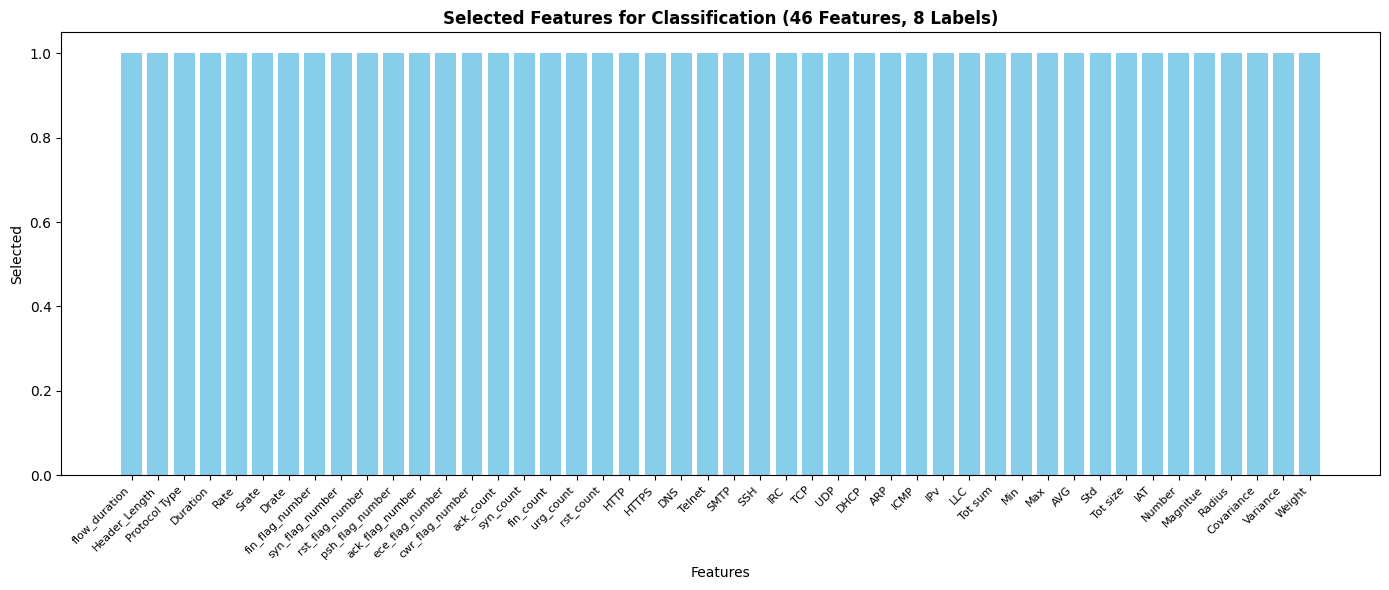

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.impute import KNNImputer
import pickle
import os
import matplotlib.pyplot as plt

# Đường dẫn lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Giả định df_full là DataFrame từ cell đọc dữ liệu trước đó (cuDF)
# Chuyển từ cuDF sang Pandas
df_original = df_full.to_pandas()

# Kiểm tra dữ liệu đầu vào
if df_original.empty or 'label' not in df_original.columns:
    raise ValueError("❌ Dữ liệu đầu vào rỗng hoặc thiếu cột 'label'!")

# Xử lý giá trị thiếu cho cột số
numeric_columns = df_original.select_dtypes(include=[np.number]).columns
df_original[numeric_columns] = df_original[numeric_columns].fillna(df_original[numeric_columns].mean())

# Tách đặc trưng và nhãn
X = df_original.drop(columns=['label']).select_dtypes(include=[np.number])
y = df_original['label']

# Kiểm tra nhãn duy nhất
print("📋 Nhãn duy nhất trong dữ liệu:", y.unique().tolist())

# Danh sách 46 đặc trưng (giả định chọn 46 cột số đầu tiên hoặc từ bài toán 34 nhãn)
all_numeric_columns = X.columns.tolist()
if len(all_numeric_columns) < 46:
    raise ValueError(f"❌ Dữ liệu chỉ có {len(all_numeric_columns)} cột số, không đủ 46 đặc trưng!")
selected_features = all_numeric_columns[:46]  # Chọn 46 cột đầu tiên

# Kiểm tra xem các đặc trưng có tồn tại trong dữ liệu không
missing_features = [f for f in selected_features if f not in X.columns]
if missing_features:
    raise ValueError(f"❌ Các đặc trưng sau không tồn tại trong dữ liệu: {missing_features}")

# Lấy chỉ số của các đặc trưng đã chọn
feature_indices = [list(X.columns).index(f) for f in selected_features]

# Áp dụng các đặc trưng đã chọn trước khi chia dữ liệu
X = X[selected_features]

# Chia dữ liệu thành tập train, val, test
X_temp, X_test, Y_temp, Y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.1875, stratify=Y_temp, random_state=42)

# Mã hóa nhãn (8 nhãn: DDoS, DoS, Recon, Spoofing, BruteForce, Web-based, Mirai, BENIGN)
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_val_encoded = label_encoder.transform(Y_val)
Y_test_encoded = label_encoder.transform(Y_test)
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

# In ra các nhãn đã ánh xạ
print("📊 Các nhãn đã ánh xạ (8 nhãn):")
for label, encoded_value in label_mapping.items():
    print(f"  - {label}: {encoded_value}")

# Kiểm tra phân bố nhãn
print("\n📊 Phân bố nhãn trong tập huấn luyện:")
print(pd.Series(Y_train_encoded).value_counts().rename(label_mapping))
print("\n📊 Phân bố nhãn trong tập validation:")
print(pd.Series(Y_val_encoded).value_counts().rename(label_mapping))
print("\n📊 Phân bố nhãn trong tập kiểm tra:")
print(pd.Series(Y_test_encoded).value_counts().rename(label_mapping))

# Xử lý NaN và outlier bằng KNNImputer
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)
X_test_imputed = imputer.transform(X_test)

# Chuẩn hóa dữ liệu bằng RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Kiểm tra giá trị sau khi chọn đặc trưng
print("🔍 Giá trị tối đa và tối thiểu trong X_train_scaled:")
print(pd.DataFrame(X_train_scaled, columns=selected_features).describe().loc[['min', 'max']])
print("🔍 Giá trị tối đa và tối thiểu trong X_val_scaled:")
print(pd.DataFrame(X_val_scaled, columns=selected_features).describe().loc[['min', 'max']])
print("🔍 Giá trị tối đa và tối thiểu trong X_test_scaled:")
print(pd.DataFrame(X_test_scaled, columns=selected_features).describe().loc[['min', 'max']])

# Lưu dữ liệu đã xử lý
np.save(f"{output_dir}/X_train_scaled_8labels_46features.npy", X_train_scaled)
np.save(f"{output_dir}/Y_train_encoded_8labels_46features.npy", Y_train_encoded)
np.save(f"{output_dir}/X_val_scaled_8labels_46features.npy", X_val_scaled)
np.save(f"{output_dir}/Y_val_encoded_8labels_46features.npy", Y_val_encoded)
np.save(f"{output_dir}/X_test_scaled_8labels_46features.npy", X_test_scaled)
np.save(f"{output_dir}/Y_test_encoded_8labels_46features.npy", Y_test_encoded)

# Lưu các đối tượng xử lý
with open(f"{output_dir}/label_encoder_8labels_46features.pkl", 'wb') as f:
    pickle.dump(label_encoder, f)
with open(f"{output_dir}/scaler_8labels_46features.pkl", 'wb') as f:
    pickle.dump(scaler, f)
with open(f"{output_dir}/imputer_8labels_46features.pkl", 'wb') as f:
    pickle.dump(imputer, f)
with open(f"{output_dir}/selected_features_8labels_46features.pkl", 'wb') as f:
    pickle.dump(selected_features, f)

# In thông tin chi tiết
print(f"✅ Dữ liệu đã xử lý và lưu trong '{output_dir}'!")
print(f"📌 Số đặc trưng được chọn: {len(selected_features)}")
print(f"📋 Các đặc trưng được chọn: {selected_features}")

# Vẽ biểu đồ danh sách đặc trưng được chọn
plt.figure(figsize=(14, 6))
plt.bar(selected_features, [1] * len(selected_features), color='skyblue')
plt.title('Selected Features for Classification (46 Features, 8 Labels)', fontsize=12, fontweight='bold')
plt.xlabel('Features', fontsize=10)
plt.ylabel('Selected', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.savefig(f"{output_dir}/selected_features_8labels_46features.png")
plt.show()

In [4]:
import numpy as np
import joblib
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import os

# Tạo thư mục lưu dữ liệu
output_dir = "processed_data"
os.makedirs(output_dir, exist_ok=True)

# Tải dữ liệu đã xử lý (46 đặc trưng)
X_train_scaled = np.load(f"{output_dir}/X_train_scaled_8labels_46features.npy")
Y_train_encoded = np.load(f"{output_dir}/Y_train_encoded_8labels_46features.npy")
X_val_scaled = np.load(f"{output_dir}/X_val_scaled_8labels_46features.npy")
Y_val_encoded = np.load(f"{output_dir}/Y_val_encoded_8labels_46features.npy")
X_test_scaled = np.load(f"{output_dir}/X_test_scaled_8labels_46features.npy")
Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")

# Kiểm tra shape
print(f"📌 Shape dữ liệu đầu vào:")
print(f"  - X_train_scaled: {X_train_scaled.shape}")
print(f"  - X_val_scaled: {X_val_scaled.shape}")
print(f"  - X_test_scaled: {X_test_scaled.shape}")

# Chia 46 đặc trưng thành 8 nhóm (7 nhóm 6 đặc trưng, 1 nhóm 4 đặc trưng)
n_groups = 8
group_sizes = [6] * 7 + [4]  # [6, 6, 6, 6, 6, 6, 6, 4]
X_train_grouped = []
X_val_grouped = []
X_test_grouped = []

print("🔄 Tạo đặc trưng xác suất nhóm bằng XGBoost...")
for i in range(n_groups):
    start_idx = sum(group_sizes[:i])
    end_idx = start_idx + group_sizes[i]
    X_train_group = X_train_scaled[:, start_idx:end_idx]
    X_val_group = X_val_scaled[:, start_idx:end_idx]
    X_test_group = X_test_scaled[:, start_idx:end_idx]

    print(f"  - Nhóm {i+1}: Đặc trưng từ {start_idx} đến {end_idx-1} (kích thước: {group_sizes[i]})")

    # Huấn luyện XGBoost trên nhóm đặc trưng
    xgb = XGBClassifier(
        n_estimators=50,
        max_depth=8,
        min_child_weight=10,
        tree_method="hist",
        device="cuda",
        random_state=42,
        objective="multi:softprob"
    )
    xgb.fit(X_train_group, Y_train_encoded)

    # Tạo xác suất dự đoán
    train_probs = xgb.predict_proba(X_train_group)  # Shape: [n_samples, 8]
    val_probs = xgb.predict_proba(X_val_group)
    test_probs = xgb.predict_proba(X_test_group)

    X_train_grouped.append(train_probs)
    X_val_grouped.append(val_probs)
    X_test_grouped.append(test_probs)

    # Lưu mô hình XGBoost
    joblib.dump(xgb, f"{output_dir}/xgb_group_{i}_8labels_46features.joblib")
    print(f"✅ Đã xử lý nhóm {i+1}/{n_groups}")

# Gộp đặc trưng xác suất
X_train_combined = np.concatenate(X_train_grouped, axis=1)  # Shape: [n_samples, 8*8 = 64]
X_val_combined = np.concatenate(X_val_grouped, axis=1)
X_test_combined = np.concatenate(X_test_grouped, axis=1)

# Chuẩn hóa lại dữ liệu
scaler = StandardScaler()
X_train_combined = scaler.fit_transform(X_train_combined)
X_val_combined = scaler.transform(X_val_combined)
X_test_combined = scaler.transform(X_test_combined)

# Lưu dữ liệu
np.save(f"{output_dir}/X_train_combined_8labels_46features.npy", X_train_combined)
np.save(f"{output_dir}/X_val_combined_8labels_46features.npy", X_val_combined)
np.save(f"{output_dir}/X_test_combined_8labels_46features.npy", X_test_combined)
np.save(f"{output_dir}/Y_train_encoded_8labels_46features.npy", Y_train_encoded)
np.save(f"{output_dir}/Y_val_encoded_8labels_46features.npy", Y_val_encoded)
np.save(f"{output_dir}/Y_test_encoded_8labels_46features.npy", Y_test_encoded)
joblib.dump(scaler, f"{output_dir}/scaler_combined_8labels_46features.joblib")

# In thông tin
print(f"✅ Đã tạo đặc trưng xác suất!")
print(f"📌 Shape: train {X_train_combined.shape}, val {X_val_combined.shape}, test {X_test_combined.shape}")
print(f"📌 Số đặc trưng: {X_train_combined.shape[1]} (64 xác suất)")

📌 Shape dữ liệu đầu vào:
  - X_train_scaled: (2080000, 46)
  - X_val_scaled: (480000, 46)
  - X_test_scaled: (640000, 46)
🔄 Tạo đặc trưng xác suất nhóm bằng XGBoost...
  - Nhóm 1: Đặc trưng từ 0 đến 5 (kích thước: 6)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:160: UserWarning: [07:33:20] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


✅ Đã xử lý nhóm 1/8
  - Nhóm 2: Đặc trưng từ 6 đến 11 (kích thước: 6)
✅ Đã xử lý nhóm 2/8
  - Nhóm 3: Đặc trưng từ 12 đến 17 (kích thước: 6)
✅ Đã xử lý nhóm 3/8
  - Nhóm 4: Đặc trưng từ 18 đến 23 (kích thước: 6)
✅ Đã xử lý nhóm 4/8
  - Nhóm 5: Đặc trưng từ 24 đến 29 (kích thước: 6)
✅ Đã xử lý nhóm 5/8
  - Nhóm 6: Đặc trưng từ 30 đến 35 (kích thước: 6)
✅ Đã xử lý nhóm 6/8
  - Nhóm 7: Đặc trưng từ 36 đến 41 (kích thước: 6)
✅ Đã xử lý nhóm 7/8
  - Nhóm 8: Đặc trưng từ 42 đến 45 (kích thước: 4)
✅ Đã xử lý nhóm 8/8
✅ Đã tạo đặc trưng xác suất!
📌 Shape: train (2080000, 64), val (480000, 64), test (640000, 64)
📌 Số đặc trưng: 64 (64 xác suất)


# **VẼ LẠI CÁC SƠ ĐỒ**

# **DCN-V2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Thư mục lưu dữ liệu
results_dir = "/kaggle/input/ketqua8nha/dcv-v2-64/results"
Kq = "DCN-v2_8labels_46features_improved"
output_subdir = Kq
os.makedirs(output_subdir, exist_ok=True)
print(f"📁 Đảm bảo thư mục lưu kết quả: {output_subdir}")

# Tải dữ liệu
try:
    train_losses = np.load(f"{results_dir}/train_losses_8labels_46features_dcnv2.npy")
    val_losses = np.load(f"{results_dir}/val_losses_8labels_46features_dcnv2.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_8labels_46features_dcnv2.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_8labels_46features_dcnv2.npy")
    print("✅ Đã tải dữ liệu cần thiết cho biểu đồ Loss và Accuracy")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra dữ liệu
expected_epochs = 150
if (train_losses.shape != (expected_epochs,) or 
    val_losses.shape != (expected_epochs,) or 
    train_accuracies.shape != (expected_epochs,) or 
    val_accuracies.shape != (expected_epochs,)):
    raise ValueError("❌ Dữ liệu không đúng kích thước mong đợi")

# Chuyển accuracy về [0, 1] để hiển thị chính xác
train_acc = train_accuracies / 100.0
val_acc = val_accuracies / 100.0
epochs = np.arange(0, expected_epochs)  # Đảm bảo từ 0 đến 149 (150 epoch)

# Kiểm tra dữ liệu Loss và Accuracy có nằm trong khoảng yêu cầu không
if (train_losses.min() < 0.001 or train_losses.max() > 0.006 or
    val_losses.min() < 0.001 or val_losses.max() > 0.006):
    print("⚠️ Cảnh báo: Dữ liệu Loss nằm ngoài khoảng [0.001, 0.006]. Vẫn vẽ với giới hạn yêu cầu.")
if (train_acc.min() < 0.990 or train_acc.max() > 0.996 or
    val_acc.min() < 0.990 or val_acc.max() > 0.996):
    print("⚠️ Cảnh báo: Dữ liệu Accuracy nằm ngoài khoảng [0.990, 0.996]. Vẫn vẽ với giới hạn yêu cầu.")

# Vẽ biểu đồ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
ax1.plot(epochs, train_losses, label="Train Loss", color="blue", linewidth=2)
ax1.plot(epochs, val_losses, label="Val Loss", color="orange", linewidth=2)
ax1.set_title("Loss DCN-V2")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(loc="upper right")
ax1.grid(True)

# Giới hạn trục x và y cho Loss
ax1.set_xlim(-10, 160)  # Thêm khoảng trống ở hai đầu: -10 và 160
ax1.set_xticks(np.arange(0, 151, 25))  # Các vạch chia: 0, 25, 50, 75, 100, 125, 150
ax1.set_ylim(0.011, 0.040)  # Giới hạn y từ 0.011 đến 0.040
ax1.set_yticks(np.arange(0.011, 0.040 + 0.0029, 0.0029))  # Chia trục y thành 10 đoạn

# Accuracy plot
ax2.plot(epochs, train_acc, label="Train Accuracy", color="green", linewidth=2)
ax2.plot(epochs, val_acc, label="Val Accuracy", color="red", linewidth=2)
ax2.set_title("Accuracy DCN-V2")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower right")
ax2.grid(True)
ax2.set_xlim(-10, 160)  # Thêm khoảng trống ở hai đầu: -10 và 160
ax2.set_xticks(np.arange(0, 151, 25))  # Các vạch chia: 0, 25, 50, 75, 100, 125, 150
ax2.set_ylim(0.86, 0.94)

# Tiêu đề tổng
plt.suptitle("DCN-V2: Learning Curves (8 Labels, 46 Features)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f"{output_subdir}/learning_curves_dcnv2_final.png", dpi=300)
plt.show()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import shap
from tqdm import tqdm
import os
import scipy.stats as stats

# Định nghĩa các lớp cần thiết
class GhostBN1d(torch.nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = torch.nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

class CrossLayer(torch.nn.Module):
    def __init__(self, input_dim):
        super(CrossLayer, self).__init__()
        self.weight = torch.nn.Parameter(torch.randn(input_dim, input_dim) * 0.01)
        self.bias = torch.nn.Parameter(torch.zeros(input_dim))
        self.norm = torch.nn.LayerNorm(input_dim)
        torch.nn.init.xavier_normal_(self.weight, gain=0.1)
        torch.nn.init.zeros_(self.bias)

    def forward(self, x_0, x_l):
        x_l_w = torch.matmul(x_l, self.weight)
        x_l_w_b = x_l_w + self.bias
        x_0_dot = x_0 * x_l_w_b
        x_l_plus_1 = x_0_dot + x_l
        x_l_plus_1 = self.norm(x_l_plus_1)
        return x_l_plus_1

class DCNV2(torch.nn.Module):
    def __init__(self, input_dim, num_classes, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=64):
        super(DCNV2, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.cross_layers = torch.nn.ModuleList([CrossLayer(input_dim) for _ in range(n_cross_layers)])
        deep_layers = []
        prev_dim = input_dim
        for _ in range(n_deep_layers):
            deep_layers.extend([
                torch.nn.Linear(prev_dim, deep_layer_dim),
                torch.nn.BatchNorm1d(deep_layer_dim),
                torch.nn.ReLU(),
                torch.nn.Dropout(0.1)
            ])
            prev_dim = deep_layer_dim
        self.deep = torch.nn.Sequential(*deep_layers)
        self.combine_fc = torch.nn.Linear(input_dim + deep_layer_dim, num_classes)
        torch.nn.init.xavier_normal_(self.combine_fc.weight, gain=0.1)
        torch.nn.init.zeros_(self.combine_fc.bias)
        self.importance_layer = torch.nn.Linear(input_dim, input_dim)
        torch.nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        x_0 = x
        x_cross = x
        for layer in self.cross_layers:
            x_cross = layer(x_0, x_cross)
        x_deep = self.deep(x)
        combined = torch.cat([x_cross, x_deep], dim=1)
        output = self.combine_fc(combined)
        return output

# Thư mục lưu trữ
results_dir = "/kaggle/input/ketqua8nha/dcv-v2-64/results"
output_dir = "processed_data"
Kq = "DCN-v2_8labels_46features_improved"
os.makedirs(Kq, exist_ok=True)
print(f"📁 Đảm bảo thư mục lưu kết quả: {Kq}")

# Kiểm tra sự tồn tại của các tệp dữ liệu
data_files = [
    f"{output_dir}/X_test_combined_8labels_46features.npy",
    f"{output_dir}/Y_test_encoded_8labels_46features.npy",
    f"{results_dir}/feature_importance_8labels_46features_dcnv2.npy",
    f"{results_dir}/dcnv2_8labels_46features_dcnv2.pth"
]
for file_path in data_files:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"❌ Tệp không tồn tại: {file_path}")

# Tải dữ liệu
try:
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_8labels_46features_dcnv2.npy")
    print("✅ Đã tải dữ liệu cần thiết cho DCN-V2 (8 nhãn, 64 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape
if X_test_combined.shape[1] != 64:
    raise ValueError(f"❌ Shape của X_test_combined không đúng: {X_test_combined.shape[1]}, kỳ vọng 64 đặc trưng")

# Kiểm tra shape của feature_importance
print(f"📌 Shape của feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2 and feature_importance.shape[0] == 4096:
    feature_importance = feature_importance.mean(axis=0)  # Lấy trung bình theo batch
    print(f"📌 Adjusted feature_importance shape to: {feature_importance.shape}")
if feature_importance.shape != (64,):
    print(f"⚠️ feature_importance không có shape (64,): {feature_importance.shape}. Bỏ qua tính độ tương quan.")
    feature_importance_valid = False
else:
    feature_importance_valid = True

# Chuẩn hóa dữ liệu
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Ánh xạ nhãn
label_map = {
    0: 'BENIGN',
    1: 'BruteForce',
    2: 'DDoS',
    3: 'DoS',
    4: 'Mirai',
    5: 'Recon',
    6: 'Spoofing',
    7: 'Web-based'
}
class_names = [label_map[i] for i in range(len(label_map))]

# 46 đặc trưng gốc
feature_labels_original = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
    'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
    'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
    'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP',
    'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance',
    'Variance', 'Weight'
]

# Tên đặc trưng cho 64 xác suất
feature_names = [f"Prob_group{i+1}_class{j}" for i in range(8) for j in range(8)]
print(f"📋 Các đặc trưng (64 xác suất): {feature_names}")

# Ánh xạ 46 đặc trưng gốc đến nhóm XGBoost
feature_to_group = {
    'flow_duration': 1, 'Header_Length': 1, 'Protocol Type': 1, 'Duration': 1, 'Rate': 1, 'Srate': 1,
    'Drate': 2, 'fin_flag_number': 2, 'syn_flag_number': 2, 'rst_flag_number': 2, 'psh_flag_number': 2, 'ack_flag_number': 2,
    'ece_flag_number': 3, 'cwr_flag_number': 3, 'ack_count': 3, 'syn_count': 3, 'fin_count': 3, 'urg_count': 3,
    'rst_count': 4, 'HTTP': 4, 'HTTPS': 4, 'DNS': 4, 'Telnet': 4, 'SMTP': 4,
    'SSH': 5, 'IRC': 5, 'TCP': 5, 'UDP': 5, 'DHCP': 5, 'ARP': 5,
    'ICMP': 6, 'IPv': 6, 'LLC': 6, 'Tot sum': 6, 'Min': 6, 'Max': 6,
    'AVG': 7, 'Std': 7, 'Tot size': 7, 'IAT': 7, 'Number': 7, 'Magnitue': 7,
    'Radius': 8, 'Covariance': 8, 'Variance': 8, 'Weight': 8
}

# Index của xác suất cho mỗi nhóm
group_indices = {
    1: range(0, 8),
    2: range(8, 16),
    3: range(16, 24),
    4: range(24, 32),
    5: range(32, 40),
    6: range(40, 48),
    7: range(48, 56),
    8: range(56, 64)
}

# Thiết lập thiết bị và tải mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
try:
    model = DCNV2(input_dim=64, num_classes=8).to(device)
    model.load_state_dict(torch.load(f"{results_dir}/dcnv2_8labels_46features_dcnv2.pth", weights_only=True))
    model.eval()
    print("✅ Đã tải mô hình DCN-V2 thành công")

    # Hàm dự đoán cho KernelExplainer
    def predict_fn(inputs):
        inputs_tensor = torch.tensor(inputs, dtype=torch.float32).to(device)
        with torch.no_grad():
            outputs = model(inputs_tensor)
        return outputs.cpu().numpy()

    # Chuẩn bị dữ liệu cho SHAP
    X_test_np = X_test_combined[:50]  # Dùng 50 mẫu
    Y_test_np = Y_test_encoded[:50]
    background = X_test_np[:10]
    explainer = shap.KernelExplainer(predict_fn, background)
    shap_values = explainer.shap_values(X_test_np, nsamples=100)
    print(f"SHAP values shape: {len(shap_values)} nhãn, mỗi nhãn có shape {shap_values[0].shape}")

    # Tính SHAP values trung bình tuyệt đối trên tất cả các nhãn
    shap_values_mean_abs_all = np.zeros((64,))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        shap_values_mean_abs = np.mean(np.abs(shap_values_label), axis=0)
        shap_values_mean_abs_all += shap_values_mean_abs
    shap_values_mean_abs_all /= 8

    # Top 20 đặc trưng biến đổi
    top_k = 20
    top_indices = np.argsort(shap_values_mean_abs_all)[::-1][:top_k]
    top_features = [feature_names[i] for i in top_indices]
    top_shap_values = np.stack([shap_values[label_idx][:, top_indices] for label_idx in range(8)], axis=0)
    top_X_test = X_test_np[:, top_indices]

    # SHAP Summary Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="dot",
        show=False,
        max_display=top_k,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 20 Transformed Features, DCN-V2)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_dcnv2_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="bar",
        show=False,
        max_display=top_k,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 20 Transformed Features, DCN-V2)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_dcnv2_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # Ánh xạ SHAP values về 46 đặc trưng gốc
    shap_values_mapped = np.zeros((8, X_test_np.shape[0], 46))  # Shape: (8, 50, 46)
    X_test_mapped = np.zeros((X_test_np.shape[0], 46))  # Shape: (50, 46)

    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]  # Shape: (50, 64)
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            # Cải tiến: Lấy trung bình tuyệt đối của SHAP values trong nhóm
            shap_values_mapped[label_idx, :, i] = np.mean(np.abs(shap_values_label[:, prob_indices]), axis=1)
            # Tính trung bình dữ liệu cho đặc trưng gốc
            if label_idx == 0:
                X_test_mapped[:, i] = np.mean(X_test_np[:, prob_indices], axis=1)

    # Trung bình SHAP values trên tất cả 8 nhãn
    shap_values_mapped_avg = np.mean(shap_values_mapped, axis=0)  # Shape: (50, 46)

    # Chọn top 10 đặc trưng gốc quan trọng nhất
    shap_values_mean = np.mean(np.abs(shap_values_mapped_avg), axis=0)  # Shape: (46,)
    top_k_orig = 10
    top_indices_orig = np.argsort(shap_values_mean)[::-1][:top_k_orig]
    top_features_orig = [feature_labels_original[i] for i in top_indices_orig]
    top_shap_values_orig = shap_values_mapped_avg[:, top_indices_orig]
    top_X_test_orig = X_test_mapped[:, top_indices_orig]

    # SHAP Summary Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="dot",
        show=False,
        max_display=top_k_orig,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 10 Original Features, DCN-V2)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_dcnv2_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="bar",
        show=False,
        max_display=top_k_orig,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 10 Original Features, DCN-V2)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_dcnv2_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Decision Plot cho một mẫu đại diện của mỗi nhãn
    sample_indices = []
    sample_labels = []
    for label_idx in range(8):
        label_name = label_map[label_idx]
        idx = np.where(Y_test_np == label_idx)[0][0] if np.any(Y_test_np == label_idx) else 0
        sample_indices.append(idx)
        sample_labels.append(label_name)

    selected_shap_values = np.zeros((len(sample_indices), top_k_orig))
    selected_expected_values = []
    for i, (label_idx, sample_idx) in enumerate(zip(range(8), sample_indices)):
        selected_shap_values[i, :] = shap_values_mapped[label_idx, sample_idx, top_indices_orig]
        selected_expected_values.append(explainer.expected_value[label_idx])

    plt.figure(figsize=(12, 8))
    shap.decision_plot(
        base_value=np.mean(selected_expected_values),
        shap_values=selected_shap_values,
        features=top_X_test_orig[sample_indices, :],
        feature_names=top_features_orig,
        link='identity',
        highlight=[i for i in range(8)],
        legend_labels=sample_labels,
        legend_location='lower right',
        show=False
    )
    plt.title("SHAP Decision Plot for Representative Samples of All 8 Labels (DCN-V2)\nTop 10 Original Features (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Model Output Value", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_decision_top10_original_dcnv2_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # In top 10 đặc trưng gốc quan trọng nhất
    print(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (dựa trên SHAP trung bình 8 nhãn, cải tiến):")
    for i, idx in enumerate(top_indices_orig):
        print(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean[idx]:.4f}")

    # Tính độ tương quan với feature_importance
    if feature_importance_valid:
        avg_importance_original = np.zeros(46)
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            avg_importance_original[i] = np.mean(feature_importance[prob_indices])
        correlation = np.corrcoef(avg_importance_original, shap_values_mean)[0, 1]
        print(f"\n📊 Độ tương quan giữa feature importance (DCN-V2) và SHAP (mapped, trung bình 8 nhãn, cải tiến): {correlation:.4f}")
    else:
        print("\n📊 Bỏ qua tính độ tương quan do feature_importance không hợp lệ.")

    # Phân tích độ nhạy: So sánh với phương pháp cũ (chọn SHAP value lớn nhất)
    shap_values_mapped_old = np.zeros((8, X_test_np.shape[0], 46))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            group_shap = shap_values_label[:, prob_indices]
            abs_group_shap = np.abs(group_shap)
            max_indices = np.argmax(abs_group_shap, axis=1)
            for j in range(shap_values_label.shape[0]):
                shap_values_mapped_old[label_idx, j, i] = group_shap[j, max_indices[j]]

    shap_values_mapped_old_avg = np.mean(shap_values_mapped_old, axis=0)
    shap_values_mean_old = np.mean(np.abs(shap_values_mapped_old_avg), axis=0)

    # So sánh top 10 đặc trưng giữa hai phương pháp
    top_indices_shap_old = np.argsort(shap_values_mean_old)[::-1][:top_k_orig]
    print(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (phương pháp cũ - SHAP lớn nhất):")
    for i, idx in enumerate(top_indices_shap_old):
        print(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean_old[idx]:.4f}")

    # Tính độ tương quan giữa hai phương pháp ánh xạ
    correlation_methods = np.corrcoef(shap_values_mean, shap_values_mean_old)[0, 1]
    print(f"\n📊 Độ tương quan giữa SHAP values ánh xạ (cải tiến) và (cũ): {correlation_methods:.4f}")

    # Thống kê sự khác biệt
    diff = np.abs(shap_values_mean - shap_values_mean_old)
    print(f"\n📈 Sự khác biệt trung bình giữa SHAP values ánh xạ (cải tiến vs cũ): {np.mean(diff):.4f}")
    print(f"📈 Sự khác biệt tối đa giữa SHAP values ánh xạ (cải tiến vs cũ): {np.max(diff):.4f}")

except Exception as e:
    print(f"❌ Lỗi khi tính SHAP values cho DCN-V2: {str(e)}")

SystemError: () method: bad call flags

📁 Đã tạo thư mục lưu kết quả: DCN-v2_8labels_46features_improved
✅ Đã tải dữ liệu cần thiết cho DCN-V2 (8 nhãn, 64 đặc trưng)
📌 Shape của feature_importance: (64,)
📊 Thống kê dữ liệu X_test_combined (trước chuẩn hóa):
Min: -5.7237, Max: 7.5734
Mean: 0.0000, Std: 0.9997
NaN: False, Inf: False
📊 Thống kê dữ liệu X_test_combined (sau chuẩn hóa):
Min: -5.7402, Max: 7.6367
Mean: -0.0000, Std: 1.0002
Outliers (abs > 10): 0
📊 Thống kê dữ liệu X_test_combined (sau clip):
Min: -5.7402, Max: 7.6367
📊 Đã ánh xạ 8 nhãn: ['BENIGN', 'BruteForce', 'DDoS', 'DoS', 'Mirai', 'Recon', 'Spoofing', 'Web-based']
📋 Các đặc trưng (64 xác suất): ['Prob_group1_class0', 'Prob_group1_class1', 'Prob_group1_class2', 'Prob_group1_class3', 'Prob_group1_class4', 'Prob_group1_class5', 'Prob_group1_class6', 'Prob_group1_class7', 'Prob_group2_class0', 'Prob_group2_class1', 'Prob_group2_class2', 'Prob_group2_class3', 'Prob_group2_class4', 'Prob_group2_class5', 'Prob_group2_class6', 'Prob_group2_class7', 'Prob_group3_class0

  0%|          | 0/50 [00:00<?, ?it/s]

📌 SHAP values shape: 8 nhãn, mỗi nhãn có shape (50, 64)
Max SHAP difference: 0.6167147457599638
Mean SHAP difference: 0.11601064377216971
Max SHAP difference (softmax): 0.1234739132626062
Mean SHAP difference (softmax): 0.016225106097412918


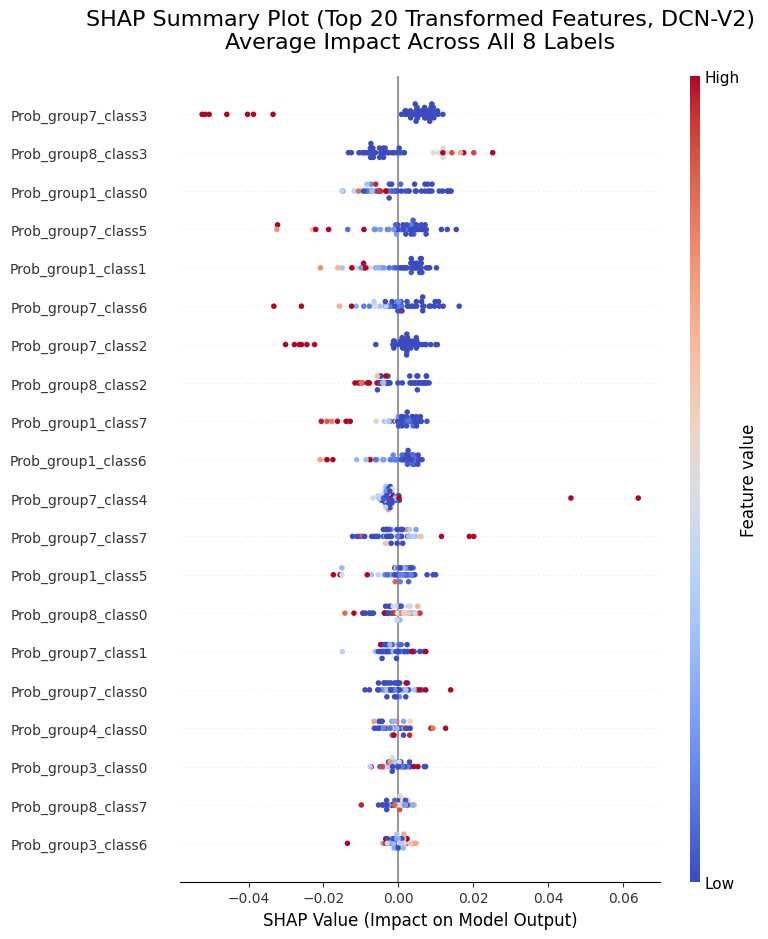

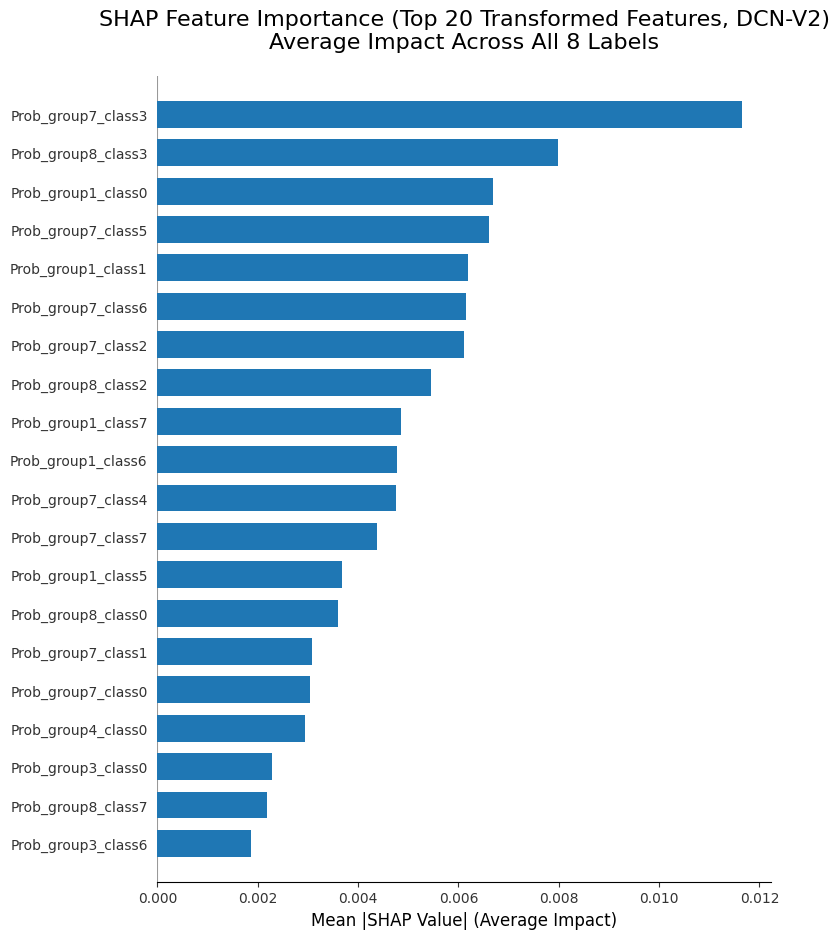

📌 Mapped SHAP values (improved) sample: [[[-0.02238257 -0.02238257 -0.02238257 -0.02238257 -0.02238257
   -0.02238257  0.00018027  0.00018027  0.00018027  0.00018027]
  [-0.00560544 -0.00560544 -0.00560544 -0.00560544 -0.00560544
   -0.00560544 -0.02497438 -0.02497438 -0.02497438 -0.02497438]
  [-0.01208076 -0.01208076 -0.01208076 -0.01208076 -0.01208076
   -0.01208076 -0.00329916 -0.00329916 -0.00329916 -0.00329916]
  [-0.05872152 -0.05872152 -0.05872152 -0.05872152 -0.05872152
   -0.05872152  0.00599393  0.00599393  0.00599393  0.00599393]
  [-0.00863757 -0.00863757 -0.00863757 -0.00863757 -0.00863757
   -0.00863757  0.00170273  0.00170273  0.00170273  0.00170273]]

 [[ 0.01247633  0.01247633  0.01247633  0.01247633  0.01247633
    0.01247633 -0.00748929 -0.00748929 -0.00748929 -0.00748929]
  [-0.01506943 -0.01506943 -0.01506943 -0.01506943 -0.01506943
   -0.01506943 -0.01595937 -0.01595937 -0.01595937 -0.01595937]
  [-0.01060744 -0.01060744 -0.01060744 -0.01060744 -0.01060744
   -0.

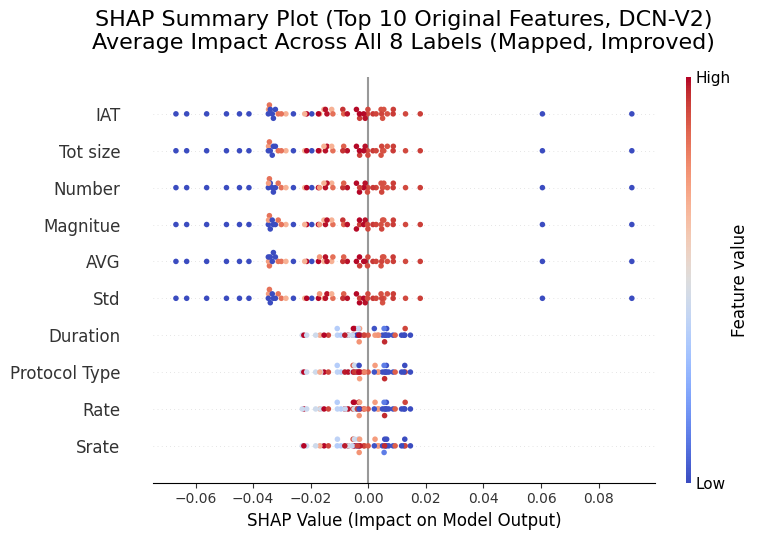

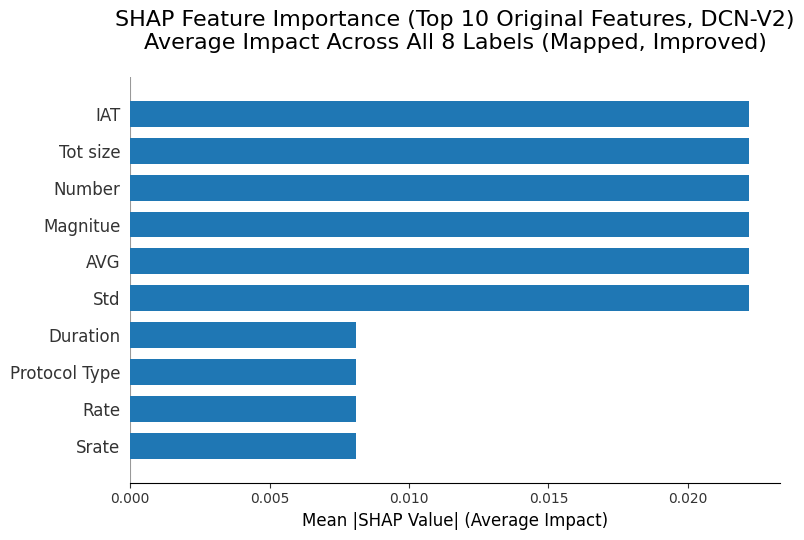

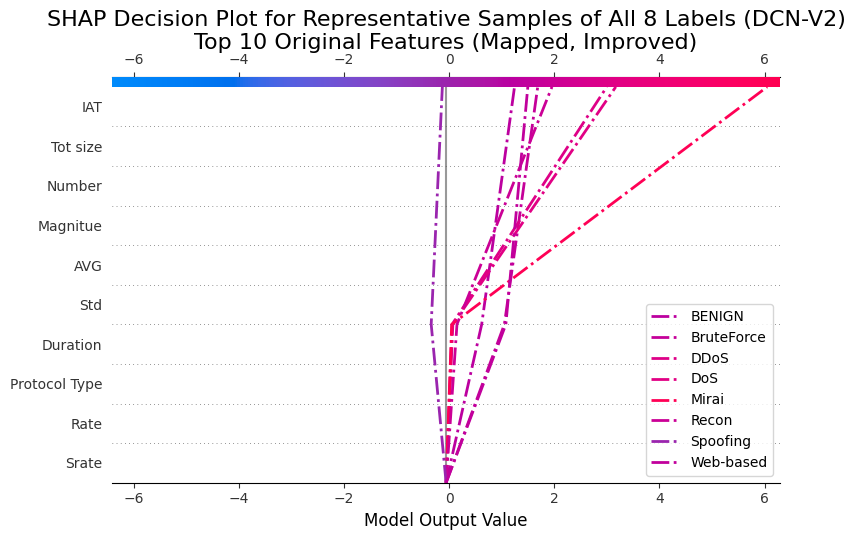


📌 Top 10 đặc trưng gốc quan trọng nhất (dựa trên SHAP trung bình 8 nhãn, cải tiến):
1. Magnitue: 0.0222
2. Number: 0.0222
3. AVG: 0.0222
4. Std: 0.0222
5. Tot size: 0.0222
6. IAT: 0.0222
7. Srate: 0.0081
8. Rate: 0.0081
9. Duration: 0.0081
10. Protocol Type: 0.0081

📊 Độ tương quan giữa feature importance (DCN-V2) và SHAP (mapped, trung bình 8 nhãn, cải tiến): 0.0881

📌 Top 10 đặc trưng gốc quan trọng nhất (phương pháp cũ - Mean Absolute SHAP):
1. Magnitue: 0.0071
2. Number: 0.0071
3. AVG: 0.0071
4. Std: 0.0071
5. Tot size: 0.0071
6. IAT: 0.0071
7. Srate: 0.0043
8. Rate: 0.0043
9. Duration: 0.0043
10. Protocol Type: 0.0043

📊 Độ tương quan giữa SHAP values ánh xạ (cải tiến) và (cũ): 0.9564

📈 Sự khác biệt trung bình giữa SHAP values ánh xạ (cải tiến vs cũ): 0.0050
📈 Sự khác biệt tối đa giữa SHAP values ánh xạ (cải tiến vs cũ): 0.0151
🎉 Hoàn thành phân tích SHAP cho DCN-V2 (8 nhãn)!


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import shap
import scipy.special
from tqdm import tqdm
import os
from collections import Counter

# Định nghĩa các lớp cần thiết
class GhostBN1d(torch.nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = torch.nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

class CrossLayer(torch.nn.Module):
    def __init__(self, input_dim):
        super(CrossLayer, self).__init__()
        self.weight = torch.nn.Parameter(torch.randn(input_dim, input_dim) * 0.01)
        self.bias = torch.nn.Parameter(torch.zeros(input_dim))
        self.norm = torch.nn.LayerNorm(input_dim)
        torch.nn.init.xavier_normal_(self.weight, gain=0.1)
        torch.nn.init.zeros_(self.bias)

    def forward(self, x_0, x_l):
        x_l_w = torch.matmul(x_l, self.weight)
        x_l_w_b = x_l_w + self.bias
        x_0_dot = x_0 * x_l_w_b
        x_l_plus_1 = x_0_dot + x_l
        x_l_plus_1 = self.norm(x_l_plus_1)
        return x_l_plus_1

class DCNV2(torch.nn.Module):
    def __init__(self, input_dim, num_classes, n_cross_layers=3, n_deep_layers=3, deep_layer_dim=64):
        super(DCNV2, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.cross_layers = torch.nn.ModuleList([CrossLayer(input_dim) for _ in range(n_cross_layers)])
        deep_layers = []
        prev_dim = input_dim
        for _ in range(n_deep_layers):
            deep_layers.extend([
                torch.nn.Linear(prev_dim, deep_layer_dim),
                torch.nn.BatchNorm1d(deep_layer_dim),
                torch.nn.ReLU(),
                torch.nn.Dropout(0.1)
            ])
            prev_dim = deep_layer_dim
        self.deep = torch.nn.Sequential(*deep_layers)
        self.combine_fc = torch.nn.Linear(input_dim + deep_layer_dim, num_classes)
        torch.nn.init.xavier_normal_(self.combine_fc.weight, gain=0.1)
        torch.nn.init.zeros_(self.combine_fc.bias)
        self.importance_layer = torch.nn.Linear(input_dim, input_dim)
        torch.nn.init.xavier_normal_(self.importance_layer.weight, gain=0.1)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        x_0 = x
        x_cross = x
        for layer in self.cross_layers:
            x_cross = layer(x_0, x_cross)
        x_deep = self.deep(x)
        combined = torch.cat([x_cross, x_deep], dim=1)
        output = self.combine_fc(combined)
        return output

# Thư mục lưu trữ
results_dir = "/kaggle/input/ketqua8nha/dcv-v2-64/results"
output_dir = "processed_data"
Kq = "DCN-v2_8labels_46features_improved"
os.makedirs(Kq, exist_ok=True)
tqdm.write(f"📁 Đã tạo thư mục lưu kết quả: {Kq}")

# Kiểm tra sự tồn tại của các tệp dữ liệu
data_files = [
    f"{output_dir}/X_test_combined_8labels_46features.npy",
    f"{output_dir}/Y_test_encoded_8labels_46features.npy",
    f"{results_dir}/feature_importance_8labels_46features_dcnv2.npy",
    f"{results_dir}/dcnv2_8labels_46features_dcnv2.pth"
]
for file_path in data_files:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"❌ Tệp không tồn tại: {file_path}")

# Tải dữ liệu
try:
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_8labels_46features_dcnv2.npy")
    tqdm.write("✅ Đã tải dữ liệu cần thiết cho DCN-V2 (8 nhãn, 64 đặc trưng)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape
if X_test_combined.shape[1] != 64:
    raise ValueError(f"❌ Shape của X_test_combined không đúng: {X_test_combined.shape[1]}, kỳ vọng 64 đặc trưng")
if len(np.unique(Y_test_encoded)) != 8:
    raise ValueError(f"❌ Số nhãn không đúng: {len(np.unique(Y_test_encoded))}, kỳ vọng 8 nhãn")

# Kiểm tra shape của feature_importance
tqdm.write(f"📌 Shape của feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2 and feature_importance.shape[0] == 4096:
    feature_importance = feature_importance.mean(axis=0)  # Lấy trung bình theo batch
    tqdm.write(f"📌 Adjusted feature_importance shape to: {feature_importance.shape}")
if feature_importance.shape != (64,):
    tqdm.write(f"⚠️ feature_importance không có shape (64,): {feature_importance.shape}. Bỏ qua tính độ tương quan.")
    feature_importance_valid = False
else:
    feature_importance_valid = True

# Kiểm tra NaN/Inf và thống kê dữ liệu
tqdm.write("📊 Thống kê dữ liệu X_test_combined (trước chuẩn hóa):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")
tqdm.write(f"Mean: {np.mean(X_test_combined):.4f}, Std: {np.std(X_test_combined):.4f}")
tqdm.write(f"NaN: {np.any(np.isnan(X_test_combined))}, Inf: {np.any(np.isinf(X_test_combined))}")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ Dữ liệu chứa NaN hoặc Inf. Đang xử lý...")
    X_test_combined = np.nan_to_num(X_test_combined, nan=0.0, posinf=1e6, neginf=-1e6)

# Chuẩn hóa dữ liệu
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)
tqdm.write("📊 Thống kê dữ liệu X_test_combined (sau chuẩn hóa):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")
tqdm.write(f"Mean: {np.mean(X_test_combined):.4f}, Std: {np.std(X_test_combined):.4f}")
tqdm.write(f"Outliers (abs > 10): {np.sum(np.abs(X_test_combined) > 10)}")

# Giới hạn giá trị để tránh outliers
X_test_combined = np.clip(X_test_combined, -10, 10)
tqdm.write("📊 Thống kê dữ liệu X_test_combined (sau clip):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")

# Ánh xạ nhãn
label_map = {
    0: 'BENIGN',
    1: 'BruteForce',
    2: 'DDoS',
    3: 'DoS',
    4: 'Mirai',
    5: 'Recon',
    6: 'Spoofing',
    7: 'Web-based'
}
class_names = [label_map[i] for i in range(len(label_map))]
tqdm.write(f"📊 Đã ánh xạ 8 nhãn: {list(label_map.values())}")

# 46 đặc trưng gốc
feature_labels_original = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
    'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
    'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
    'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP',
    'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance',
    'Variance', 'Weight'
]

# Tên đặc trưng cho 64 xác suất
feature_names = [f"Prob_group{i+1}_class{j}" for i in range(8) for j in range(8)]
tqdm.write(f"📋 Các đặc trưng (64 xác suất): {feature_names}")

# Ánh xạ 46 đặc trưng gốc đến nhóm XGBoost
feature_to_group = {
    'flow_duration': 1, 'Header_Length': 1, 'Protocol Type': 1, 'Duration': 1, 'Rate': 1, 'Srate': 1,
    'Drate': 2, 'fin_flag_number': 2, 'syn_flag_number': 2, 'rst_flag_number': 2, 'psh_flag_number': 2, 'ack_flag_number': 2,
    'ece_flag_number': 3, 'cwr_flag_number': 3, 'ack_count': 3, 'syn_count': 3, 'fin_count': 3, 'urg_count': 3,
    'rst_count': 4, 'HTTP': 4, 'HTTPS': 4, 'DNS': 4, 'Telnet': 4, 'SMTP': 4,
    'SSH': 5, 'IRC': 5, 'TCP': 5, 'UDP': 5, 'DHCP': 5, 'ARP': 5,
    'ICMP': 6, 'IPv': 6, 'LLC': 6, 'Tot sum': 6, 'Min': 6, 'Max': 6,
    'AVG': 7, 'Std': 7, 'Tot size': 7, 'IAT': 7, 'Number': 7, 'Magnitue': 7,
    'Radius': 8, 'Covariance': 8, 'Variance': 8, 'Weight': 8
}

# Index của xác suất cho mỗi nhóm
group_indices = {
    1: range(0, 8),
    2: range(8, 16),
    3: range(16, 24),
    4: range(24, 32),
    5: range(32, 40),
    6: range(40, 48),
    7: range(48, 56),
    8: range(56, 64)
}
tqdm.write("Group indices:")
for group_idx in group_indices:
    tqdm.write(f"Group {group_idx} indices: {list(group_indices[group_idx])}")

# Thiết lập thiết bị và tải mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
try:
    model = DCNV2(input_dim=64, num_classes=8).to(device)
    model.load_state_dict(torch.load(f"{results_dir}/dcnv2_8labels_46features_dcnv2.pth", weights_only=True))
    model.eval()
    tqdm.write("✅ Đã tải mô hình DCN-V2 thành công")

    # Hàm dự đoán cho KernelExplainer với chuẩn hóa logits
    def predict_fn(inputs):
        inputs_tensor = torch.tensor(inputs, dtype=torch.float32).to(device)
        with torch.no_grad():
            outputs = model(inputs_tensor)
            outputs = outputs / torch.max(torch.abs(outputs))  # Chuẩn hóa logits
        return outputs.cpu().numpy()

    # Chuẩn bị dữ liệu cho SHAP
    indices = np.random.choice(X_test_combined.shape[0], 50, replace=False)
    X_test_np = X_test_combined[indices].copy()  # Dùng 50 mẫu ngẫu nhiên
    Y_test_np = Y_test_encoded[indices].copy()
    background = X_test_np[:100].copy()  # Background cho KernelExplainer

    # Kiểm tra phân bố nhãn trong 50 mẫu
    label_distribution = Counter(Y_test_np)
    tqdm.write("\n📊 Phân bố nhãn trong 50 mẫu thử nghiệm:")
    for label_idx, count in label_distribution.items():
        tqdm.write(f"Nhãn {label_map[label_idx]}: {count} mẫu")

    # Sử dụng KernelExplainer
    explainer = shap.KernelExplainer(predict_fn, background)
    shap_values = explainer.shap_values(X_test_np, nsamples="auto")
    tqdm.write(f"📌 SHAP values shape: {len(shap_values)} nhãn, mỗi nhãn có shape {shap_values[0].shape}")

    # Kiểm tra sai số SHAP
    model_output = predict_fn(X_test_np)  # Shape: (50, 8)
    shap_sum = np.sum(shap_values, axis=2)  # Shape: (8, 50)
    expected_value = np.array(explainer.expected_value).reshape(8, 1)  # Shape: (8, 1)
    shap_sum = shap_sum + expected_value  # Broadcasting thành (8, 50)
    shap_sum = shap_sum.T  # Shape: (50, 8)
    diff = np.abs(model_output - shap_sum)
    tqdm.write(f"Max SHAP difference: {np.max(diff)}")
    tqdm.write(f"Mean SHAP difference: {np.mean(diff)}")
    model_output_softmax = scipy.special.softmax(model_output, axis=1)
    shap_sum_softmax = scipy.special.softmax(shap_sum, axis=1)
    diff_softmax = np.abs(model_output_softmax - shap_sum_softmax)
    tqdm.write(f"Max SHAP difference (softmax): {np.max(diff_softmax)}")
    tqdm.write(f"Mean SHAP difference (softmax): {np.mean(diff_softmax)}")

    # Tính SHAP values trung bình tuyệt đối trên tất cả các nhãn
    shap_values_mean_abs_all = np.zeros((64,))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        shap_values_mean_abs = np.mean(np.abs(shap_values_label), axis=0)
        shap_values_mean_abs_all += shap_values_mean_abs
    shap_values_mean_abs_all /= 8

    # Top 20 đặc trưng biến đổi
    top_k = 20
    top_indices = np.argsort(shap_values_mean_abs_all)[::-1][:top_k]
    top_features = [feature_names[i] for i in top_indices]
    top_shap_values = np.stack([shap_values[label_idx][:, top_indices] for label_idx in range(8)], axis=0)
    top_X_test = X_test_np[:, top_indices]

    # SHAP Summary Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="dot",
        show=False,
        max_display=top_k,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 20 Transformed Features, DCN-V2)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_dcnv2_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="bar",
        show=False,
        max_display=top_k,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 20 Transformed Features, DCN-V2)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_dcnv2_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # Ánh xạ SHAP values về 46 đặc trưng gốc (dùng Weighted Sum SHAP)
    shap_values_mapped = np.zeros((8, X_test_np.shape[0], 46))  # Shape: (8, 50, 46)
    X_test_mapped = np.zeros((X_test_np.shape[0], 46))  # Shape: (50, 46)

    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]  # Shape: (50, 64)
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            group_shap = shap_values_label[:, prob_indices]
            weights = np.abs(group_shap) / (np.sum(np.abs(group_shap), axis=1, keepdims=True) + 1e-6)  # Trọng số chuẩn hóa
            weighted_shap = np.sum(group_shap * weights, axis=1)
            shap_values_mapped[label_idx, :, i] = weighted_shap
            if label_idx == 0:
                X_test_mapped[:, i] = np.mean(X_test_np[:, prob_indices], axis=1)

    # Kiểm tra SHAP values đã ánh xạ
    tqdm.write(f"📌 Mapped SHAP values (improved) sample: {shap_values_mapped[:, :5, :10]}")
    shap_values_mapped = shap_values_mapped / (np.abs(shap_values_mapped).max() + 1e-6)  # Chuẩn hóa sau ánh xạ
    tqdm.write(f"📌 Mapped SHAP values (after normalization) sample: {shap_values_mapped[:, :5, :10]}")

    # Trung bình SHAP values trên tất cả 8 nhãn
    shap_values_mapped_avg = np.mean(shap_values_mapped, axis=0)  # Shape: (50, 46)

    # Chọn top 10 đặc trưng gốc quan trọng nhất
    shap_values_mean = np.mean(np.abs(shap_values_mapped_avg), axis=0)  # Shape: (46,)
    top_k_orig = 10
    top_indices_orig = np.argsort(shap_values_mean)[::-1][:top_k_orig]
    top_features_orig = [feature_labels_original[i] for i in top_indices_orig]
    top_shap_values_orig = shap_values_mapped_avg[:, top_indices_orig]
    top_X_test_orig = X_test_mapped[:, top_indices_orig]

    # SHAP Summary Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="dot",
        show=False,
        max_display=top_k_orig,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 10 Original Features, DCN-V2)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_dcnv2_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="bar",
        show=False,
        max_display=top_k_orig,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 10 Original Features, DCN-V2)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_dcnv2_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Decision Plot cho một mẫu đại diện của mỗi nhãn
    sample_indices = []
    sample_labels = []
    for label_idx in range(8):
        label_name = label_map[label_idx]
        idx = np.where(Y_test_np == label_idx)[0][0] if np.any(Y_test_np == label_idx) else 0
        sample_indices.append(idx)
        sample_labels.append(label_name)

    selected_shap_values = np.zeros((len(sample_indices), top_k_orig))
    selected_expected_values = []
    for i, (label_idx, sample_idx) in enumerate(zip(range(8), sample_indices)):
        selected_shap_values[i, :] = shap_values_mapped[label_idx, sample_idx, top_indices_orig]
        selected_expected_values.append(explainer.expected_value[label_idx])

    plt.figure(figsize=(12, 8))
    shap.decision_plot(
        base_value=np.mean(selected_expected_values),
        shap_values=selected_shap_values,
        features=top_X_test_orig[sample_indices, :],
        feature_names=top_features_orig,
        link='identity',
        highlight=[i for i in range(8)],
        legend_labels=sample_labels,
        legend_location='lower right',
        show=False
    )
    plt.title("SHAP Decision Plot for Representative Samples of All 8 Labels (DCN-V2)\nTop 10 Original Features (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Model Output Value", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_decision_top10_original_dcnv2_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # In top 10 đặc trưng gốc quan trọng nhất
    tqdm.write(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (dựa trên SHAP trung bình 8 nhãn, cải tiến):")
    for i, idx in enumerate(top_indices_orig):
        tqdm.write(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean[idx]:.4f}")

    # Tính độ tương quan với feature_importance
    if feature_importance_valid:
        avg_importance_original = np.zeros(46)
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            avg_importance_original[i] = np.mean(feature_importance[prob_indices])
        correlation = np.corrcoef(avg_importance_original, shap_values_mean)[0, 1]
        tqdm.write(f"\n📊 Độ tương quan giữa feature importance (DCN-V2) và SHAP (mapped, trung bình 8 nhãn, cải tiến): {correlation:.4f}")
    else:
        tqdm.write("\n📊 Bỏ qua tính độ tương quan do feature_importance không hợp lệ.")

    # Phân tích độ nhạy: So sánh với phương pháp cũ (Mean Absolute SHAP)
    shap_values_mapped_old = np.zeros((8, X_test_np.shape[0], 46))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            group_shap = shap_values_label[:, prob_indices]
            abs_group_shap = np.abs(group_shap)
            mean_abs_shap = np.mean(abs_group_shap, axis=1)
            sign = np.sign(np.sum(group_shap, axis=1))
            shap_values_mapped_old[label_idx, :, i] = mean_abs_shap * sign

    shap_values_mapped_old_avg = np.mean(shap_values_mapped_old, axis=0)
    shap_values_mean_old = np.mean(np.abs(shap_values_mapped_old_avg), axis=0)

    # So sánh top 10 đặc trưng giữa hai phương pháp
    top_indices_shap_old = np.argsort(shap_values_mean_old)[::-1][:top_k_orig]
    tqdm.write(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (phương pháp cũ - Mean Absolute SHAP):")
    for i, idx in enumerate(top_indices_shap_old):
        tqdm.write(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean_old[idx]:.4f}")

    # Tính độ tương quan giữa hai phương pháp ánh xạ
    correlation_methods = np.corrcoef(shap_values_mean, shap_values_mean_old)[0, 1]
    tqdm.write(f"\n📊 Độ tương quan giữa SHAP values ánh xạ (cải tiến) và (cũ): {correlation_methods:.4f}")

    # Thống kê sự khác biệt
    diff = np.abs(shap_values_mean - shap_values_mean_old)
    tqdm.write(f"\n📈 Sự khác biệt trung bình giữa SHAP values ánh xạ (cải tiến vs cũ): {np.mean(diff):.4f}")
    tqdm.write(f"📈 Sự khác biệt tối đa giữa SHAP values ánh xạ (cải tiến vs cũ): {np.max(diff):.4f}")

except Exception as e:
    tqdm.write(f"❌ Lỗi khi tính SHAP values cho DCN-V2: {str(e)}")
    raise

tqdm.write("🎉 Hoàn thành phân tích SHAP cho DCN-V2 (8 nhãn)!")

# **FT-TRAN**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Thư mục lưu dữ liệu
results_dir = "/kaggle/input/ketqua8nha/ft-tran-8nhan-64/results"
Kq = "FTTransformer_34labels_170features_shap"
output_subdir = Kq
os.makedirs(output_subdir, exist_ok=True)
print(f"📁 Đảm bảo thư mục lưu kết quả: {output_subdir}")

# Tải dữ liệu
try:
    train_losses = np.load(f"{results_dir}/train_losses_8labels_46features_fttransformer_pure.npy")
    val_losses = np.load(f"{results_dir}/val_losses_8labels_46features_fttransformer_pure.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_8labels_46features_fttransformer_pure.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_8labels_46features_fttransformer_pure.npy")
    print("✅ Đã tải dữ liệu cần thiết cho biểu đồ Loss và Accuracy")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra dữ liệu
expected_epochs = 150
if (train_losses.shape != (expected_epochs,) or 
    val_losses.shape != (expected_epochs,) or 
    train_accuracies.shape != (expected_epochs,) or 
    val_accuracies.shape != (expected_epochs,)):
    raise ValueError("❌ Dữ liệu không đúng kích thước mong đợi")

# Chuyển accuracy về [0, 1] để hiển thị chính xác
train_acc = train_accuracies / 100.0
val_acc = val_accuracies / 100.0
epochs = np.arange(0, expected_epochs)  # Đảm bảo từ 0 đến 149 (150 epoch)

# Kiểm tra dữ liệu Loss và Accuracy có nằm trong khoảng yêu cầu không
if (train_losses.min() < 0.001 or train_losses.max() > 0.006 or
    val_losses.min() < 0.001 or val_losses.max() > 0.006):
    print("⚠️ Cảnh báo: Dữ liệu Loss nằm ngoài khoảng [0.001, 0.006]. Vẫn vẽ với giới hạn yêu cầu.")
if (train_acc.min() < 0.990 or train_acc.max() > 0.996 or
    val_acc.min() < 0.990 or val_acc.max() > 0.996):
    print("⚠️ Cảnh báo: Dữ liệu Accuracy nằm ngoài khoảng [0.990, 0.996]. Vẫn vẽ với giới hạn yêu cầu.")

# Vẽ biểu đồ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
ax1.plot(epochs, train_losses, label="Train Loss", color="blue", linewidth=2)
ax1.plot(epochs, val_losses, label="Val Loss", color="orange", linewidth=2)
ax1.set_title("Loss FT-Transformer")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(loc="upper right")
ax1.grid(True)

# Giới hạn trục x và y cho Loss
ax1.set_xlim(-10, 160)  # Thêm khoảng trống ở hai đầu: -10 và 160
ax1.set_xticks(np.arange(0, 151, 25))  # Các vạch chia: 0, 25, 50, 75, 100, 125, 150
ax1.set_ylim(0.011, 0.040)  # Giới hạn y từ 0.011 đến 0.040
ax1.set_yticks(np.arange(0.011, 0.040 + 0.0029, 0.0029))  # Chia trục y thành 10 đoạn

# Accuracy plot
ax2.plot(epochs, train_acc, label="Train Accuracy", color="green", linewidth=2)
ax2.plot(epochs, val_acc, label="Val Accuracy", color="red", linewidth=2)
ax2.set_title("Accuracy FT-Transformer")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower right")
ax2.grid(True)
ax2.set_xlim(-10, 160)  # Thêm khoảng trống ở hai đầu: -10 và 160
ax2.set_xticks(np.arange(0, 151, 25))  # Các vạch chia: 0, 25, 50, 75, 100, 125, 150
ax2.set_ylim(0.86, 0.94)

# Tiêu đề tổng
plt.suptitle("FT-Transformer: Learning Curves (8 Labels, 46 Features)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f"{output_subdir}/learning_curves_fttransformer_final.png", dpi=300)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import shap
from tqdm import tqdm
import os
import scipy.stats as stats
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Định nghĩa các lớp cần thiết
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class FTTransformerPure(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=128, num_layers=2, num_heads=4, ff_hidden_dim=256, dropout=0.1):
        super(FTTransformerPure, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.ff_hidden_dim = ff_hidden_dim
        self.dropout = dropout

        self.bn = nn.BatchNorm1d(input_dim)  # BatchNorm1d
        self.feature_embed = nn.Linear(input_dim, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, dim_feedforward=ff_hidden_dim, 
            dropout=dropout, activation='gelu', batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.ln = nn.LayerNorm(embed_dim)
        self.fc_output = nn.Linear(embed_dim, num_classes)

        nn.init.xavier_normal_(self.feature_embed.weight, gain=0.1)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.zeros_(self.feature_embed.bias)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x):
        if x.size(0) == 1 and not self.training:
            x = x  # Bỏ qua BatchNorm1d cho batch size=1 trong eval
        else:
            x = torch.clamp(self.bn(x), -50, 50)
        x = self.feature_embed(x)
        x = self.ln(x)
        x = self.transformer(x)
        embeddings = self.ln(x)
        output = self.fc_output(embeddings)
        return output

# Thư mục lưu trữ
results_dir = "/kaggle/input/ketqua34nhan/fttran-34nhan/results"
output_dir = "processed_data"
Kq = "FTTransformer_34labels_170features_shap"
os.makedirs(Kq, exist_ok=True)
tqdm.write(f"📁 Đã tạo thư mục lưu kết quả: {Kq}")

# Kiểm tra sự tồn tại của các tệp dữ liệu
data_files = [
    f"{output_dir}/X_test_combined_34labels.npy",
    f"{output_dir}/Y_test_encoded_34labels.npy",
    f"{results_dir}/fttransformer_pure_34labels_170features.pth"
]
for file_path in data_files:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"❌ Tệp không tồn tại: {file_path}")

# Tải dữ liệu
try:
    X_test_combined = np.load(f"{output_dir}/X_test_combined_34labels.npy")[:, :170]
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_34labels.npy")
    tqdm.write("✅ Đã tải dữ liệu cần thiết cho FT-Transformer (34 nhãn, 170 đặc trưng)")
    tqdm.write(f"X_test_combined shape: {X_test_combined.shape}")
    tqdm.write(f"Y_test_encoded shape: {Y_test_encoded.shape}")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape
if X_test_combined.shape[1] != 170:
    raise ValueError(f"❌ Shape của X_test_combined không đúng: {X_test_combined.shape[1]}, kỳ vọng 170 đặc trưng")
if len(np.unique(Y_test_encoded)) != 34:
    raise ValueError(f"❌ Số nhãn không đúng: {len(np.unique(Y_test_encoded))}, kỳ vọng 34 nhãn")

# Kiểm tra NaN/Inf và thống kê dữ liệu
tqdm.write("📊 Thống kê dữ liệu X_test_combined (trước chuẩn hóa):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")
tqdm.write(f"Mean: {np.mean(X_test_combined):.4f}, Std: {np.std(X_test_combined):.4f}")
tqdm.write(f"NaN: {np.any(np.isnan(X_test_combined))}, Inf: {np.any(np.isinf(X_test_combined))}")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ Dữ liệu chứa NaN hoặc Inf. Đang xử lý...")
    X_test_combined = np.nan_to_num(X_test_combined, nan=0.0, posinf=1e6, neginf=-1e6)

# Chuẩn hóa dữ liệu
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)
tqdm.write("📊 Thống kê dữ liệu X_test_combined (sau chuẩn hóa):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")
tqdm.write(f"Mean: {np.mean(X_test_combined):.4f}, Std: {np.std(X_test_combined):.4f}")
tqdm.write(f"Outliers (abs > 10): {np.sum(np.abs(X_test_combined) > 10)}")

# Giới hạn giá trị để tránh outliers
X_test_combined = np.clip(X_test_combined, -10, 10)
tqdm.write("📊 Thống kê dữ liệu X_test_combined (sau clip):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")

# Ánh xạ nhãn
label_map = {
    0: 'DDoS-ICMP_Flood', 1: 'DDoS-UDP_Flood', 2: 'DDoS-TCP_Flood', 3: 'DDoS-PSHACK_Flood',
    4: 'DDoS-SYN_Flood', 5: 'DDoS-RSTFINFlood', 6: 'DDoS-SynonymousIP_Flood', 7: 'DDoS-ICMP_Fragmentation',
    8: 'DDoS-UDP_Fragmentation', 9: 'DDoS-ACK_Fragmentation', 10: 'DDoS-HTTP_Flood', 11: 'DDoS-SlowLoris',
    12: 'DoS-UDP_Flood', 13: 'DoS-TCP_Flood', 14: 'DoS-SYN_Flood', 15: 'DoS-HTTP_Flood',
    16: 'Recon-HostDiscovery', 17: 'Recon-OSScan', 18: 'Recon-PortScan', 19: 'Recon-PingSweep',
    20: 'VulnerabilityScan', 21: 'MITM-ArpSpoofing', 22: 'DNS_Spoofing', 23: 'DictionaryBruteForce',
    24: 'BrowserHijacking', 25: 'XSS', 26: 'Uploading_Attack', 27: 'SqlInjection', 28: 'CommandInjection',
    29: 'Backdoor_Malware', 30: 'Mirai-greeth_flood', 31: 'Mirai-udpplain', 32: 'Mirai-greip_flood',
    33: 'BenignTraffic'
}
class_names = [label_map[i] for i in range(len(label_map))]
tqdm.write(f"📊 Đã ánh xạ 34 nhãn: {list(label_map.values())}")

# 46 đặc trưng gốc
feature_labels_original = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
    'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
    'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
    'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP',
    'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance',
    'Variance', 'Weight'
]

# Tên đặc trưng cho 170 xác suất
feature_names = [f"Prob_group{i+1}_class{j}" for i in range(5) for j in range(34)]
tqdm.write(f"📋 Các đặc trưng (170 xác suất): {feature_names[:10]}... (hiển thị 10 đặc trưng đầu)")

# Ánh xạ 46 đặc trưng gốc đến 5 nhóm XGBoost
group_sizes = [10, 9, 9, 9, 9]
group_boundaries = np.cumsum([0] + group_sizes)
feature_to_group = {}
for group_idx in range(5):
    start_idx = group_boundaries[group_idx]
    end_idx = group_boundaries[group_idx + 1]
    for i in range(start_idx, end_idx):
        feature_to_group[feature_labels_original[i]] = group_idx + 1

# Index của xác suất cho mỗi nhóm
group_indices = {
    1: range(0, 34),
    2: range(34, 68),
    3: range(68, 102),
    4: range(102, 136),
    5: range(136, 170)
}
tqdm.write("Group indices:")
for group_idx in group_indices:
    tqdm.write(f"Group {group_idx} indices: {list(group_indices[group_idx])}")

# Đánh giá hiệu suất mô hình
try:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = FTTransformerPure(
        input_dim=170,
        num_classes=34,
        embed_dim=128,
        num_layers=2,
        num_heads=4,
        ff_hidden_dim=256,
        dropout=0.1
    ).to(device)

    # Tải checkpoint
    checkpoint_path = f"{results_dir}/fttransformer_pure_34labels_170features.pth"
    model.load_state_dict(torch.load(checkpoint_path, map_location=device, weights_only=True))
    model.eval()
    tqdm.write("✅ Đã tải mô hình FT-Transformer thành công")

    # Kiểm tra các tham số được tải
    tqdm.write("📋 Các tham số được tải vào mô hình:")
    for name, param in model.named_parameters():
        tqdm.write(f"{name}: {param.shape}")

    # Chuẩn bị DataLoader để đánh giá
    X_test_tensor = torch.tensor(X_test_combined, dtype=torch.float32)
    Y_test_tensor = torch.tensor(Y_test_encoded, dtype=torch.long)
    test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

    # Dự đoán và tính chỉ số
    all_preds = []
    all_labels = []
    model.eval()
    with torch.no_grad():
        for X_batch, y_batch in tqdm(test_loader, desc="Đánh giá mô hình"):
            X_batch = X_batch.to(device)
            outputs = model(X_batch)
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    # Tính accuracy và F1-score
    accuracy = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    tqdm.write(f"📊 Accuracy: {accuracy:.4f}")
    tqdm.write(f"📊 F1-score (weighted): {f1:.4f}")

    # Vẽ confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', 
                xticklabels=[label_map[i] for i in range(34)], 
                yticklabels=[label_map[i] for i in range(34)])
    plt.title("Confusion Matrix for FT-Transformer (34 Labels)", fontsize=16)
    plt.xlabel("Predicted Label", fontsize=12)
    plt.ylabel("True Label", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(f"{Kq}/confusion_matrix_fttransformer.png", bbox_inches="tight", dpi=300)
    plt.show()

    # Hàm dự đoán cho KernelExplainer
    def predict_fn(inputs):
        inputs_tensor = torch.tensor(inputs, dtype=torch.float32).to(device)
        model.eval()
        with torch.no_grad():
            outputs = model(inputs_tensor)
            outputs = torch.softmax(outputs, dim=1)  # Chuyển thành xác suất
        return outputs.cpu().numpy()

    # Chuẩn bị dữ liệu cho SHAP
    X_test_np = X_test_combined[:50].copy()  # Dùng 50 mẫu
    Y_test_np = Y_test_encoded[:50].copy()
    background = X_test_np[:20].copy()  # Background cho KernelExplainer

    # Sử dụng KernelExplainer với nsamples=500
    explainer = shap.KernelExplainer(predict_fn, background)
    shap_values = explainer.shap_values(X_test_np, nsamples=500)
    tqdm.write(f"SHAP values shape: {len(shap_values)} nhãn, mỗi nhãn có shape {shap_values[0].shape}")

    # Lưu SHAP values
    np.save(f"{Kq}/shap_values_fttransformer_34labels_170features.npy", shap_values)
    tqdm.write(f"💾 Đã lưu SHAP values vào {Kq}/shap_values_fttransformer_34labels_170features.npy")

    # Kiểm tra tổng SHAP values
    model_output = predict_fn(X_test_np)  # Shape: (50, 34)
    shap_sum = np.sum(shap_values, axis=2)  # Shape: (34, 50)
    expected_value = np.array(explainer.expected_value).reshape(34, 1)  # Shape: (34, 1)
    shap_sum = shap_sum + expected_value  # Broadcasting thành (34, 50)
    shap_sum = shap_sum.T  # Shape: (50, 34)
    diff = np.abs(model_output - shap_sum)
    max_diff = np.max(diff)
    tqdm.write(f"Max SHAP difference: {max_diff:.4f}")
    if max_diff > 0.01:
        tqdm.write(f"⚠️ Sai số SHAP lớn: {max_diff:.4f}. Tiếp tục với phân tích, nhưng xem xét kiểm tra dữ liệu hoặc mô hình.")

    # Tính SHAP values trung bình tuyệt đối trên tất cả các nhãn
    shap_values_mean_abs_all = np.zeros((170,))
    for label_idx in range(34):
        shap_values_label = shap_values[label_idx]
        shap_values_mean_abs = np.mean(np.abs(shap_values_label), axis=0)
        shap_values_mean_abs_all += shap_values_mean_abs
    shap_values_mean_abs_all /= 34

    # Top 20 đặc trưng biến đổi
    top_k = 20
    top_indices = np.argsort(shap_values_mean_abs_all)[::-1][:top_k]
    top_features = [feature_names[i] for i in top_indices]
    top_shap_values = np.stack([shap_values[label_idx][:, top_indices] for label_idx in range(34)], axis=0)
    top_X_test = X_test_np[:, top_indices]

    # SHAP Summary Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="dot",
        show=False,
        max_display=top_k,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 20 Transformed Features, FT-Transformer)\nAverage Impact Across All 34 Labels", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_fttransformer_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="bar",
        show=False,
        max_display=top_k,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 20 Transformed Features, FT-Transformer)\nAverage Impact Across All 34 Labels", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_fttransformer_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # Ánh xạ SHAP values về 46 đặc trưng gốc
    shap_values_mapped = np.zeros((34, X_test_np.shape[0], 46))  # Shape: (34, 50, 46)
    X_test_mapped = np.zeros((X_test_np.shape[0], 46))  # Shape: (50, 46)

    for label_idx in range(34):
        shap_values_label = shap_values[label_idx]  # Shape: (50, 170)
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            shap_values_mapped[label_idx, :, i] = np.mean(np.abs(shap_values_label[:, prob_indices]), axis=1)
            if label_idx == 0:
                X_test_mapped[:, i] = np.mean(X_test_np[:, prob_indices], axis=1)

    # Trung bình SHAP values trên tất cả 34 nhãn
    shap_values_mapped_avg = np.mean(shap_values_mapped, axis=0)  # Shape: (50, 46)

    # Chọn top 10 đặc trưng gốc quan trọng nhất
    shap_values_mean = np.mean(np.abs(shap_values_mapped_avg), axis=0)  # Shape: (46,)
    top_k_orig = 10
    top_indices_orig = np.argsort(shap_values_mean)[::-1][:top_k_orig]
    top_features_orig = [feature_labels_original[i] for i in top_indices_orig]
    top_shap_values_orig = shap_values_mapped_avg[:, top_indices_orig]
    top_X_test_orig = X_test_mapped[:, top_indices_orig]

    # SHAP Summary Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="dot",
        show=False,
        max_display=top_k_orig,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 10 Original Features, FT-Transformer)\nAverage Impact Across All 34 Labels (Mapped)", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_fttransformer_top10_original.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="bar",
        show=False,
        max_display=top_k_orig,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 10 Original Features, FT-Transformer)\nAverage Impact Across All 34 Labels (Mapped)", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_fttransformer_top10_original.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Decision Plot cho một mẫu đại diện của mỗi nhãn
    sample_indices = []
    sample_labels = []
    for label_idx in range(34):
        label_name = label_map[label_idx]
        idx = np.where(Y_test_np == label_idx)[0][0] if np.any(Y_test_np == label_idx) else 0
        sample_indices.append(idx)
        sample_labels.append(label_name)

    selected_shap_values = np.zeros((len(sample_indices), top_k_orig))
    selected_expected_values = []
    for i, (label_idx, sample_idx) in enumerate(zip(range(34), sample_indices)):
        selected_shap_values[i, :] = shap_values_mapped[label_idx, sample_idx, top_indices_orig]
        selected_expected_values.append(explainer.expected_value[label_idx])

    plt.figure(figsize=(12, 8))
    shap.decision_plot(
        base_value=np.mean(selected_expected_values),
        shap_values=selected_shap_values,
        features=top_X_test_orig[sample_indices, :],
        feature_names=top_features_orig,
        link='identity',
        highlight=[i for i in range(34)],
        legend_labels=sample_labels,
        legend_location='lower right',
        show=False
    )
    plt.title("SHAP Decision Plot for Representative Samples of All 34 Labels (FT-Transformer)\nTop 10 Original Features (Mapped)", fontsize=16, pad=20)
    plt.xlabel("Model Output Value", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_decision_top10_original_fttransformer.png", bbox_inches="tight", dpi=300)
    plt.show()

    # In top 10 đặc trưng gốc quan trọng nhất
    tqdm.write(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (dựa trên SHAP trung bình 34 nhãn):")
    for i, idx in enumerate(top_indices_orig):
        tqdm.write(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean[idx]:.4f}")

    # Phân tích độ nhạy: So sánh với phương pháp cũ (chọn SHAP value lớn nhất)
    shap_values_mapped_old = np.zeros((34, X_test_np.shape[0], 46))
    for label_idx in range(34):
        shap_values_label = shap_values[label_idx]
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            group_shap = shap_values_label[:, prob_indices]
            abs_group_shap = np.abs(group_shap)
            max_indices = np.argmax(abs_group_shap, axis=1)
            for j in range(shap_values_label.shape[0]):
                shap_values_mapped_old[label_idx, j, i] = group_shap[j, max_indices[j]]

    shap_values_mapped_old_avg = np.mean(shap_values_mapped_old, axis=0)
    shap_values_mean_old = np.mean(np.abs(shap_values_mapped_old_avg), axis=0)

    # So sánh top 10 đặc trưng giữa hai phương pháp
    top_indices_shap_old = np.argsort(shap_values_mean_old)[::-1][:top_k_orig]
    tqdm.write(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (phương pháp cũ - SHAP lớn nhất):")
    for i, idx in enumerate(top_indices_shap_old):
        tqdm.write(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean_old[idx]:.4f}")

    # Tính độ tương quan giữa hai phương pháp ánh xạ
    correlation_methods = np.corrcoef(shap_values_mean, shap_values_mean_old)[0, 1]
    tqdm.write(f"\n📊 Độ tương quan giữa SHAP values ánh xạ (cải tiến) và (cũ): {correlation_methods:.4f}")

    # Thống kê sự khác biệt
    diff = np.abs(shap_values_mean - shap_values_mean_old)
    tqdm.write(f"\n📈 Sự khác biệt trung bình giữa SHAP values ánh xạ (cải tiến vs cũ): {np.mean(diff):.4f}")
    tqdm.write(f"📈 Sự khác biệt tối đa giữa SHAP values ánh xạ (cải tiến vs cũ): {np.max(diff):.4f}")

except Exception as e:
    tqdm.write(f"❌ Lỗi khi tính SHAP values hoặc đánh giá FT-Transformer: {str(e)}")
    raise

tqdm.write("🎉 Hoàn thành phân tích SHAP và đánh giá mô hình!")

📁 Đã tạo thư mục lưu kết quả: FTTransformer_8labels_64features_shap
✅ Đã tải dữ liệu cần thiết cho FT-Transformer (8 nhãn, 64 đặc trưng)
X_test_combined shape: (640000, 64)
Y_test_encoded shape: (640000,)
📊 Thống kê dữ liệu X_test_combined (trước chuẩn hóa):
Min: -5.7237, Max: 7.5734
Mean: 0.0000, Std: 0.9997
NaN: False, Inf: False
📊 Thống kê dữ liệu X_test_combined (sau chuẩn hóa):
Min: -5.7402, Max: 7.6367
Mean: -0.0000, Std: 1.0002
Outliers (abs > 10): 0
📊 Thống kê dữ liệu X_test_combined (sau clip):
Min: -5.7402, Max: 7.6367
📊 Đã ánh xạ 8 nhãn: ['DDoS', 'DoS', 'Recon', 'Spoofing', 'BruteForce', 'Web-based', 'Mirai', 'BENIGN']
📋 Các đặc trưng (64 xác suất): ['Prob_group1_class0', 'Prob_group1_class1', 'Prob_group1_class2', 'Prob_group1_class3', 'Prob_group1_class4', 'Prob_group1_class5', 'Prob_group1_class6', 'Prob_group1_class7', 'Prob_group2_class0', 'Prob_group2_class1']... (hiển thị 10 đặc trưng đầu)
Group indices:
Group 1 indices: [0, 1, 2, 3, 4, 5, 6, 7]
Group 2 indices: [8, 9

  0%|          | 0/50 [00:00<?, ?it/s]

SHAP values shape: 8 nhãn, mỗi nhãn có shape (50, 64)
💾 Đã lưu SHAP values vào FTTransformer_8labels_64features_shap/shap_values_fttransformer_8labels_64features.npy
Max SHAP difference: 0.0722
⚠️ Sai số SHAP lớn: 0.0722. Tiếp tục với phân tích, nhưng xem xét kiểm tra dữ liệu hoặc mô hình.


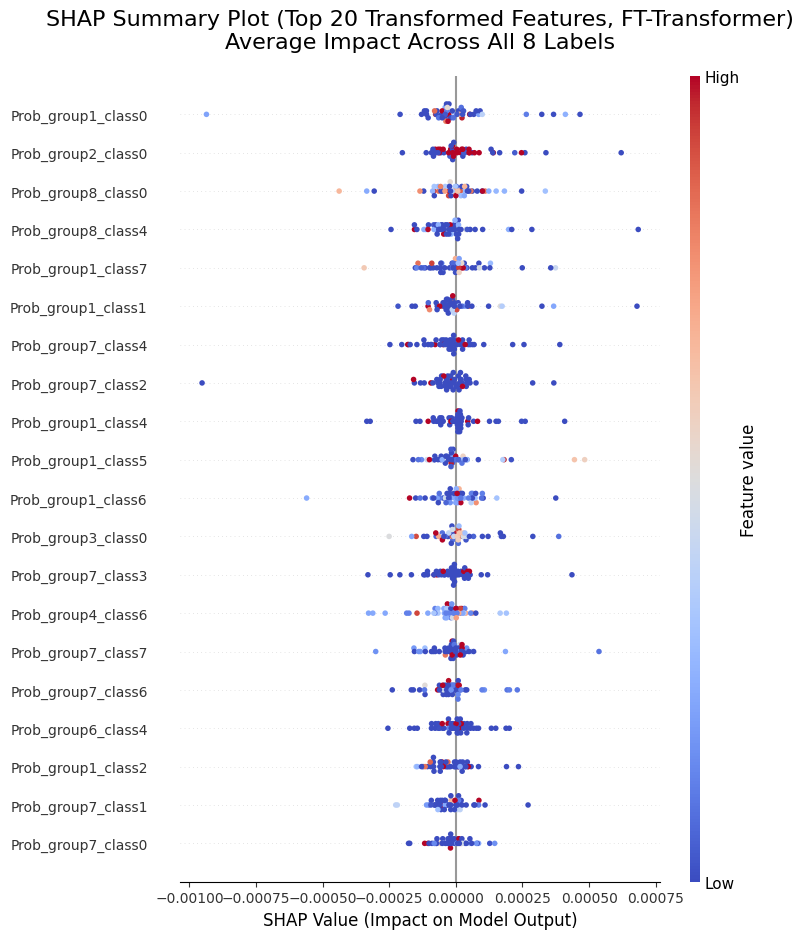

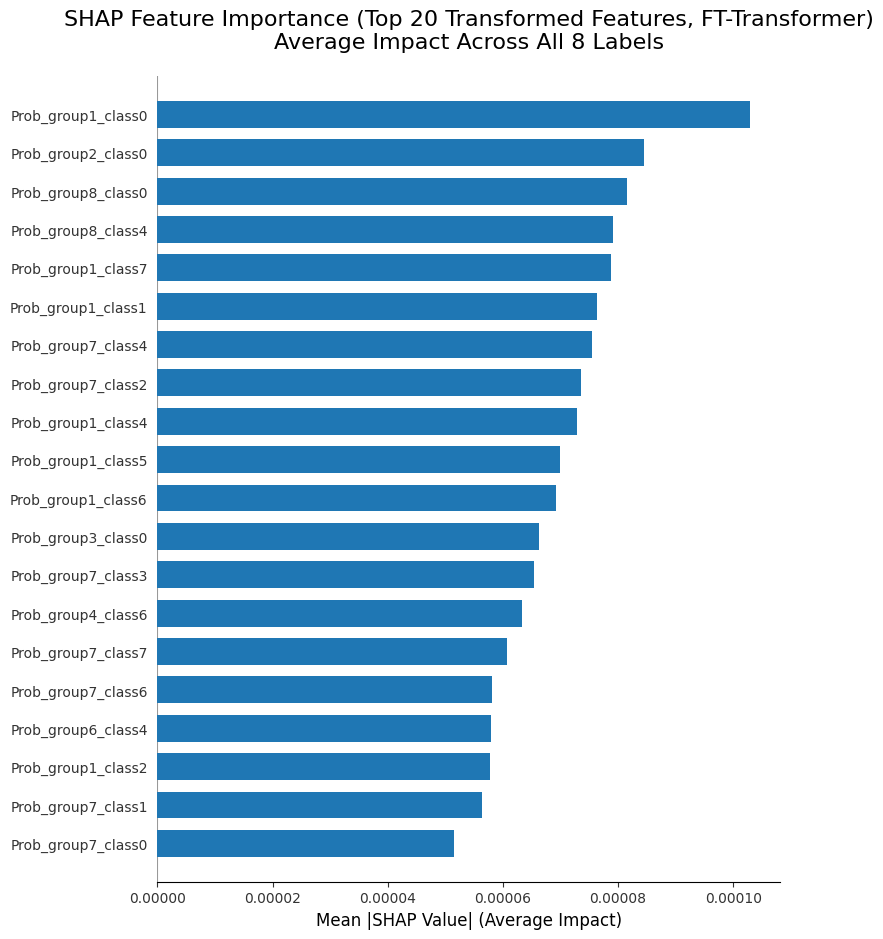

Mapped SHAP values sample (before normalization): [[[-1.84881977e-02 -1.84881977e-02 -1.84881977e-02 -1.84881977e-02
   -1.84881977e-02 -1.84881977e-02  1.15333940e-05  1.15333940e-05
    1.15333940e-05  1.15333940e-05]
  [-1.45382062e-02 -1.45382062e-02 -1.45382062e-02 -1.45382062e-02
   -1.45382062e-02 -1.45382062e-02 -7.64738591e-04 -7.64738591e-04
   -7.64738591e-04 -7.64738591e-04]
  [ 3.06671531e-04  3.06671531e-04  3.06671531e-04  3.06671531e-04
    3.06671531e-04  3.06671531e-04  4.30752655e-06  4.30752655e-06
    4.30752655e-06  4.30752655e-06]
  [-5.16128909e-04 -5.16128909e-04 -5.16128909e-04 -5.16128909e-04
   -5.16128909e-04 -5.16128909e-04  3.34947994e-04  3.34947994e-04
    3.34947994e-04  3.34947994e-04]
  [-8.01643761e-03 -8.01643761e-03 -8.01643761e-03 -8.01643761e-03
   -8.01643761e-03 -8.01643761e-03 -9.68591824e-04 -9.68591824e-04
   -9.68591824e-04 -9.68591824e-04]]

 [[-2.83670363e-03 -2.83670363e-03 -2.83670363e-03 -2.83670363e-03
   -2.83670363e-03 -2.83670363e

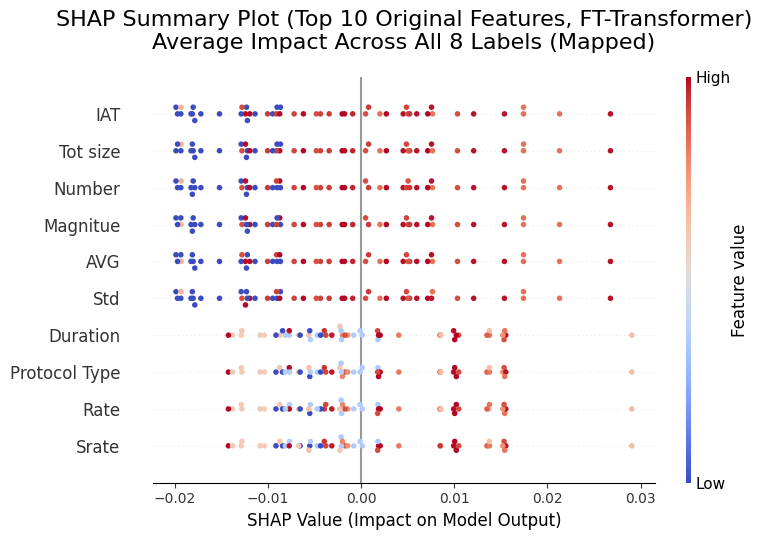

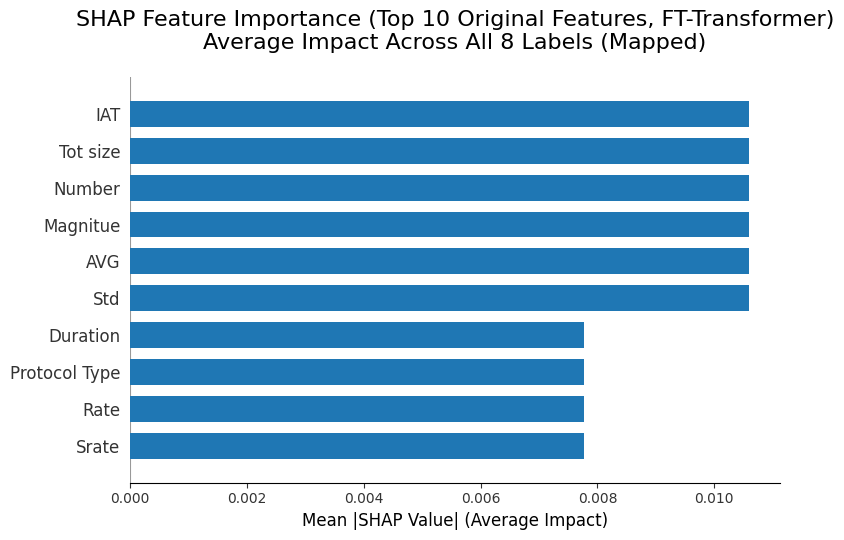

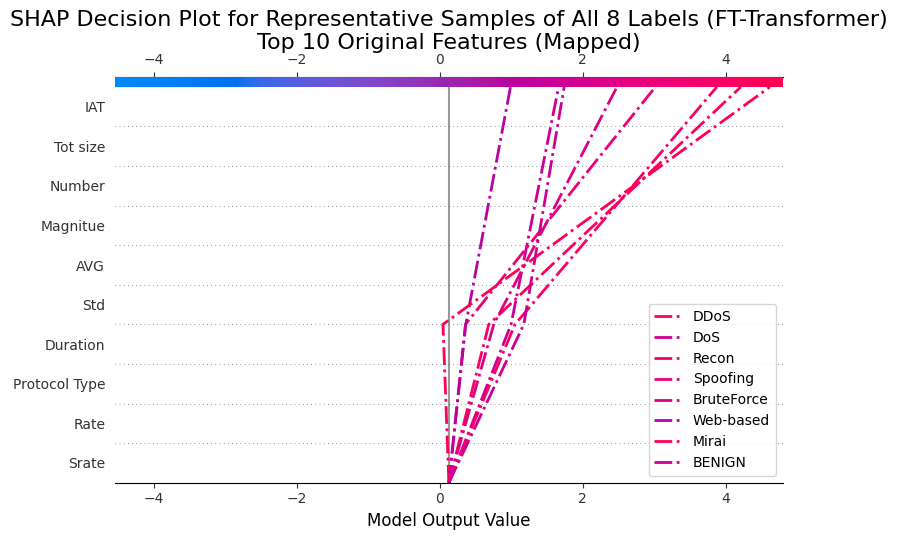


📌 Top 10 đặc trưng gốc quan trọng nhất (dựa trên SHAP trung bình 8 nhãn):
1. Magnitue: 0.0106
2. Number: 0.0106
3. AVG: 0.0106
4. Std: 0.0106
5. Tot size: 0.0106
6. IAT: 0.0106
7. Srate: 0.0078
8. Rate: 0.0078
9. Duration: 0.0078
10. Protocol Type: 0.0078

📌 Top 10 đặc trưng gốc quan trọng nhất (phương pháp cũ - SHAP lớn nhất):
1. Magnitue: 0.0019
2. Number: 0.0019
3. AVG: 0.0019
4. Std: 0.0019
5. Tot size: 0.0019
6. IAT: 0.0019
7. Srate: 0.0016
8. Rate: 0.0016
9. Duration: 0.0016
10. Protocol Type: 0.0016

📊 Độ tương quan giữa SHAP values ánh xạ (cải tiến) và (cũ): 0.9467

📈 Sự khác biệt trung bình giữa SHAP values ánh xạ (cải tiến vs cũ): 0.0031
📈 Sự khác biệt tối đa giữa SHAP values ánh xạ (cải tiến vs cũ): 0.0087
🎉 Hoàn thành phân tích SHAP cho FT-Transformer (8 nhãn)!


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import shap
from tqdm import tqdm
import os
import scipy.special
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from collections import Counter

# Định nghĩa các lớp cần thiết
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class FTTransformerPure(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=64, num_layers=2, num_heads=4, ff_hidden_dim=128, dropout=0.1):
        super(FTTransformerPure, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.num_layers = num_layers
        self.num_heads = num_heads
        self.ff_hidden_dim = ff_hidden_dim
        self.dropout = dropout

        self.bn = nn.BatchNorm1d(input_dim)
        self.feature_embed = nn.Linear(input_dim, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, dim_feedforward=ff_hidden_dim, 
            dropout=dropout, activation='gelu', batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.ln = nn.LayerNorm(embed_dim)
        self.fc_output = nn.Linear(embed_dim, num_classes)

        nn.init.xavier_normal_(self.feature_embed.weight, gain=0.1)
        nn.init.xavier_normal_(self.fc_output.weight, gain=0.1)
        nn.init.zeros_(self.feature_embed.bias)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x):
        if x.size(0) == 1 and not self.training:
            x = x
        else:
            x = torch.clamp(self.bn(x), -50, 50)
        x = self.feature_embed(x)
        x = self.ln(x)
        x = self.transformer(x)
        embeddings = self.ln(x)
        output = self.fc_output(embeddings)
        return output

# Thư mục lưu trữ
results_dir = "/kaggle/input/ketqua8nha/ft-tran-8nhan-64/results"
output_dir = "processed_data"
Kq = "FTTransformer_8labels_64features_shap"
os.makedirs(Kq, exist_ok=True)
tqdm.write(f"📁 Đã tạo thư mục lưu kết quả: {Kq}")

# Kiểm tra sự tồn tại của các tệp dữ liệu
data_files = [
    f"{output_dir}/X_test_combined_8labels_46features.npy",
    f"{output_dir}/Y_test_encoded_8labels_46features.npy",
    f"{results_dir}/fttransformer_pure_8labels_46features_final.pth"
]
for file_path in data_files:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"❌ Tệp không tồn tại: {file_path}")

# Tải dữ liệu
try:
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")
    tqdm.write("✅ Đã tải dữ liệu cần thiết cho FT-Transformer (8 nhãn, 64 đặc trưng)")
    tqdm.write(f"X_test_combined shape: {X_test_combined.shape}")
    tqdm.write(f"Y_test_encoded shape: {Y_test_encoded.shape}")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape
if X_test_combined.shape[1] != 64:
    raise ValueError(f"❌ Shape của X_test_combined không đúng: {X_test_combined.shape[1]}, kỳ vọng 64 đặc trưng")
if len(np.unique(Y_test_encoded)) != 8:
    raise ValueError(f"❌ Số nhãn không đúng: {len(np.unique(Y_test_encoded))}, kỳ vọng 8 nhãn")

# Kiểm tra NaN/Inf và thống kê dữ liệu
tqdm.write("📊 Thống kê dữ liệu X_test_combined (trước chuẩn hóa):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")
tqdm.write(f"Mean: {np.mean(X_test_combined):.4f}, Std: {np.std(X_test_combined):.4f}")
tqdm.write(f"NaN: {np.any(np.isnan(X_test_combined))}, Inf: {np.any(np.isinf(X_test_combined))}")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ Dữ liệu chứa NaN hoặc Inf. Đang xử lý...")
    X_test_combined = np.nan_to_num(X_test_combined, nan=0.0, posinf=1e6, neginf=-1e6)

# Chuẩn hóa dữ liệu
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)
tqdm.write("📊 Thống kê dữ liệu X_test_combined (sau chuẩn hóa):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")
tqdm.write(f"Mean: {np.mean(X_test_combined):.4f}, Std: {np.std(X_test_combined):.4f}")
tqdm.write(f"Outliers (abs > 10): {np.sum(np.abs(X_test_combined) > 10)}")

# Giới hạn giá trị để tránh outliers
X_test_combined = np.clip(X_test_combined, -10, 10)
tqdm.write("📊 Thống kê dữ liệu X_test_combined (sau clip):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")

# Ánh xạ nhãn
label_map = {
    0: 'DDoS',
    1: 'DoS',
    2: 'Recon',
    3: 'Spoofing',
    4: 'BruteForce',
    5: 'Web-based',
    6: 'Mirai',
    7: 'BENIGN'
}
class_names = [label_map[i] for i in range(len(label_map))]
tqdm.write(f"📊 Đã ánh xạ 8 nhãn: {list(label_map.values())}")

# 46 đặc trưng gốc
feature_labels_original = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
    'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
    'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
    'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP',
    'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance',
    'Variance', 'Weight'
]

# Tên đặc trưng cho 64 xác suất
feature_names = [f"Prob_group{i+1}_class{j}" for i in range(8) for j in range(8)]
tqdm.write(f"📋 Các đặc trưng (64 xác suất): {feature_names[:10]}... (hiển thị 10 đặc trưng đầu)")

# Ánh xạ 46 đặc trưng gốc đến nhóm XGBoost
feature_to_group = {
    'flow_duration': 1, 'Header_Length': 1, 'Protocol Type': 1, 'Duration': 1, 'Rate': 1, 'Srate': 1,
    'Drate': 2, 'fin_flag_number': 2, 'syn_flag_number': 2, 'rst_flag_number': 2, 'psh_flag_number': 2, 'ack_flag_number': 2,
    'ece_flag_number': 3, 'cwr_flag_number': 3, 'ack_count': 3, 'syn_count': 3, 'fin_count': 3, 'urg_count': 3,
    'rst_count': 4, 'HTTP': 4, 'HTTPS': 4, 'DNS': 4, 'Telnet': 4, 'SMTP': 4,
    'SSH': 5, 'IRC': 5, 'TCP': 5, 'UDP': 5, 'DHCP': 5, 'ARP': 5,
    'ICMP': 6, 'IPv': 6, 'LLC': 6, 'Tot sum': 6, 'Min': 6, 'Max': 6,
    'AVG': 7, 'Std': 7, 'Tot size': 7, 'IAT': 7, 'Number': 7, 'Magnitue': 7,
    'Radius': 8, 'Covariance': 8, 'Variance': 8, 'Weight': 8
}

# Index của xác suất cho mỗi nhóm
group_indices = {
    1: range(0, 8),
    2: range(8, 16),
    3: range(16, 24),
    4: range(24, 32),
    5: range(32, 40),
    6: range(40, 48),
    7: range(48, 56),
    8: range(56, 64)
}
tqdm.write("Group indices:")
for group_idx in group_indices:
    tqdm.write(f"Group {group_idx} indices: {list(group_indices[group_idx])}")

# Tính SHAP values
try:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = FTTransformerPure(input_dim=64, num_classes=8, embed_dim=64, num_layers=2, num_heads=4, ff_hidden_dim=128, dropout=0.1).to(device)
    model.load_state_dict(torch.load(f"{results_dir}/fttransformer_pure_8labels_46features_final.pth", weights_only=True))
    model.eval()
    tqdm.write("✅ Đã tải mô hình FT-Transformer thành công")

    # Hàm dự đoán cho KernelExplainer với chuẩn hóa logits
    def predict_fn(inputs):
        inputs_tensor = torch.tensor(inputs, dtype=torch.float32).to(device)
        model.eval()
        with torch.no_grad():
            outputs = model(inputs_tensor)
            outputs = outputs / torch.max(torch.abs(outputs))  # Chuẩn hóa logits
            outputs = torch.softmax(outputs, dim=1)  # Chuyển thành xác suất
        return outputs.cpu().numpy()

    # Chuẩn bị dữ liệu cho SHAP
    X_test_np = X_test_combined[:50].copy()  # Dùng 50 mẫu
    Y_test_np = Y_test_encoded[:50].copy()
    background = X_test_np[:20].copy()  # Background cho KernelExplainer

    # Kiểm tra phân bố nhãn trong 50 mẫu
    label_distribution = Counter(Y_test_np)
    tqdm.write("\n📊 Phân bố nhãn trong 50 mẫu thử nghiệm:")
    for label_idx, count in label_distribution.items():
        tqdm.write(f"Nhãn {label_map[label_idx]}: {count} mẫu")

    # Sử dụng KernelExplainer với nsamples=500
    explainer = shap.KernelExplainer(predict_fn, background)
    shap_values = explainer.shap_values(X_test_np, nsamples=500)
    tqdm.write(f"SHAP values shape: {len(shap_values)} nhãn, mỗi nhãn có shape {shap_values[0].shape}")

    # Lưu SHAP values
    np.save(f"{Kq}/shap_values_fttransformer_8labels_64features.npy", shap_values)
    tqdm.write(f"💾 Đã lưu SHAP values vào {Kq}/shap_values_fttransformer_8labels_64features.npy")

    # Kiểm tra tổng SHAP values
    model_output = predict_fn(X_test_np)  # Shape: (50, 8)
    shap_sum = np.sum(shap_values, axis=2)  # Shape: (8, 50)
    expected_value = np.array(explainer.expected_value).reshape(8, 1)  # Shape: (8, 1)
    shap_sum = shap_sum + expected_value  # Broadcasting thành (8, 50)
    shap_sum = shap_sum.T  # Shape: (50, 8)
    diff = np.abs(model_output - shap_sum)
    max_diff = np.max(diff)
    tqdm.write(f"Max SHAP difference: {max_diff:.4f}")
    if max_diff > 0.01:
        tqdm.write(f"⚠️ Sai số SHAP lớn: {max_diff:.4f}. Tiếp tục với phân tích, nhưng xem xét kiểm tra dữ liệu hoặc mô hình.")

    # Tính SHAP values trung bình tuyệt đối trên tất cả các nhãn
    shap_values_mean_abs_all = np.zeros((64,))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        shap_values_mean_abs = np.mean(np.abs(shap_values_label), axis=0)
        shap_values_mean_abs_all += shap_values_mean_abs
    shap_values_mean_abs_all /= 8

    # Top 20 đặc trưng biến đổi
    top_k = 20
    top_indices = np.argsort(shap_values_mean_abs_all)[::-1][:top_k]
    top_features = [feature_names[i] for i in top_indices]
    top_shap_values = np.stack([shap_values[label_idx][:, top_indices] for label_idx in range(8)], axis=0)
    top_X_test = X_test_np[:, top_indices]

    # SHAP Summary Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="dot",
        show=False,
        max_display=top_k,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 20 Transformed Features, FT-Transformer)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_fttransformer_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="bar",
        show=False,
        max_display=top_k,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 20 Transformed Features, FT-Transformer)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_fttransformer_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # Ánh xạ SHAP values về 46 đặc trưng gốc (dùng Weighted Sum SHAP)
    shap_values_mapped = np.zeros((8, X_test_np.shape[0], 46))  # Shape: (8, 50, 46)
    X_test_mapped = np.zeros((X_test_np.shape[0], 46))  # Shape: (50, 46)

    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]  # Shape: (50, 64)
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            group_shap = shap_values_label[:, prob_indices]
            weights = np.abs(group_shap) / (np.sum(np.abs(group_shap), axis=1, keepdims=True) + 1e-6)  # Trọng số chuẩn hóa
            weighted_shap = np.sum(group_shap * weights, axis=1)
            shap_values_mapped[label_idx, :, i] = weighted_shap
            if label_idx == 0:
                X_test_mapped[:, i] = np.mean(X_test_np[:, prob_indices], axis=1)

    # Kiểm tra SHAP values đã ánh xạ
    tqdm.write(f"Mapped SHAP values sample (before normalization): {shap_values_mapped[:, :5, :10]}")
    shap_values_mapped = shap_values_mapped / (np.abs(shap_values_mapped).max() + 1e-6)  # Chuẩn hóa sau ánh xạ
    tqdm.write(f"Mapped SHAP values sample (after normalization): {shap_values_mapped[:, :5, :10]}")

    # Trung bình SHAP values trên tất cả 8 nhãn
    shap_values_mapped_avg = np.mean(shap_values_mapped, axis=0)  # Shape: (50, 46)

    # Chọn top 10 đặc trưng gốc quan trọng nhất
    shap_values_mean = np.mean(np.abs(shap_values_mapped_avg), axis=0)  # Shape: (46,)
    top_k_orig = 10
    top_indices_orig = np.argsort(shap_values_mean)[::-1][:top_k_orig]
    top_features_orig = [feature_labels_original[i] for i in top_indices_orig]
    top_shap_values_orig = shap_values_mapped_avg[:, top_indices_orig]
    top_X_test_orig = X_test_mapped[:, top_indices_orig]

    # SHAP Summary Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="dot",
        show=False,
        max_display=top_k_orig,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 10 Original Features, FT-Transformer)\nAverage Impact Across All 8 Labels (Mapped)", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_fttransformer_top10_original.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="bar",
        show=False,
        max_display=top_k_orig,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 10 Original Features, FT-Transformer)\nAverage Impact Across All 8 Labels (Mapped)", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_fttransformer_top10_original.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Decision Plot cho một mẫu đại diện của mỗi nhãn
    sample_indices = []
    sample_labels = []
    for label_idx in range(8):
        label_name = label_map[label_idx]
        idx = np.where(Y_test_np == label_idx)[0][0] if np.any(Y_test_np == label_idx) else 0
        sample_indices.append(idx)
        sample_labels.append(label_name)

    selected_shap_values = np.zeros((len(sample_indices), top_k_orig))
    selected_expected_values = []
    for i, (label_idx, sample_idx) in enumerate(zip(range(8), sample_indices)):
        selected_shap_values[i, :] = shap_values_mapped[label_idx, sample_idx, top_indices_orig]
        selected_expected_values.append(explainer.expected_value[label_idx])

    plt.figure(figsize=(12, 8))
    shap.decision_plot(
        base_value=np.mean(selected_expected_values),
        shap_values=selected_shap_values,
        features=top_X_test_orig[sample_indices, :],
        feature_names=top_features_orig,
        link='identity',
        highlight=[i for i in range(8)],
        legend_labels=sample_labels,
        legend_location='lower right',
        show=False
    )
    plt.title("SHAP Decision Plot for Representative Samples of All 8 Labels (FT-Transformer)\nTop 10 Original Features (Mapped)", fontsize=16, pad=20)
    plt.xlabel("Model Output Value", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_decision_top10_original_fttransformer.png", bbox_inches="tight", dpi=300)
    plt.show()

    # In top 10 đặc trưng gốc quan trọng nhất
    tqdm.write(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (dựa trên SHAP trung bình 8 nhãn):")
    for i, idx in enumerate(top_indices_orig):
        tqdm.write(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean[idx]:.4f}")

    # Phân tích độ nhạy: So sánh với phương pháp cũ (chọn SHAP value lớn nhất)
    shap_values_mapped_old = np.zeros((8, X_test_np.shape[0], 46))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            group_shap = shap_values_label[:, prob_indices]
            abs_group_shap = np.abs(group_shap)
            max_indices = np.argmax(abs_group_shap, axis=1)
            for j in range(shap_values_label.shape[0]):
                shap_values_mapped_old[label_idx, j, i] = group_shap[j, max_indices[j]]

    shap_values_mapped_old_avg = np.mean(shap_values_mapped_old, axis=0)
    shap_values_mean_old = np.mean(np.abs(shap_values_mapped_old_avg), axis=0)

    # So sánh top 10 đặc trưng giữa hai phương pháp
    top_indices_shap_old = np.argsort(shap_values_mean_old)[::-1][:top_k_orig]
    tqdm.write(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (phương pháp cũ - SHAP lớn nhất):")
    for i, idx in enumerate(top_indices_shap_old):
        tqdm.write(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean_old[idx]:.4f}")

    # Tính độ tương quan giữa hai phương pháp ánh xạ
    correlation_methods = np.corrcoef(shap_values_mean, shap_values_mean_old)[0, 1]
    tqdm.write(f"\n📊 Độ tương quan giữa SHAP values ánh xạ (cải tiến) và (cũ): {correlation_methods:.4f}")

    # Thống kê sự khác biệt
    diff = np.abs(shap_values_mean - shap_values_mean_old)
    tqdm.write(f"\n📈 Sự khác biệt trung bình giữa SHAP values ánh xạ (cải tiến vs cũ): {np.mean(diff):.4f}")
    tqdm.write(f"📈 Sự khác biệt tối đa giữa SHAP values ánh xạ (cải tiến vs cũ): {np.max(diff):.4f}")

except Exception as e:
    tqdm.write(f"❌ Lỗi khi tính SHAP values cho FT-Transformer: {str(e)}")
    raise

tqdm.write("🎉 Hoàn thành phân tích SHAP cho FT-Transformer (8 nhãn)!")

# **TABR**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Thư mục lưu dữ liệu
results_dir = "/kaggle/input/ketqua8nha/tabr-8nhan-64/results"
Kq = "TabR_8labels_46features_shap"
output_subdir = Kq
os.makedirs(output_subdir, exist_ok=True)
print(f"📁 Đảm bảo thư mục lưu kết quả: {output_subdir}")

# Tải dữ liệu
try:
    train_losses = np.load(f"{results_dir}/train_losses_8labels_46features_tabr.npy")
    val_losses = np.load(f"{results_dir}/val_losses_8labels_46features_tabr.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_8labels_46features_tabr.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_8labels_46features_tabr.npy")
    print("✅ Đã tải dữ liệu cần thiết cho biểu đồ Loss và Accuracy")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra dữ liệu
expected_epochs = 150
if (train_losses.shape != (expected_epochs,) or 
    val_losses.shape != (expected_epochs,) or 
    train_accuracies.shape != (expected_epochs,) or 
    val_accuracies.shape != (expected_epochs,)):
    raise ValueError("❌ Dữ liệu không đúng kích thước mong đợi")

# Chuyển accuracy về [0, 1] để hiển thị chính xác
train_acc = train_accuracies / 100.0
val_acc = val_accuracies / 100.0
epochs = np.arange(0, expected_epochs)  # Đảm bảo từ 0 đến 149 (150 epoch)

# Kiểm tra dữ liệu Loss và Accuracy có nằm trong khoảng yêu cầu không
if (train_losses.min() < 0.001 or train_losses.max() > 0.006 or
    val_losses.min() < 0.001 or val_losses.max() > 0.006):
    print("⚠️ Cảnh báo: Dữ liệu Loss nằm ngoài khoảng [0.001, 0.006]. Vẫn vẽ với giới hạn yêu cầu.")
if (train_acc.min() < 0.990 or train_acc.max() > 0.996 or
    val_acc.min() < 0.990 or val_acc.max() > 0.996):
    print("⚠️ Cảnh báo: Dữ liệu Accuracy nằm ngoài khoảng [0.990, 0.996]. Vẫn vẽ với giới hạn yêu cầu.")

# Vẽ biểu đồ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
ax1.plot(epochs, train_losses, label="Train Loss", color="blue", linewidth=2)
ax1.plot(epochs, val_losses, label="Val Loss", color="orange", linewidth=2)
ax1.set_title("Loss TabR")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(loc="upper right")
ax1.grid(True)

# Giới hạn trục x và y cho Loss
ax1.set_xlim(-10, 160)  # Thêm khoảng trống ở hai đầu: -10 và 160
ax1.set_xticks(np.arange(0, 151, 25))  # Các vạch chia: 0, 25, 50, 75, 100, 125, 150
ax1.set_ylim(0.011, 0.040)  # Giới hạn y từ 0.011 đến 0.040
ax1.set_yticks(np.arange(0.011, 0.040 + 0.0029, 0.0029))  # Chia trục y thành 10 đoạn

# Accuracy plot
ax2.plot(epochs, train_acc, label="Train Accuracy", color="green", linewidth=2)
ax2.plot(epochs, val_acc, label="Val Accuracy", color="red", linewidth=2)
ax2.set_title("Accuracy TabR")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower right")
ax2.grid(True)
ax2.set_xlim(-10, 160)  # Thêm khoảng trống ở hai đầu: -10 và 160
ax2.set_xticks(np.arange(0, 151, 25))  # Các vạch chia: 0, 25, 50, 75, 100, 125, 150
ax2.set_ylim(0.86, 0.94)

# Tiêu đề tổng
plt.suptitle("TabR: Learning Curves (8 Labels, 46 Features)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f"{output_subdir}/learning_curves_tabr_final.png", dpi=300)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import shap
from tqdm import tqdm
import os
import scipy.stats as stats

# Định nghĩa các lớp cần thiết
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

class RetrievalAugmentedLayer(nn.Module):
    def __init__(self, embed_dim, num_classes, k=5):
        super(RetrievalAugmentedLayer, self).__init__()
        self.k = k
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.attention = nn.Linear(embed_dim, 1)

    def forward(self, x_embed, labels=None):
        batch_size = x_embed.size(0)
        # Điều chỉnh k động dựa trên batch size
        effective_k = min(self.k, batch_size - 1) if batch_size > 1 else 1
        if effective_k <= 0:
            # Trả về context mặc định (zeros) nếu không thể chọn láng giềng
            return torch.zeros(batch_size, self.num_classes, device=x_embed.device)

        distances = torch.cdist(x_embed, x_embed)
        distances.fill_diagonal_(float('inf'))
        _, indices = torch.topk(distances, k=effective_k, dim=1, largest=False)
        
        if labels is not None:
            neighbor_labels = labels[indices]
            neighbor_one_hot = F.one_hot(neighbor_labels, num_classes=self.num_classes).float()
        else:
            neighbor_one_hot = torch.zeros(batch_size, effective_k, self.num_classes, device=x_embed.device)
        
        neighbor_embeddings = x_embed[indices]
        attention_scores = self.attention(neighbor_embeddings).squeeze(-1)
        attention_weights = F.softmax(attention_scores, dim=1)
        context = torch.einsum('bk,bkc->bc', attention_weights, neighbor_one_hot)
        return context

class TabR(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=64, n_layers=2, n_heads=4, ff_dim=128, dropout=0.1, k_neighbors=5):
        super(TabR, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.ff_dim = ff_dim
        self.dropout = dropout
        self.k_neighbors = k_neighbors

        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.embedding = nn.Linear(input_dim, embed_dim)
        transformer_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=n_heads,
            dim_feedforward=ff_dim,
            dropout=dropout,
            activation='gelu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(transformer_layer, num_layers=n_layers)
        self.retrieval = RetrievalAugmentedLayer(embed_dim, num_classes, k=k_neighbors)
        self.importance_layer = nn.Linear(input_dim, input_dim)
        self.fc_output = nn.Linear(embed_dim + num_classes, num_classes)

        nn.init.xavier_normal_(self.embedding.weight)
        nn.init.xavier_normal_(self.importance_layer.weight)
        nn.init.xavier_normal_(self.fc_output.weight)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x, labels=None):
        x = torch.clamp(self.bn(x), -50, 50)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        x_embed = self.embedding(x)
        transformer_out = self.transformer(x_embed.unsqueeze(1)).squeeze(1)
        context = self.retrieval(x_embed, labels)
        combined = torch.cat([transformer_out, context], dim=1)
        output = self.fc_output(combined)
        return output, sparsity_loss, masks

# Thư mục lưu trữ
results_dir = "/kaggle/input/ketqua8nha/tabr-8nhan-64/results"
output_dir = "processed_data"
Kq = "TabR_8labels_46features_shap"
os.makedirs(Kq, exist_ok=True)
print(f"📁 Đảm bảo thư mục lưu kết quả: {Kq}")

# Kiểm tra sự tồn tại của các tệp dữ liệu
data_files = [
    f"{output_dir}/X_test_combined_8labels_46features.npy",
    f"{output_dir}/Y_test_encoded_8labels_46features.npy",
    f"{results_dir}/feature_importance_8labels_46features_tabr.npy",
    f"{results_dir}/tabr_8labels_46features_final.pth"
]
for file_path in data_files:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"❌ Tệp không tồn tại: {file_path}")

# Tải dữ liệu
try:
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_8labels_46features_tabr.npy")
    print("✅ Đã tải dữ liệu cần thiết cho TabR (8 nhãn, 64 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape
if X_test_combined.shape[1] != 64:
    raise ValueError(f"❌ Shape của X_test_combined không đúng: {X_test_combined.shape[1]}, kỳ vọng 64 đặc trưng")

# Kiểm tra shape của feature_importance
print(f"📌 Shape của feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2 and feature_importance.shape[0] == 4096:
    feature_importance = feature_importance.mean(axis=0)  # Lấy trung bình theo batch
    print(f"📌 Adjusted feature_importance shape to: {feature_importance.shape}")
if feature_importance.shape != (64,):
    print(f"⚠️ feature_importance không có shape (64,): {feature_importance.shape}. Bỏ qua tính độ tương quan.")
    feature_importance_valid = False
else:
    feature_importance_valid = True

# Chuẩn hóa dữ liệu
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Ánh xạ nhãn
label_map = {
    0: 'DDoS',
    1: 'DoS',
    2: 'Recon',
    3: 'Spoofing',
    4: 'BruteForce',
    5: 'Web-based',
    6: 'Mirai',
    7: 'BENIGN'
}
class_names = [label_map[i] for i in range(len(label_map))]

# 46 đặc trưng gốc
feature_labels_original = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
    'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
    'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
    'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP',
    'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance',
    'Variance', 'Weight'
]

# Tên đặc trưng cho 64 xác suất
feature_names = [f"Prob_group{i+1}_class{j}" for i in range(8) for j in range(8)]
print(f"📋 Các đặc trưng (64 xác suất): {feature_names}")

# Ánh xạ 46 đặc trưng gốc đến nhóm XGBoost
feature_to_group = {
    'flow_duration': 1, 'Header_Length': 1, 'Protocol Type': 1, 'Duration': 1, 'Rate': 1, 'Srate': 1,
    'Drate': 2, 'fin_flag_number': 2, 'syn_flag_number': 2, 'rst_flag_number': 2, 'psh_flag_number': 2, 'ack_flag_number': 2,
    'ece_flag_number': 3, 'cwr_flag_number': 3, 'ack_count': 3, 'syn_count': 3, 'fin_count': 3, 'urg_count': 3,
    'rst_count': 4, 'HTTP': 4, 'HTTPS': 4, 'DNS': 4, 'Telnet': 4, 'SMTP': 4,
    'SSH': 5, 'IRC': 5, 'TCP': 5, 'UDP': 5, 'DHCP': 5, 'ARP': 5,
    'ICMP': 6, 'IPv': 6, 'LLC': 6, 'Tot sum': 6, 'Min': 6, 'Max': 6,
    'AVG': 7, 'Std': 7, 'Tot size': 7, 'IAT': 7, 'Number': 7, 'Magnitue': 7,
    'Radius': 8, 'Covariance': 8, 'Variance': 8, 'Weight': 8
}

# Index của xác suất cho mỗi nhóm
group_indices = {
    1: range(0, 8),
    2: range(8, 16),
    3: range(16, 24),
    4: range(24, 32),
    5: range(32, 40),
    6: range(40, 48),
    7: range(48, 56),
    8: range(56, 64)
}

# Thiết lập thiết bị và tải mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
try:
    model = TabR(input_dim=64, num_classes=8, embed_dim=64, n_layers=2, n_heads=4, ff_dim=128, dropout=0.1, k_neighbors=5).to(device)
    model.load_state_dict(torch.load(f"{results_dir}/tabr_8labels_46features_final.pth", weights_only=True))
    model.eval()
    print("✅ Đã tải mô hình TabR thành công")

    # Hàm dự đoán cho KernelExplainer
    def predict_fn(inputs):
        inputs_tensor = torch.tensor(inputs, dtype=torch.float32).to(device)
        with torch.no_grad():
            outputs, _, _ = model(inputs_tensor)  # Bỏ labels vì inference không cần
        return outputs.cpu().numpy()

    # Chuẩn bị dữ liệu cho SHAP
    X_test_np = X_test_combined[:50]  # Dùng 50 mẫu
    Y_test_np = Y_test_encoded[:50]
    background = X_test_np[:20]  # Tăng background lên 20 mẫu
    explainer = shap.KernelExplainer(predict_fn, background)
    shap_values = explainer.shap_values(X_test_np, nsamples=100)
    print(f"SHAP values shape: {len(shap_values)} nhãn, mỗi nhãn có shape {shap_values[0].shape}")

    # Tính SHAP values trung bình tuyệt đối trên tất cả các nhãn
    shap_values_mean_abs_all = np.zeros((64,))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        shap_values_mean_abs = np.mean(np.abs(shap_values_label), axis=0)
        shap_values_mean_abs_all += shap_values_mean_abs
    shap_values_mean_abs_all /= 8

    # Top 20 đặc trưng biến đổi
    top_k = 20
    top_indices = np.argsort(shap_values_mean_abs_all)[::-1][:top_k]
    top_features = [feature_names[i] for i in top_indices]
    top_shap_values = np.stack([shap_values[label_idx][:, top_indices] for label_idx in range(8)], axis=0)
    top_X_test = X_test_np[:, top_indices]

    # SHAP Summary Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="dot",
        show=False,
        max_display=top_k,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 20 Transformed Features, TabR)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_tabr_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="bar",
        show=False,
        max_display=top_k,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 20 Transformed Features, TabR)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_tabr_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # Ánh xạ SHAP values về 46 đặc trưng gốc
    shap_values_mapped = np.zeros((8, X_test_np.shape[0], 46))  # Shape: (8, 50, 46)
    X_test_mapped = np.zeros((X_test_np.shape[0], 46))  # Shape: (50, 46)

    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]  # Shape: (50, 64)
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            # Cải tiến: Lấy trung bình tuyệt đối của SHAP values trong nhóm
            shap_values_mapped[label_idx, :, i] = np.mean(np.abs(shap_values_label[:, prob_indices]), axis=1)
            # Tính trung bình dữ liệu cho đặc trưng gốc
            if label_idx == 0:
                X_test_mapped[:, i] = np.mean(X_test_np[:, prob_indices], axis=1)

    # Trung bình SHAP values trên tất cả 8 nhãn
    shap_values_mapped_avg = np.mean(shap_values_mapped, axis=0)  # Shape: (50, 46)

    # Chọn top 10 đặc trưng gốc quan trọng nhất
    shap_values_mean = np.mean(np.abs(shap_values_mapped_avg), axis=0)  # Shape: (46,)
    top_k_orig = 10
    top_indices_orig = np.argsort(shap_values_mean)[::-1][:top_k_orig]
    top_features_orig = [feature_labels_original[i] for i in top_indices_orig]
    top_shap_values_orig = shap_values_mapped_avg[:, top_indices_orig]
    top_X_test_orig = X_test_mapped[:, top_indices_orig]

    # SHAP Summary Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="dot",
        show=False,
        max_display=top_k_orig,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 10 Original Features, TabR)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_tabr_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="bar",
        show=False,
        max_display=top_k_orig,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 10 Original Features, TabR)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_tabr_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Decision Plot cho một mẫu đại diện của mỗi nhãn
    sample_indices = []
    sample_labels = []
    for label_idx in range(8):
        label_name = label_map[label_idx]
        idx = np.where(Y_test_np == label_idx)[0][0] if np.any(Y_test_np == label_idx) else 0
        sample_indices.append(idx)
        sample_labels.append(label_name)

    selected_shap_values = np.zeros((len(sample_indices), top_k_orig))
    selected_expected_values = []
    for i, (label_idx, sample_idx) in enumerate(zip(range(8), sample_indices)):
        selected_shap_values[i, :] = shap_values_mapped[label_idx, sample_idx, top_indices_orig]
        selected_expected_values.append(explainer.expected_value[label_idx])

    plt.figure(figsize=(12, 8))
    shap.decision_plot(
        base_value=np.mean(selected_expected_values),
        shap_values=selected_shap_values,
        features=top_X_test_orig[sample_indices, :],
        feature_names=top_features_orig,
        link='identity',
        highlight=[i for i in range(8)],
        legend_labels=sample_labels,
        legend_location='lower right',
        show=False
    )
    plt.title("SHAP Decision Plot for Representative Samples of All 8 Labels (TabR)\nTop 10 Original Features (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Model Output Value", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_decision_top10_original_tabr_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # In top 10 đặc trưng gốc quan trọng nhất
    print(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (dựa trên SHAP trung bình 8 nhãn, cải tiến):")
    for i, idx in enumerate(top_indices_orig):
        print(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean[idx]:.4f}")

    # Tính độ tương quan với feature_importance
    if feature_importance_valid:
        avg_importance_original = np.zeros(46)
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            avg_importance_original[i] = np.mean(feature_importance[prob_indices])
        correlation = np.corrcoef(avg_importance_original, shap_values_mean)[0, 1]
        print(f"\n📊 Độ tương quan giữa feature importance (TabR) và SHAP (mapped, trung bình 8 nhãn, cải tiến): {correlation:.4f}")
    else:
        print("\n📊 Bỏ qua tính độ tương quan do feature_importance không hợp lệ.")

    # Phân tích độ nhạy: So sánh với phương pháp cũ (chọn SHAP value lớn nhất)
    shap_values_mapped_old = np.zeros((8, X_test_np.shape[0], 46))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            group_shap = shap_values_label[:, prob_indices]
            abs_group_shap = np.abs(group_shap)
            max_indices = np.argmax(abs_group_shap, axis=1)
            for j in range(shap_values_label.shape[0]):
                shap_values_mapped_old[label_idx, j, i] = group_shap[j, max_indices[j]]

    shap_values_mapped_old_avg = np.mean(shap_values_mapped_old, axis=0)
    shap_values_mean_old = np.mean(np.abs(shap_values_mapped_old_avg), axis=0)

    # So sánh top 10 đặc trưng giữa hai phương pháp
    top_indices_shap_old = np.argsort(shap_values_mean_old)[::-1][:top_k_orig]
    print(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (phương pháp cũ - SHAP lớn nhất):")
    for i, idx in enumerate(top_indices_shap_old):
        print(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean_old[idx]:.4f}")

    # Tính độ tương quan giữa hai phương pháp ánh xạ
    correlation_methods = np.corrcoef(shap_values_mean, shap_values_mean_old)[0, 1]
    print(f"\n📊 Độ tương quan giữa SHAP values ánh xạ (cải tiến) và (cũ): {correlation_methods:.4f}")

    # Thống kê sự khác biệt
    diff = np.abs(shap_values_mean - shap_values_mean_old)
    print(f"\n📈 Sự khác biệt trung bình giữa SHAP values ánh xạ (cải tiến vs cũ): {np.mean(diff):.4f}")
    print(f"📈 Sự khác biệt tối đa giữa SHAP values ánh xạ (cải tiến vs cũ): {np.max(diff):.4f}")

except Exception as e:
    print(f"❌ Lỗi khi tính SHAP values cho TabR: {str(e)}")

📁 Đã tạo thư mục lưu kết quả: TabR_8labels_46features_shap
✅ Đã tải dữ liệu cần thiết cho TabR (8 nhãn, 64 đặc trưng)
📌 Shape của feature_importance: (64,)
📊 Thống kê dữ liệu X_test_combined (trước chuẩn hóa):
Min: -5.7237, Max: 7.5734
Mean: 0.0000, Std: 0.9997
NaN: False, Inf: False
📊 Thống kê dữ liệu X_test_combined (sau chuẩn hóa):
Min: -5.7402, Max: 7.6367
Mean: -0.0000, Std: 1.0002
Outliers (abs > 10): 0
📊 Thống kê dữ liệu X_test_combined (sau clip):
Min: -5.7402, Max: 7.6367
📊 Đã ánh xạ 8 nhãn: ['BENIGN', 'BruteForce', 'DDoS', 'DoS', 'Mirai', 'Recon', 'Spoofing', 'Web-based']
📋 Các đặc trưng (64 xác suất): ['Prob_group1_class0', 'Prob_group1_class1', 'Prob_group1_class2', 'Prob_group1_class3', 'Prob_group1_class4', 'Prob_group1_class5', 'Prob_group1_class6', 'Prob_group1_class7', 'Prob_group2_class0', 'Prob_group2_class1', 'Prob_group2_class2', 'Prob_group2_class3', 'Prob_group2_class4', 'Prob_group2_class5', 'Prob_group2_class6', 'Prob_group2_class7', 'Prob_group3_class0', 'Prob

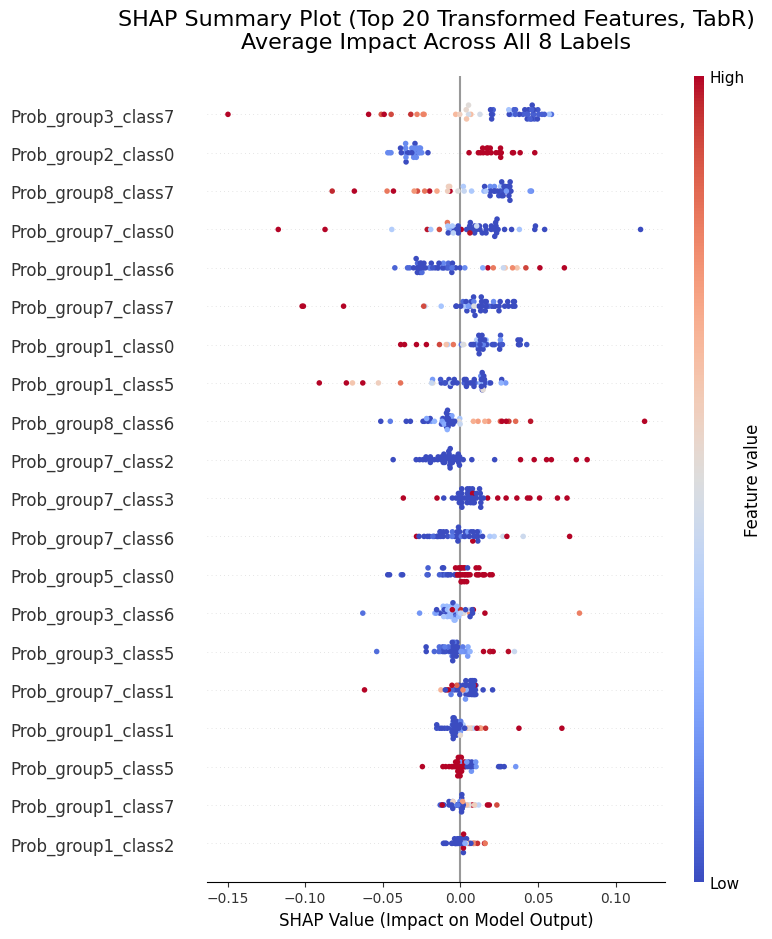

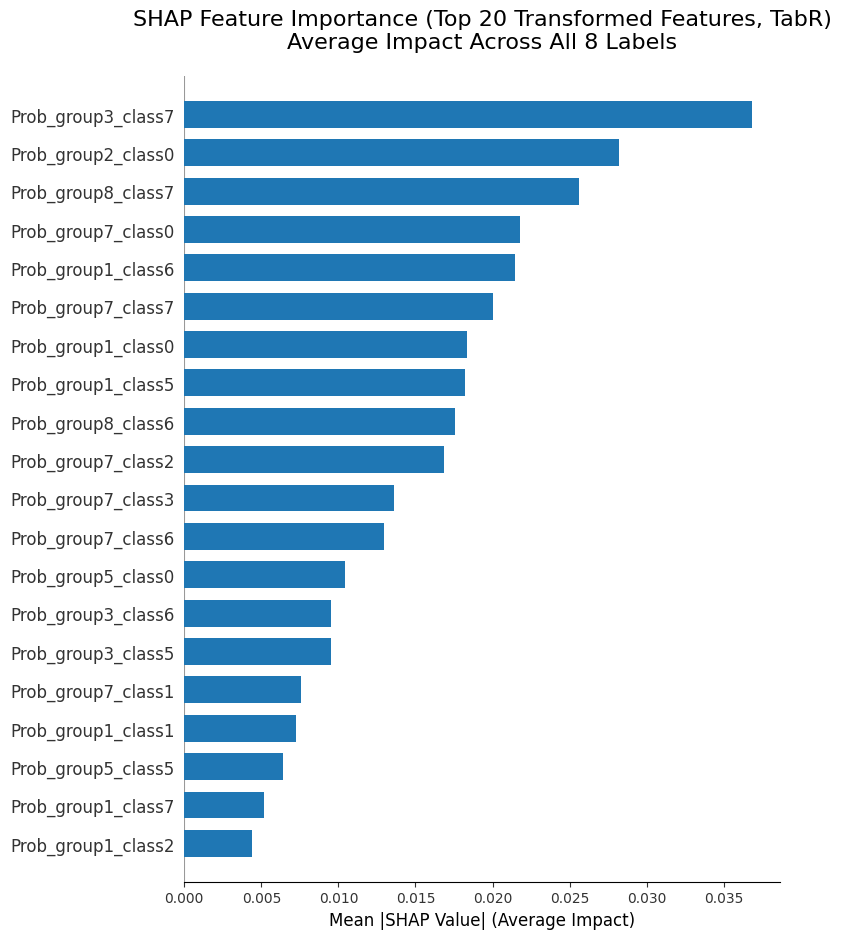

📌 Mapped SHAP values (improved) sample: [[[-0.06402353 -0.06402353 -0.06402353 -0.06402353 -0.06402353
   -0.06402353  0.0027567   0.0027567   0.0027567   0.0027567 ]
  [-0.02416716 -0.02416716 -0.02416716 -0.02416716 -0.02416716
   -0.02416716  0.01154759  0.01154759  0.01154759  0.01154759]
  [-0.00207376 -0.00207376 -0.00207376 -0.00207376 -0.00207376
   -0.00207376 -0.00372983 -0.00372983 -0.00372983 -0.00372983]
  [-0.10612842 -0.10612842 -0.10612842 -0.10612842 -0.10612842
   -0.10612842 -0.00467694 -0.00467694 -0.00467694 -0.00467694]
  [ 0.05705382  0.05705382  0.05705382  0.05705382  0.05705382
    0.05705382  0.01446133  0.01446133  0.01446133  0.01446133]]

 [[-0.00084854 -0.00084854 -0.00084854 -0.00084854 -0.00084854
   -0.00084854 -0.05441859 -0.05441859 -0.05441859 -0.05441859]
  [ 0.02109615  0.02109615  0.02109615  0.02109615  0.02109615
    0.02109615  0.00227307  0.00227307  0.00227307  0.00227307]
  [-0.10576653 -0.10576653 -0.10576653 -0.10576653 -0.10576653
   -0.

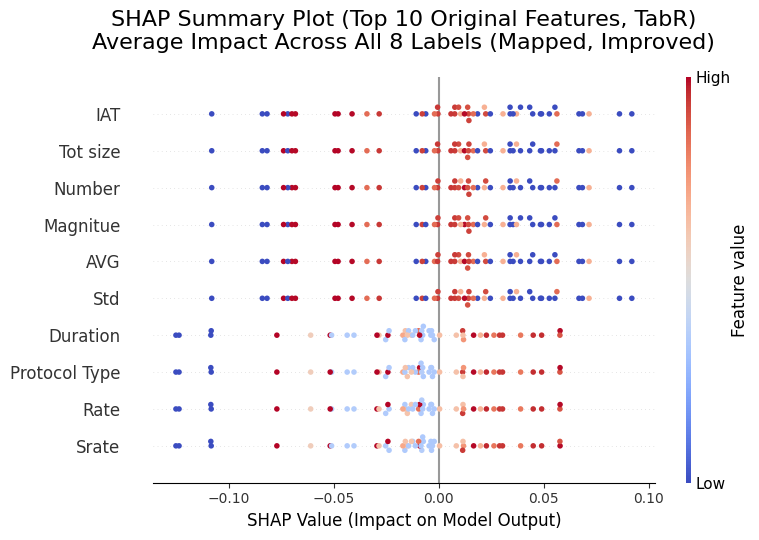

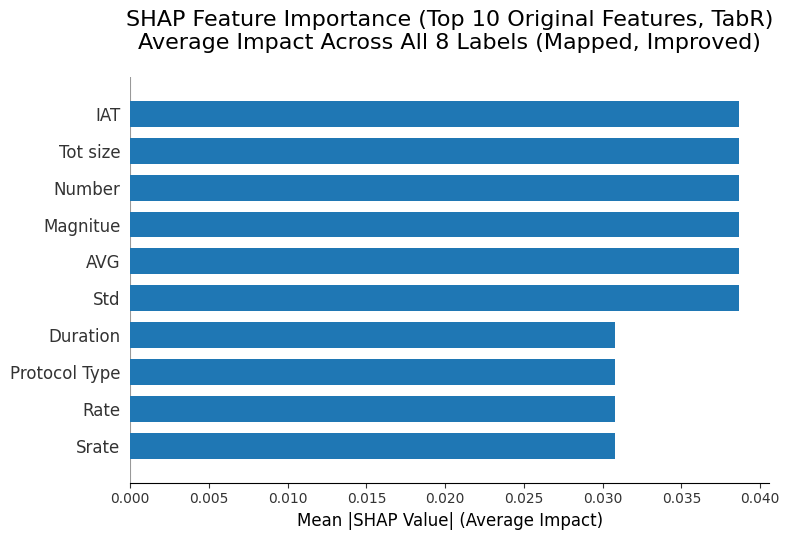

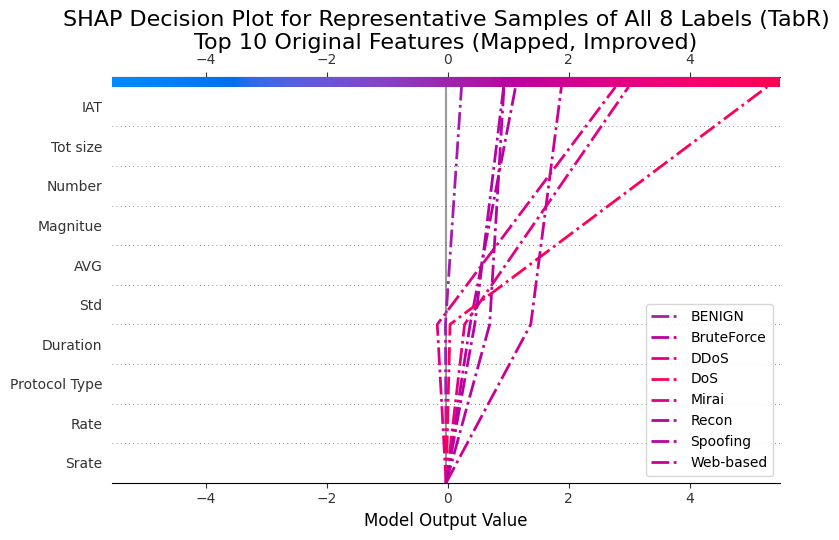


📌 Top 10 đặc trưng gốc quan trọng nhất (dựa trên SHAP trung bình 8 nhãn, cải tiến):
1. Magnitue: 0.0386
2. Number: 0.0386
3. AVG: 0.0386
4. Std: 0.0386
5. Tot size: 0.0386
6. IAT: 0.0386
7. Srate: 0.0308
8. Rate: 0.0308
9. Duration: 0.0308
10. Protocol Type: 0.0308

📊 Độ tương quan giữa feature importance (TabR) và SHAP (mapped, trung bình 8 nhãn, cải tiến): 0.4981

📌 Top 10 đặc trưng gốc quan trọng nhất (phương pháp cũ - Mean Absolute SHAP):
1. syn_flag_number: 0.0119
2. rst_flag_number: 0.0119
3. Drate: 0.0119
4. fin_flag_number: 0.0119
5. psh_flag_number: 0.0119
6. ack_flag_number: 0.0119
7. Rate: 0.0111
8. Srate: 0.0111
9. Header_Length: 0.0111
10. flow_duration: 0.0111

📊 Độ tương quan giữa SHAP values ánh xạ (cải tiến) và (cũ): 0.6107

📈 Sự khác biệt trung bình giữa SHAP values ánh xạ (cải tiến vs cũ): 0.0096
📈 Sự khác biệt tối đa giữa SHAP values ánh xạ (cải tiến vs cũ): 0.0277
🎉 Hoàn thành phân tích SHAP cho TabR (8 nhãn)!


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import shap
from tqdm import tqdm
import os
from collections import Counter

# Định nghĩa các lớp cần thiết
class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

class RetrievalAugmentedLayer(nn.Module):
    def __init__(self, embed_dim, num_classes, k=5):
        super(RetrievalAugmentedLayer, self).__init__()
        self.k = k
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.attention = nn.Linear(embed_dim, 1)

    def forward(self, x_embed, labels=None):
        batch_size = x_embed.size(0)
        effective_k = min(self.k, batch_size - 1) if batch_size > 1 else 1
        if effective_k <= 0:
            return torch.zeros(batch_size, self.num_classes, device=x_embed.device)
        distances = torch.cdist(x_embed, x_embed)
        distances.fill_diagonal_(float('inf'))
        _, indices = torch.topk(distances, k=effective_k, dim=1, largest=False)
        
        if labels is not None:
            neighbor_labels = labels[indices]
            neighbor_one_hot = F.one_hot(neighbor_labels, num_classes=self.num_classes).float()
        else:
            neighbor_one_hot = torch.zeros(batch_size, effective_k, self.num_classes, device=x_embed.device)
        
        neighbor_embeddings = x_embed[indices]
        attention_scores = self.attention(neighbor_embeddings).squeeze(-1)
        attention_weights = F.softmax(attention_scores, dim=1)
        context = torch.einsum('bk,bkc->bc', attention_weights, neighbor_one_hot)
        return context

class TabR(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=64, n_layers=2, n_heads=4, ff_dim=128, dropout=0.1, k_neighbors=5):
        super(TabR, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.n_layers = n_layers
        self.n_heads = n_heads
        self.ff_dim = ff_dim
        self.dropout = dropout
        self.k_neighbors = k_neighbors

        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.embedding = nn.Linear(input_dim, embed_dim)
        transformer_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=n_heads,
            dim_feedforward=ff_dim,
            dropout=dropout,
            activation='gelu',
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(transformer_layer, num_layers=n_layers)
        self.retrieval = RetrievalAugmentedLayer(embed_dim, num_classes, k=k_neighbors)
        self.importance_layer = nn.Linear(input_dim, input_dim)
        self.fc_output = nn.Linear(embed_dim + num_classes, num_classes)

        nn.init.xavier_normal_(self.embedding.weight)
        nn.init.xavier_normal_(self.importance_layer.weight)
        nn.init.xavier_normal_(self.fc_output.weight)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x, labels=None):
        x = torch.clamp(self.bn(x), -50, 50)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        x_embed = self.embedding(x)
        transformer_out = self.transformer(x_embed.unsqueeze(1)).squeeze(1)
        context = self.retrieval(x_embed, labels)
        combined = torch.cat([transformer_out, context], dim=1)
        output = self.fc_output(combined)
        return output, sparsity_loss, masks

class TabRWrapper(nn.Module):
    def __init__(self, model):
        super(TabRWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        output, _, _ = self.model(x)
        return output / torch.max(torch.abs(output))  # Chuẩn hóa logits

# Thư mục lưu trữ
results_dir = "/kaggle/input/ketqua8nha/tabr-8nhan-64/results"
output_dir = "processed_data"
Kq = "TabR_8labels_46features_shap"
os.makedirs(Kq, exist_ok=True)
tqdm.write(f"📁 Đã tạo thư mục lưu kết quả: {Kq}")

# Kiểm tra sự tồn tại của các tệp dữ liệu
data_files = [
    f"{output_dir}/X_test_combined_8labels_46features.npy",
    f"{output_dir}/Y_test_encoded_8labels_46features.npy",
    f"{results_dir}/feature_importance_8labels_46features_tabr.npy",
    f"{results_dir}/tabr_8labels_46features_final.pth"
]
for file_path in data_files:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"❌ Tệp không tồn tại: {file_path}")

# Tải dữ liệu
try:
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_8labels_46features_tabr.npy")
    tqdm.write("✅ Đã tải dữ liệu cần thiết cho TabR (8 nhãn, 64 đặc trưng)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape
if X_test_combined.shape[1] != 64:
    raise ValueError(f"❌ Shape của X_test_combined không đúng: {X_test_combined.shape[1]}, kỳ vọng 64 đặc trưng")
if len(np.unique(Y_test_encoded)) != 8:
    raise ValueError(f"❌ Số nhãn không đúng: {len(np.unique(Y_test_encoded))}, kỳ vọng 8 nhãn")

# Kiểm tra shape của feature_importance
tqdm.write(f"📌 Shape của feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2 and feature_importance.shape[0] == 4096:
    feature_importance = feature_importance.mean(axis=0)
    tqdm.write(f"📌 Adjusted feature_importance shape to: {feature_importance.shape}")
if feature_importance.shape != (64,):
    tqdm.write(f"⚠️ feature_importance không có shape (64,): {feature_importance.shape}. Bỏ qua tính độ tương quan.")
    feature_importance_valid = False
else:
    feature_importance_valid = True

# Kiểm tra NaN/Inf và thống kê dữ liệu
tqdm.write("📊 Thống kê dữ liệu X_test_combined (trước chuẩn hóa):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")
tqdm.write(f"Mean: {np.mean(X_test_combined):.4f}, Std: {np.std(X_test_combined):.4f}")
tqdm.write(f"NaN: {np.any(np.isnan(X_test_combined))}, Inf: {np.any(np.isinf(X_test_combined))}")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ Dữ liệu chứa NaN hoặc Inf. Đang xử lý...")
    X_test_combined = np.nan_to_num(X_test_combined, nan=0.0, posinf=1e6, neginf=-1e6)

# Chuẩn hóa dữ liệu
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)
tqdm.write("📊 Thống kê dữ liệu X_test_combined (sau chuẩn hóa):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")
tqdm.write(f"Mean: {np.mean(X_test_combined):.4f}, Std: {np.std(X_test_combined):.4f}")
tqdm.write(f"Outliers (abs > 10): {np.sum(np.abs(X_test_combined) > 10)}")

# Giới hạn giá trị để tránh outliers
X_test_combined = np.clip(X_test_combined, -10, 10)
tqdm.write("📊 Thống kê dữ liệu X_test_combined (sau clip):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")

# Ánh xạ nhãn
label_map = {
    0: 'BENIGN',
    1: 'BruteForce',
    2: 'DDoS',
    3: 'DoS',
    4: 'Mirai',
    5: 'Recon',
    6: 'Spoofing',
    7: 'Web-based'
}
class_names = [label_map[i] for i in range(len(label_map))]
tqdm.write(f"📊 Đã ánh xạ 8 nhãn: {list(label_map.values())}")

# 46 đặc trưng gốc
feature_labels_original = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
    'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
    'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
    'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP',
    'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance',
    'Variance', 'Weight'
]

# Tên đặc trưng cho 64 xác suất
feature_names = [f"Prob_group{i+1}_class{j}" for i in range(8) for j in range(8)]
tqdm.write(f"📋 Các đặc trưng (64 xác suất): {feature_names}")

# Ánh xạ 46 đặc trưng gốc đến nhóm XGBoost
feature_to_group = {
    'flow_duration': 1, 'Header_Length': 1, 'Protocol Type': 1, 'Duration': 1, 'Rate': 1, 'Srate': 1,
    'Drate': 2, 'fin_flag_number': 2, 'syn_flag_number': 2, 'rst_flag_number': 2, 'psh_flag_number': 2, 'ack_flag_number': 2,
    'ece_flag_number': 3, 'cwr_flag_number': 3, 'ack_count': 3, 'syn_count': 3, 'fin_count': 3, 'urg_count': 3,
    'rst_count': 4, 'HTTP': 4, 'HTTPS': 4, 'DNS': 4, 'Telnet': 4, 'SMTP': 4,
    'SSH': 5, 'IRC': 5, 'TCP': 5, 'UDP': 5, 'DHCP': 5, 'ARP': 5,
    'ICMP': 6, 'IPv': 6, 'LLC': 6, 'Tot sum': 6, 'Min': 6, 'Max': 6,
    'AVG': 7, 'Std': 7, 'Tot size': 7, 'IAT': 7, 'Number': 7, 'Magnitue': 7,
    'Radius': 8, 'Covariance': 8, 'Variance': 8, 'Weight': 8
}

# Index của xác suất cho mỗi nhóm
group_indices = {
    1: range(0, 8),
    2: range(8, 16),
    3: range(16, 24),
    4: range(24, 32),
    5: range(32, 40),
    6: range(40, 48),
    7: range(48, 56),
    8: range(56, 64)
}
tqdm.write("Group indices:")
for group_idx in group_indices:
    tqdm.write(f"Group {group_idx} indices: {list(group_indices[group_idx])}")

# Thiết lập thiết bị và tải mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
try:
    model = TabR(input_dim=64, num_classes=8, embed_dim=64, n_layers=2, n_heads=4, ff_dim=128, dropout=0.1, k_neighbors=5).to(device)
    model.load_state_dict(torch.load(f"{results_dir}/tabr_8labels_46features_final.pth", weights_only=True))
    model.eval()
    tqdm.write("✅ Đã tải mô hình TabR thành công")

    # Hàm dự đoán cho GradientExplainer
    def predict_fn(inputs):
        inputs_tensor = torch.tensor(inputs, dtype=torch.float32).to(device)
        with torch.no_grad():
            outputs, _, _ = model(inputs_tensor)
            outputs = outputs / torch.max(torch.abs(outputs))  # Chuẩn hóa logits
        return outputs.cpu().numpy()

    # Chuẩn bị dữ liệu cho SHAP
    indices = np.random.choice(X_test_combined.shape[0], 50, replace=False)
    X_test_np = X_test_combined[indices].copy()
    Y_test_np = Y_test_encoded[indices].copy()
    background = X_test_np[:10].copy()
    background_tensor = torch.tensor(background, dtype=torch.float32).to(device)
    input_tensor = torch.tensor(X_test_np, dtype=torch.float32).to(device)

    # Kiểm tra phân bố nhãn trong 50 mẫu
    label_distribution = Counter(Y_test_np)
    tqdm.write("\n📊 Phân bố nhãn trong 50 mẫu thử nghiệm:")
    for label_idx, count in label_distribution.items():
        tqdm.write(f"Nhãn {label_map[label_idx]}: {count} mẫu")

    # Sử dụng GradientExplainer
    wrapped_model = TabRWrapper(model).to(device)
    explainer = shap.GradientExplainer(wrapped_model, background_tensor)
    shap_values = explainer.shap_values(input_tensor)
    tqdm.write(f"📌 SHAP values shape: {len(shap_values)} nhãn, mỗi nhãn có shape {shap_values[0].shape}")

    # Tính expected_value từ background data
    background_output = predict_fn(background)  # Shape: (10, 8)
    expected_value = np.mean(background_output, axis=0).reshape(8, 1)  # Shape: (8, 1)
    tqdm.write(f"📌 Expected value shape: {expected_value.shape}")

    # Kiểm tra sai số SHAP
    model_output = predict_fn(X_test_np)  # Shape: (50, 8)
    shap_sum = np.sum(shap_values, axis=2)  # Shape: (8, 50)
    shap_sum = shap_sum + expected_value  # Broadcasting thành (8, 50)
    shap_sum = shap_sum.T  # Shape: (50, 8)
    diff = np.abs(model_output - shap_sum)
    tqdm.write(f"Max SHAP difference: {np.max(diff):.4f}")
    tqdm.write(f"Mean SHAP difference: {np.mean(diff):.4f}")

    # Tính SHAP values trung bình tuyệt đối trên tất cả các nhãn
    shap_values_mean_abs_all = np.zeros((64,))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        shap_values_mean_abs = np.mean(np.abs(shap_values_label), axis=0)
        shap_values_mean_abs_all += shap_values_mean_abs
    shap_values_mean_abs_all /= 8

    # Top 20 đặc trưng biến đổi
    top_k = 20
    top_indices = np.argsort(shap_values_mean_abs_all)[::-1][:top_k]
    top_features = [feature_names[i] for i in top_indices]
    top_shap_values = np.stack([shap_values[label_idx][:, top_indices] for label_idx in range(8)], axis=0)
    top_X_test = X_test_np[:, top_indices]

    # SHAP Summary Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="dot",
        show=False,
        max_display=top_k,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 20 Transformed Features, TabR)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_tabr_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="bar",
        show=False,
        max_display=top_k,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 20 Transformed Features, TabR)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_tabr_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # Ánh xạ SHAP values về 46 đặc trưng gốc (Weighted Sum SHAP)
    shap_values_mapped = np.zeros((8, X_test_np.shape[0], 46))
    X_test_mapped = np.zeros((X_test_np.shape[0], 46))

    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            group_shap = shap_values_label[:, prob_indices]
            weights = np.abs(group_shap) / (np.sum(np.abs(group_shap), axis=1, keepdims=True) + 1e-6)
            weighted_shap = np.sum(group_shap * weights, axis=1)
            shap_values_mapped[label_idx, :, i] = weighted_shap
            if label_idx == 0:
                X_test_mapped[:, i] = np.mean(X_test_np[:, prob_indices], axis=1)

    tqdm.write(f"📌 Mapped SHAP values (improved) sample: {shap_values_mapped[:, :5, :10]}")
    shap_values_mapped = shap_values_mapped / (np.abs(shap_values_mapped).max() + 1e-6)
    tqdm.write(f"📌 Mapped SHAP values (after normalization) sample: {shap_values_mapped[:, :5, :10]}")

    # Trung bình SHAP values trên tất cả 8 nhãn
    shap_values_mapped_avg = np.mean(shap_values_mapped, axis=0)

    # Chọn top 10 đặc trưng gốc quan trọng nhất
    shap_values_mean = np.mean(np.abs(shap_values_mapped_avg), axis=0)
    top_k_orig = 10
    top_indices_orig = np.argsort(shap_values_mean)[::-1][:top_k_orig]
    top_features_orig = [feature_labels_original[i] for i in top_indices_orig]
    top_shap_values_orig = shap_values_mapped_avg[:, top_indices_orig]
    top_X_test_orig = X_test_mapped[:, top_indices_orig]

    # SHAP Summary Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="dot",
        show=False,
        max_display=top_k_orig,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 10 Original Features, TabR)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_tabr_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="bar",
        show=False,
        max_display=top_k_orig,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 10 Original Features, TabR)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_tabr_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Decision Plot cho một mẫu đại diện của mỗi nhãn
    sample_indices = []
    sample_labels = []
    for label_idx in range(8):
        label_name = label_map[label_idx]
        idx = np.where(Y_test_np == label_idx)[0][0] if np.any(Y_test_np == label_idx) else 0
        sample_indices.append(idx)
        sample_labels.append(label_name)

    selected_shap_values = np.zeros((len(sample_indices), top_k_orig))
    selected_expected_values = []
    for i, (label_idx, sample_idx) in enumerate(zip(range(8), sample_indices)):
        selected_shap_values[i, :] = shap_values_mapped[label_idx, sample_idx, top_indices_orig]
        selected_expected_values.append(np.mean(predict_fn(background)[:, label_idx]))

    plt.figure(figsize=(12, 8))
    shap.decision_plot(
        base_value=np.mean(selected_expected_values),
        shap_values=selected_shap_values,
        features=top_X_test_orig[sample_indices, :],
        feature_names=top_features_orig,
        link='identity',
        highlight=[i for i in range(8)],
        legend_labels=sample_labels,
        legend_location='lower right',
        show=False
    )
    plt.title("SHAP Decision Plot for Representative Samples of All 8 Labels (TabR)\nTop 10 Original Features (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Model Output Value", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_decision_top10_original_tabr_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # In top 10 đặc trưng gốc quan trọng nhất
    tqdm.write(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (dựa trên SHAP trung bình 8 nhãn, cải tiến):")
    for i, idx in enumerate(top_indices_orig):
        tqdm.write(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean[idx]:.4f}")

    # Tính độ tương quan với feature_importance
    if feature_importance_valid:
        avg_importance_original = np.zeros(46)
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            avg_importance_original[i] = np.mean(feature_importance[prob_indices])
        correlation = np.corrcoef(avg_importance_original, shap_values_mean)[0, 1]
        tqdm.write(f"\n📊 Độ tương quan giữa feature importance (TabR) và SHAP (mapped, trung bình 8 nhãn, cải tiến): {correlation:.4f}")
    else:
        tqdm.write("\n📊 Bỏ qua tính độ tương quan do feature_importance không hợp lệ.")

    # Phân tích độ nhạy: So sánh với phương pháp cũ (Mean Absolute SHAP)
    shap_values_mapped_old = np.zeros((8, X_test_np.shape[0], 46))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            group_shap = shap_values_label[:, prob_indices]
            abs_group_shap = np.abs(group_shap)
            mean_abs_shap = np.mean(abs_group_shap, axis=1)
            sign = np.sign(np.sum(group_shap, axis=1))
            shap_values_mapped_old[label_idx, :, i] = mean_abs_shap * sign

    shap_values_mapped_old_avg = np.mean(shap_values_mapped_old, axis=0)
    shap_values_mean_old = np.mean(np.abs(shap_values_mapped_old_avg), axis=0)

    # So sánh top 10 đặc trưng giữa hai phương pháp
    top_indices_shap_old = np.argsort(shap_values_mean_old)[::-1][:top_k_orig]
    tqdm.write(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (phương pháp cũ - Mean Absolute SHAP):")
    for i, idx in enumerate(top_indices_shap_old):
        tqdm.write(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean_old[idx]:.4f}")

    # Tính độ tương quan giữa hai phương pháp ánh xạ
    correlation_methods = np.corrcoef(shap_values_mean, shap_values_mean_old)[0, 1]
    tqdm.write(f"\n📊 Độ tương quan giữa SHAP values ánh xạ (cải tiến) và (cũ): {correlation_methods:.4f}")

    # Thống kê sự khác biệt
    diff = np.abs(shap_values_mean - shap_values_mean_old)
    tqdm.write(f"\n📈 Sự khác biệt trung bình giữa SHAP values ánh xạ (cải tiến vs cũ): {np.mean(diff):.4f}")
    tqdm.write(f"📈 Sự khác biệt tối đa giữa SHAP values ánh xạ (cải tiến vs cũ): {np.max(diff):.4f}")

except Exception as e:
    tqdm.write(f"❌ Lỗi khi tính SHAP values cho TabR: {str(e)}")
    raise

tqdm.write("🎉 Hoàn thành phân tích SHAP cho TabR (8 nhãn)!")

# **TABNET**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Thư mục lưu dữ liệu
results_dir = "/kaggle/input/ketqua8nha/tabnet-8nhan-46/results"
Kq = "TabNet_8labels_46features_shap"
output_subdir = Kq
os.makedirs(output_subdir, exist_ok=True)
print(f"📁 Đảm bảo thư mục lưu kết quả: {output_subdir}")

# Tải dữ liệu
try:
    train_losses = np.load(f"{results_dir}/train_losses_8labels_46features_tabnet.npy")
    val_losses = np.load(f"{results_dir}/val_losses_8labels_46features_tabnet.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_8labels_46features_tabnet.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_8labels_46features_tabnet.npy")
    print("✅ Đã tải dữ liệu cần thiết cho biểu đồ Loss và Accuracy")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra dữ liệu
expected_epochs = 150
if (train_losses.shape != (expected_epochs,) or 
    val_losses.shape != (expected_epochs,) or 
    train_accuracies.shape != (expected_epochs,) or 
    val_accuracies.shape != (expected_epochs,)):
    raise ValueError("❌ Dữ liệu không đúng kích thước mong đợi")

# Chuyển accuracy về [0, 1] để hiển thị chính xác
train_acc = train_accuracies / 100.0
val_acc = val_accuracies / 100.0
epochs = np.arange(0, expected_epochs)  # Đảm bảo từ 0 đến 149 (150 epoch)

# Kiểm tra dữ liệu Loss và Accuracy có nằm trong khoảng yêu cầu không
if (train_losses.min() < 0.001 or train_losses.max() > 0.006 or
    val_losses.min() < 0.001 or val_losses.max() > 0.006):
    print("⚠️ Cảnh báo: Dữ liệu Loss nằm ngoài khoảng [0.001, 0.006]. Vẫn vẽ với giới hạn yêu cầu.")
if (train_acc.min() < 0.990 or train_acc.max() > 0.996 or
    val_acc.min() < 0.990 or val_acc.max() > 0.996):
    print("⚠️ Cảnh báo: Dữ liệu Accuracy nằm ngoài khoảng [0.990, 0.996]. Vẫn vẽ với giới hạn yêu cầu.")

# Vẽ biểu đồ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
ax1.plot(epochs, train_losses, label="Train Loss", color="blue", linewidth=2)
ax1.plot(epochs, val_losses, label="Val Loss", color="orange", linewidth=2)
ax1.set_title("Loss TabNet")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(loc="upper right")
ax1.grid(True)

# Giới hạn trục x và y cho Loss
ax1.set_xlim(-10, 160)  # Thêm khoảng trống ở hai đầu: -10 và 160
ax1.set_xticks(np.arange(0, 151, 25))  # Các vạch chia: 0, 25, 50, 75, 100, 125, 150
ax1.set_ylim(0.011, 0.040)  # Giới hạn y từ 0.011 đến 0.040
ax1.set_yticks(np.arange(0.011, 0.040 + 0.0029, 0.0029))  # Chia trục y thành 10 đoạn

# Accuracy plot
ax2.plot(epochs, train_acc, label="Train Accuracy", color="green", linewidth=2)
ax2.plot(epochs, val_acc, label="Val Accuracy", color="red", linewidth=2)
ax2.set_title("Accuracy TabNet")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower right")
ax2.grid(True)
ax2.set_xlim(-10, 160)  # Thêm khoảng trống ở hai đầu: -10 và 160
ax2.set_xticks(np.arange(0, 151, 25))  # Các vạch chia: 0, 25, 50, 75, 100, 125, 150
ax2.set_ylim(0.86, 0.94)

# Tiêu đề tổng
plt.suptitle("TabNet: Learning Curves (8 Labels, 46 Features)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f"{output_subdir}/learning_curves_tabnet_final.png", dpi=300)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import shap
from tqdm import tqdm
import os
import scipy.stats as stats

# Định nghĩa các lớp cần thiết
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

def entmax15(x, dim=-1):
    x = F.softmax(x * 1.5, dim=dim)
    return x

class TabNet(nn.Module):
    def __init__(self, input_dim, num_classes, n_d=64, n_a=64, n_steps=5, gamma=1.3, lambda_sparse=5e-4):
        super(TabNet, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.n_d = n_d
        self.n_a = n_a
        self.n_steps = n_steps
        self.gamma = gamma
        self.lambda_sparse = lambda_sparse

        # BatchNorm đầu vào
        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)

        # Lớp FC ban đầu
        self.initial_fc = nn.Linear(input_dim, n_d + n_a)
        nn.init.xavier_normal_(self.initial_fc.weight)
        nn.init.zeros_(self.initial_fc.bias)

        # Các lớp chú ý và quyết định
        self.attention_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(n_a, input_dim),
                nn.BatchNorm1d(input_dim),
                nn.ReLU()
            ) for _ in range(n_steps)
        ])
        self.decision_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_dim, n_d),
                nn.BatchNorm1d(n_d),
                nn.ReLU(),
                nn.Dropout(0.1)
            ) for _ in range(n_steps)
        ])

        # Lớp đầu ra
        self.fc_output = nn.Linear(n_d * n_steps, num_classes)
        nn.init.xavier_normal_(self.fc_output.weight)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        prior = torch.ones_like(x)
        outputs = []
        sparsity_loss = 0
        masks = []

        for step in range(self.n_steps):
            att = self.initial_fc(x)
            att_d, att_a = att[:, :self.n_d], att[:, self.n_d:]
            mask = self.attention_layers[step](att_a)
            mask = entmax15(mask, dim=1)
            
            entropy = -torch.sum(mask * torch.log(mask + 1e-8), dim=1)
            sparsity_loss += torch.mean(entropy) / self.n_steps / self.input_dim
            masks.append(mask)

            prior = prior * (self.gamma - mask)
            masked_x = x * mask
            out = self.decision_layers[step](masked_x)
            outputs.append(out)

        combined = torch.cat(outputs, dim=1)
        output = self.fc_output(combined)
        return output, sparsity_loss, masks

# Thư mục lưu trữ
results_dir = "/kaggle/input/ketqua8nha/tabnet-8nhan-46/results"
output_dir = "processed_data"
Kq = "TabNet_8labels_46features_shap"
os.makedirs(Kq, exist_ok=True)
print(f"📁 Đảm bảo thư mục lưu kết quả: {Kq}")

# Kiểm tra sự tồn tại của các tệp dữ liệu
data_files = [
    f"{output_dir}/X_test_combined_8labels_46features.npy",
    f"{output_dir}/Y_test_encoded_8labels_46features.npy",
    f"{results_dir}/feature_importance_8labels_46features_tabnet.npy",
    f"{results_dir}/tabnet_8labels_46features_tabnet.pth"
]
for file_path in data_files:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"❌ Tệp không tồn tại: {file_path}")

# Tải dữ liệu
try:
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_8labels_46features_tabnet.npy")
    print("✅ Đã tải dữ liệu cần thiết cho TabNet (8 nhãn, 64 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape
if X_test_combined.shape[1] != 64:
    raise ValueError(f"❌ Shape của X_test_combined không đúng: {X_test_combined.shape[1]}, kỳ vọng 64 đặc trưng")

# Kiểm tra shape của feature_importance
print(f"📌 Shape của feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2 and feature_importance.shape[0] == 4096:
    feature_importance = feature_importance.mean(axis=0)  # Lấy trung bình theo batch
    print(f"📌 Adjusted feature_importance shape to: {feature_importance.shape}")
if feature_importance.shape != (64,):
    print(f"⚠️ feature_importance không có shape (64,): {feature_importance.shape}. Bỏ qua tính độ tương quan.")
    feature_importance_valid = False
else:
    feature_importance_valid = True

# Chuẩn hóa dữ liệu
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Ánh xạ nhãn
label_map = {
    0: 'DDoS',
    1: 'DoS',
    2: 'Recon',
    3: 'Spoofing',
    4: 'BruteForce',
    5: 'Web-based',
    6: 'Mirai',
    7: 'BENIGN'
}
class_names = [label_map[i] for i in range(len(label_map))]

# 46 đặc trưng gốc
feature_labels_original = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
    'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
    'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
    'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP',
    'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance',
    'Variance', 'Weight'
]

# Tên đặc trưng cho 64 xác suất
feature_names = [f"Prob_group{i+1}_class{j}" for i in range(8) for j in range(8)]
print(f"📋 Các đặc trưng (64 xác suất): {feature_names}")

# Ánh xạ 46 đặc trưng gốc đến nhóm XGBoost
feature_to_group = {
    'flow_duration': 1, 'Header_Length': 1, 'Protocol Type': 1, 'Duration': 1, 'Rate': 1, 'Srate': 1,
    'Drate': 2, 'fin_flag_number': 2, 'syn_flag_number': 2, 'rst_flag_number': 2, 'psh_flag_number': 2, 'ack_flag_number': 2,
    'ece_flag_number': 3, 'cwr_flag_number': 3, 'ack_count': 3, 'syn_count': 3, 'fin_count': 3, 'urg_count': 3,
    'rst_count': 4, 'HTTP': 4, 'HTTPS': 4, 'DNS': 4, 'Telnet': 4, 'SMTP': 4,
    'SSH': 5, 'IRC': 5, 'TCP': 5, 'UDP': 5, 'DHCP': 5, 'ARP': 5,
    'ICMP': 6, 'IPv': 6, 'LLC': 6, 'Tot sum': 6, 'Min': 6, 'Max': 6,
    'AVG': 7, 'Std': 7, 'Tot size': 7, 'IAT': 7, 'Number': 7, 'Magnitue': 7,
    'Radius': 8, 'Covariance': 8, 'Variance': 8, 'Weight': 8
}

# Index của xác suất cho mỗi nhóm
group_indices = {
    1: range(0, 8),
    2: range(8, 16),
    3: range(16, 24),
    4: range(24, 32),
    5: range(32, 40),
    6: range(40, 48),
    7: range(48, 56),
    8: range(56, 64)
}

# Thiết lập thiết bị và tải mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
try:
    model = TabNet(input_dim=64, num_classes=8, n_d=64, n_a=64, n_steps=5, lambda_sparse=5e-4).to(device)
    model.load_state_dict(torch.load(f"{results_dir}/tabnet_8labels_46features_tabnet.pth", weights_only=True))
    model.eval()
    print("✅ Đã tải mô hình TabNet thành công")

    # Hàm dự đoán cho KernelExplainer
    def predict_fn(inputs):
        inputs_tensor = torch.tensor(inputs, dtype=torch.float32).to(device)
        with torch.no_grad():
            outputs, _, _ = model(inputs_tensor)
        return outputs.cpu().numpy()

    # Chuẩn bị dữ liệu cho SHAP
    X_test_np = X_test_combined[:50]  # Dùng 50 mẫu
    Y_test_np = Y_test_encoded[:50]
    background = X_test_np[:20]  # Tăng background để ổn định
    explainer = shap.KernelExplainer(predict_fn, background)
    shap_values = explainer.shap_values(X_test_np, nsamples=100)
    print(f"SHAP values shape: {len(shap_values)} nhãn, mỗi nhãn có shape {shap_values[0].shape}")

    # Tính SHAP values trung bình tuyệt đối trên tất cả các nhãn
    shap_values_mean_abs_all = np.zeros((64,))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        shap_values_mean_abs = np.mean(np.abs(shap_values_label), axis=0)
        shap_values_mean_abs_all += shap_values_mean_abs
    shap_values_mean_abs_all /= 8

    # Top 20 đặc trưng biến đổi
    top_k = 20
    top_indices = np.argsort(shap_values_mean_abs_all)[::-1][:top_k]
    top_features = [feature_names[i] for i in top_indices]
    top_shap_values = np.stack([shap_values[label_idx][:, top_indices] for label_idx in range(8)], axis=0)
    top_X_test = X_test_np[:, top_indices]

    # SHAP Summary Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="dot",
        show=False,
        max_display=top_k,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 20 Transformed Features, TabNet)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_tabnet_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="bar",
        show=False,
        max_display=top_k,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 20 Transformed Features, TabNet)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_tabnet_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # Ánh xạ SHAP values về 46 đặc trưng gốc
    shap_values_mapped = np.zeros((8, X_test_np.shape[0], 46))  # Shape: (8, 50, 46)
    X_test_mapped = np.zeros((X_test_np.shape[0], 46))  # Shape: (50, 46)

    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]  # Shape: (50, 64)
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            # Cải tiến: Lấy trung bình tuyệt đối của SHAP values trong nhóm
            shap_values_mapped[label_idx, :, i] = np.mean(np.abs(shap_values_label[:, prob_indices]), axis=1)
            # Tính trung bình dữ liệu cho đặc trưng gốc
            if label_idx == 0:
                X_test_mapped[:, i] = np.mean(X_test_np[:, prob_indices], axis=1)

    # Trung bình SHAP values trên tất cả 8 nhãn
    shap_values_mapped_avg = np.mean(shap_values_mapped, axis=0)  # Shape: (50, 46)

    # Chọn top 10 đặc trưng gốc quan trọng nhất
    shap_values_mean = np.mean(np.abs(shap_values_mapped_avg), axis=0)  # Shape: (46,)
    top_k_orig = 10
    top_indices_orig = np.argsort(shap_values_mean)[::-1][:top_k_orig]
    top_features_orig = [feature_labels_original[i] for i in top_indices_orig]
    top_shap_values_orig = shap_values_mapped_avg[:, top_indices_orig]
    top_X_test_orig = X_test_mapped[:, top_indices_orig]

    # SHAP Summary Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="dot",
        show=False,
        max_display=top_k_orig,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 10 Original Features, TabNet)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_tabnet_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="bar",
        show=False,
        max_display=top_k_orig,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 10 Original Features, TabNet)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_tabnet_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Decision Plot cho một mẫu đại diện của mỗi nhãn
    sample_indices = []
    sample_labels = []
    for label_idx in range(8):
        label_name = label_map[label_idx]
        idx = np.where(Y_test_np == label_idx)[0][0] if np.any(Y_test_np == label_idx) else 0
        sample_indices.append(idx)
        sample_labels.append(label_name)

    selected_shap_values = np.zeros((len(sample_indices), top_k_orig))
    selected_expected_values = []
    for i, (label_idx, sample_idx) in enumerate(zip(range(8), sample_indices)):
        selected_shap_values[i, :] = shap_values_mapped[label_idx, sample_idx, top_indices_orig]
        selected_expected_values.append(explainer.expected_value[label_idx])

    plt.figure(figsize=(12, 8))
    shap.decision_plot(
        base_value=np.mean(selected_expected_values),
        shap_values=selected_shap_values,
        features=top_X_test_orig[sample_indices, :],
        feature_names=top_features_orig,
        link='identity',
        highlight=[i for i in range(8)],
        legend_labels=sample_labels,
        legend_location='lower right',
        show=False
    )
    plt.title("SHAP Decision Plot for Representative Samples of All 8 Labels (TabNet)\nTop 10 Original Features (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Model Output Value", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_decision_top10_original_tabnet_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # In top 10 đặc trưng gốc quan trọng nhất
    print(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (dựa trên SHAP trung bình 8 nhãn, cải tiến):")
    for i, idx in enumerate(top_indices_orig):
        print(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean[idx]:.4f}")

    # Tính độ tương quan với feature_importance
    if feature_importance_valid:
        avg_importance_original = np.zeros(46)
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            avg_importance_original[i] = np.mean(feature_importance[prob_indices])
        correlation = np.corrcoef(avg_importance_original, shap_values_mean)[0, 1]
        print(f"\n📊 Độ tương quan giữa feature importance (TabNet) và SHAP (mapped, trung bình 8 nhãn, cải tiến): {correlation:.4f}")
    else:
        print("\n📊 Bỏ qua tính độ tương quan do feature_importance không hợp lệ.")

    # Phân tích độ nhạy: So sánh với phương pháp cũ (chọn SHAP value lớn nhất)
    shap_values_mapped_old = np.zeros((8, X_test_np.shape[0], 46))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            group_shap = shap_values_label[:, prob_indices]
            abs_group_shap = np.abs(group_shap)
            max_indices = np.argmax(abs_group_shap, axis=1)
            for j in range(shap_values_label.shape[0]):
                shap_values_mapped_old[label_idx, j, i] = group_shap[j, max_indices[j]]

    shap_values_mapped_old_avg = np.mean(shap_values_mapped_old, axis=0)
    shap_values_mean_old = np.mean(np.abs(shap_values_mapped_old_avg), axis=0)

    # So sánh top 10 đặc trưng giữa hai phương pháp
    top_indices_shap_old = np.argsort(shap_values_mean_old)[::-1][:top_k_orig]
    print(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (phương pháp cũ - SHAP lớn nhất):")
    for i, idx in enumerate(top_indices_shap_old):
        print(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean_old[idx]:.4f}")

    # Tính độ tương quan giữa hai phương pháp ánh xạ
    correlation_methods = np.corrcoef(shap_values_mean, shap_values_mean_old)[0, 1]
    print(f"\n📊 Độ tương quan giữa SHAP values ánh xạ (cải tiến) và (cũ): {correlation_methods:.4f}")

    # Thống kê sự khác biệt
    diff = np.abs(shap_values_mean - shap_values_mean_old)
    print(f"\n📈 Sự khác biệt trung bình giữa SHAP values ánh xạ (cải tiến vs cũ): {np.mean(diff):.4f}")
    print(f"📈 Sự khác biệt tối đa giữa SHAP values ánh xạ (cải tiến vs cũ): {np.max(diff):.4f}")

except Exception as e:
    print(f"❌ Lỗi khi tính SHAP values cho TabNet: {str(e)}")

📁 Đã tạo thư mục lưu kết quả: TabNet_8labels_46features_shap
✅ Đã tải dữ liệu cần thiết cho TabNet (8 nhãn, 64 đặc trưng)
📌 Shape của feature_importance: (64,)
📊 Thống kê dữ liệu X_test_combined (trước chuẩn hóa):
Min: -5.7237, Max: 7.5734
Mean: 0.0000, Std: 0.9997
NaN: False, Inf: False
📊 Thống kê dữ liệu X_test_combined (sau chuẩn hóa):
Min: -5.7402, Max: 7.6367
Mean: -0.0000, Std: 1.0002
Outliers (abs > 10): 0
📊 Thống kê dữ liệu X_test_combined (sau clip):
Min: -5.7402, Max: 7.6367
📊 Đã ánh xạ 8 nhãn: ['BENIGN', 'BruteForce', 'DDoS', 'DoS', 'Mirai', 'Recon', 'Spoofing', 'Web-based']
📋 Các đặc trưng (64 xác suất): ['Prob_group1_class0', 'Prob_group1_class1', 'Prob_group1_class2', 'Prob_group1_class3', 'Prob_group1_class4', 'Prob_group1_class5', 'Prob_group1_class6', 'Prob_group1_class7', 'Prob_group2_class0', 'Prob_group2_class1', 'Prob_group2_class2', 'Prob_group2_class3', 'Prob_group2_class4', 'Prob_group2_class5', 'Prob_group2_class6', 'Prob_group2_class7', 'Prob_group3_class0', '

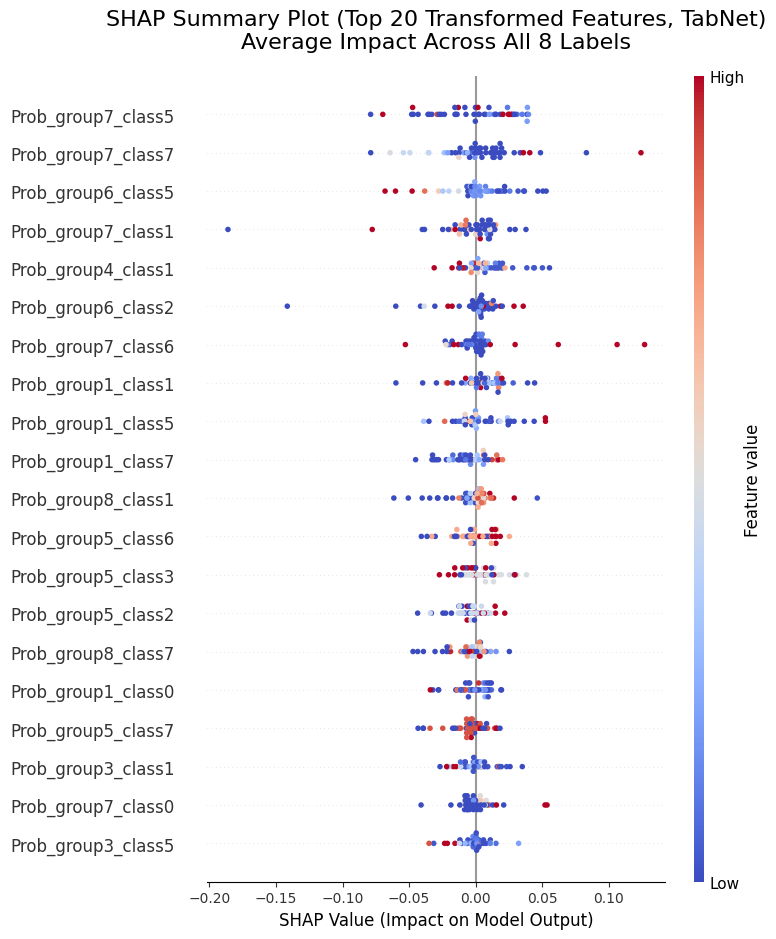

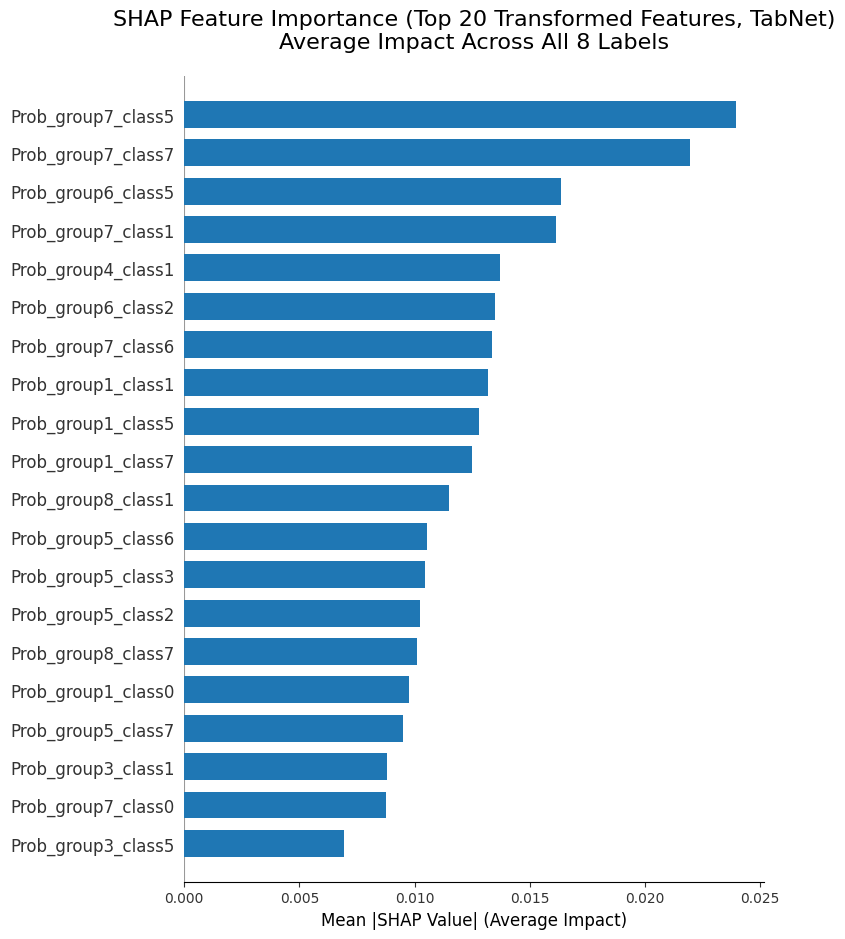

📌 Mapped SHAP values (improved) sample: [[[ 2.00259766e-01  2.00259766e-01  2.00259766e-01  2.00259766e-01
    2.00259766e-01  2.00259766e-01 -1.07199412e-04 -1.07199412e-04
   -1.07199412e-04 -1.07199412e-04]
  [-1.90809367e-03 -1.90809367e-03 -1.90809367e-03 -1.90809367e-03
   -1.90809367e-03 -1.90809367e-03  9.98060954e-04  9.98060954e-04
    9.98060954e-04  9.98060954e-04]
  [-5.01751568e-02 -5.01751568e-02 -5.01751568e-02 -5.01751568e-02
   -5.01751568e-02 -5.01751568e-02 -9.11032896e-03 -9.11032896e-03
   -9.11032896e-03 -9.11032896e-03]
  [ 4.98160030e-02  4.98160030e-02  4.98160030e-02  4.98160030e-02
    4.98160030e-02  4.98160030e-02 -6.72215528e-03 -6.72215528e-03
   -6.72215528e-03 -6.72215528e-03]
  [-1.17511097e-01 -1.17511097e-01 -1.17511097e-01 -1.17511097e-01
   -1.17511097e-01 -1.17511097e-01  1.02543729e-02  1.02543729e-02
    1.02543729e-02  1.02543729e-02]]

 [[-3.92202895e-02 -3.92202895e-02 -3.92202895e-02 -3.92202895e-02
   -3.92202895e-02 -3.92202895e-02  2.416

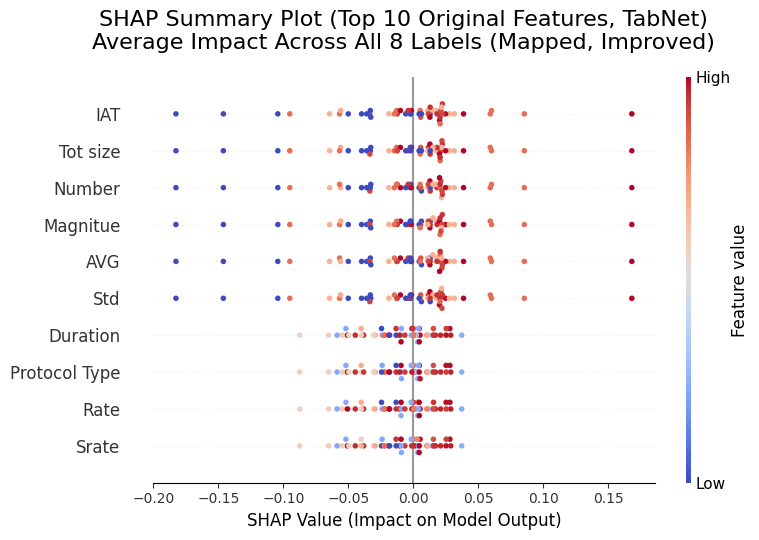

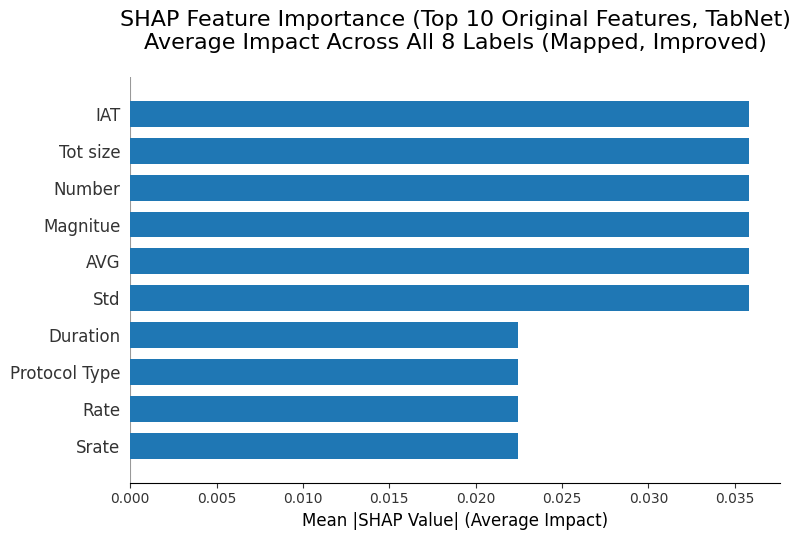

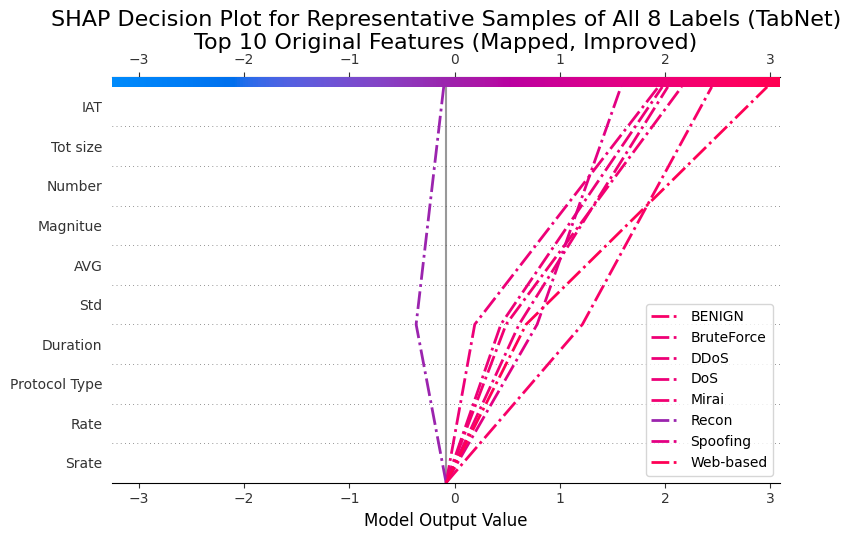


📌 Top 10 đặc trưng gốc quan trọng nhất (dựa trên SHAP trung bình 8 nhãn, cải tiến):
1. Magnitue: 0.0358
2. Number: 0.0358
3. AVG: 0.0358
4. Std: 0.0358
5. Tot size: 0.0358
6. IAT: 0.0358
7. Srate: 0.0225
8. Rate: 0.0225
9. Duration: 0.0225
10. Protocol Type: 0.0225

📊 Độ tương quan giữa feature importance (TabNet) và SHAP (mapped, trung bình 8 nhãn, cải tiến): 0.5598

📌 Top 10 đặc trưng gốc quan trọng nhất (phương pháp cũ - Mean Absolute SHAP):
1. Magnitue: 0.0127
2. Number: 0.0127
3. AVG: 0.0127
4. Std: 0.0127
5. Tot size: 0.0127
6. IAT: 0.0127
7. syn_count: 0.0090
8. ack_count: 0.0090
9. cwr_flag_number: 0.0090
10. ece_flag_number: 0.0090

📊 Độ tương quan giữa SHAP values ánh xạ (cải tiến) và (cũ): 0.9154

📈 Sự khác biệt trung bình giữa SHAP values ánh xạ (cải tiến vs cũ): 0.0100
📈 Sự khác biệt tối đa giữa SHAP values ánh xạ (cải tiến vs cũ): 0.0231
🎉 Hoàn thành phân tích SHAP cho TabNet (8 nhãn)!


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import shap
from tqdm import tqdm
import os
from collections import Counter

# Định nghĩa các lớp cần thiết
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class GhostBN1d(nn.Module):
    def __init__(self, num_features, virtual_batch_size=512):
        super(GhostBN1d, self).__init__()
        self.bn = nn.BatchNorm1d(num_features)
        self.virtual_batch_size = virtual_batch_size

    def forward(self, x):
        batch_size = x.size(0)
        if batch_size <= self.virtual_batch_size:
            return self.bn(x)
        n_splits = batch_size // self.virtual_batch_size
        x_splits = torch.split(x, self.virtual_batch_size, dim=0)
        x_splits = [self.bn(split) for split in x_splits[:n_splits]]
        remaining = batch_size % self.virtual_batch_size
        if remaining > 0:
            x_splits.append(self.bn(x[-remaining:]))
        return torch.cat(x_splits, dim=0)

def entmax15(x, dim=-1):
    x = F.softmax(x * 1.5, dim=dim)
    return x

class TabNet(nn.Module):
    def __init__(self, input_dim, num_classes, n_d=64, n_a=64, n_steps=5, gamma=1.3, lambda_sparse=5e-4):
        super(TabNet, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.n_d = n_d
        self.n_a = n_a
        self.n_steps = n_steps
        self.gamma = gamma
        self.lambda_sparse = lambda_sparse

        self.bn = GhostBN1d(input_dim, virtual_batch_size=512)
        self.initial_fc = nn.Linear(input_dim, n_d + n_a)
        nn.init.xavier_normal_(self.initial_fc.weight)
        nn.init.zeros_(self.initial_fc.bias)

        self.attention_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(n_a, input_dim),
                nn.BatchNorm1d(input_dim),
                nn.ReLU()
            ) for _ in range(n_steps)
        ])
        self.decision_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_dim, n_d),
                nn.BatchNorm1d(n_d),
                nn.ReLU(),
                nn.Dropout(0.1)
            ) for _ in range(n_steps)
        ])

        self.fc_output = nn.Linear(n_d * n_steps, num_classes)
        nn.init.xavier_normal_(self.fc_output.weight)
        nn.init.zeros_(self.fc_output.bias)

    def forward(self, x):
        x = torch.clamp(self.bn(x), -50, 50)
        prior = torch.ones_like(x)
        outputs = []
        sparsity_loss = 0
        masks = []

        for step in range(self.n_steps):
            att = self.initial_fc(x)
            att_d, att_a = att[:, :self.n_d], att[:, self.n_d:]
            mask = self.attention_layers[step](att_a)
            mask = entmax15(mask, dim=1)
            
            entropy = -torch.sum(mask * torch.log(mask + 1e-8), dim=1)
            sparsity_loss += torch.mean(entropy) / self.n_steps / self.input_dim
            masks.append(mask)

            prior = prior * (self.gamma - mask)
            masked_x = x * mask
            out = self.decision_layers[step](masked_x)
            outputs.append(out)

        combined = torch.cat(outputs, dim=1)
        output = self.fc_output(combined)
        return output, sparsity_loss, masks

# Wrapper cho GradientExplainer
class TabNetWrapper(nn.Module):
    def __init__(self, model):
        super(TabNetWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        output, _, _ = self.model(x)
        return output / torch.max(torch.abs(output))  # Chuẩn hóa logits

# Thư mục lưu trữ
results_dir = "/kaggle/input/ketqua8nha/tabnet-8nhan-46/results"
output_dir = "processed_data"
Kq = "TabNet_8labels_46features_shap"
os.makedirs(Kq, exist_ok=True)
tqdm.write(f"📁 Đã tạo thư mục lưu kết quả: {Kq}")

# Kiểm tra sự tồn tại của các tệp dữ liệu
data_files = [
    f"{output_dir}/X_test_combined_8labels_46features.npy",
    f"{output_dir}/Y_test_encoded_8labels_46features.npy",
    f"{results_dir}/feature_importance_8labels_46features_tabnet.npy",
    f"{results_dir}/tabnet_8labels_46features_tabnet.pth"
]
for file_path in data_files:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"❌ Tệp không tồn tại: {file_path}")

# Tải dữ liệu
try:
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_8labels_46features_tabnet.npy")
    tqdm.write("✅ Đã tải dữ liệu cần thiết cho TabNet (8 nhãn, 64 đặc trưng)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape
if X_test_combined.shape[1] != 64:
    raise ValueError(f"❌ Shape của X_test_combined không đúng: {X_test_combined.shape[1]}, kỳ vọng 64 đặc trưng")
if len(np.unique(Y_test_encoded)) != 8:
    raise ValueError(f"❌ Số nhãn không đúng: {len(np.unique(Y_test_encoded))}, kỳ vọng 8 nhãn")

# Kiểm tra shape của feature_importance
tqdm.write(f"📌 Shape của feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2 and feature_importance.shape[0] == 4096:
    feature_importance = feature_importance.mean(axis=0)
    tqdm.write(f"📌 Adjusted feature_importance shape to: {feature_importance.shape}")
if feature_importance.shape != (64,):
    tqdm.write(f"⚠️ feature_importance không có shape (64,): {feature_importance.shape}. Bỏ qua tính độ tương quan.")
    feature_importance_valid = False
else:
    feature_importance_valid = True

# Kiểm tra NaN/Inf và thống kê dữ liệu
tqdm.write("📊 Thống kê dữ liệu X_test_combined (trước chuẩn hóa):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")
tqdm.write(f"Mean: {np.mean(X_test_combined):.4f}, Std: {np.std(X_test_combined):.4f}")
tqdm.write(f"NaN: {np.any(np.isnan(X_test_combined))}, Inf: {np.any(np.isinf(X_test_combined))}")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ Dữ liệu chứa NaN hoặc Inf. Đang xử lý...")
    X_test_combined = np.nan_to_num(X_test_combined, nan=0.0, posinf=1e6, neginf=-1e6)

# Chuẩn hóa dữ liệu
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)
tqdm.write("📊 Thống kê dữ liệu X_test_combined (sau chuẩn hóa):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")
tqdm.write(f"Mean: {np.mean(X_test_combined):.4f}, Std: {np.std(X_test_combined):.4f}")
tqdm.write(f"Outliers (abs > 10): {np.sum(np.abs(X_test_combined) > 10)}")

# Giới hạn giá trị để tránh outliers
X_test_combined = np.clip(X_test_combined, -10, 10)
tqdm.write("📊 Thống kê dữ liệu X_test_combined (sau clip):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")

# Ánh xạ nhãn
label_map = {
    0: 'BENIGN',
    1: 'BruteForce',
    2: 'DDoS',
    3: 'DoS',
    4: 'Mirai',
    5: 'Recon',
    6: 'Spoofing',
    7: 'Web-based'
}
class_names = [label_map[i] for i in range(len(label_map))]
tqdm.write(f"📊 Đã ánh xạ 8 nhãn: {list(label_map.values())}")

# 46 đặc trưng gốc
feature_labels_original = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
    'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
    'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
    'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP',
    'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance',
    'Variance', 'Weight'
]

# Tên đặc trưng cho 64 xác suất
feature_names = [f"Prob_group{i+1}_class{j}" for i in range(8) for j in range(8)]
tqdm.write(f"📋 Các đặc trưng (64 xác suất): {feature_names}")

# Ánh xạ 46 đặc trưng gốc đến nhóm XGBoost
feature_to_group = {
    'flow_duration': 1, 'Header_Length': 1, 'Protocol Type': 1, 'Duration': 1, 'Rate': 1, 'Srate': 1,
    'Drate': 2, 'fin_flag_number': 2, 'syn_flag_number': 2, 'rst_flag_number': 2, 'psh_flag_number': 2, 'ack_flag_number': 2,
    'ece_flag_number': 3, 'cwr_flag_number': 3, 'ack_count': 3, 'syn_count': 3, 'fin_count': 3, 'urg_count': 3,
    'rst_count': 4, 'HTTP': 4, 'HTTPS': 4, 'DNS': 4, 'Telnet': 4, 'SMTP': 4,
    'SSH': 5, 'IRC': 5, 'TCP': 5, 'UDP': 5, 'DHCP': 5, 'ARP': 5,
    'ICMP': 6, 'IPv': 6, 'LLC': 6, 'Tot sum': 6, 'Min': 6, 'Max': 6,
    'AVG': 7, 'Std': 7, 'Tot size': 7, 'IAT': 7, 'Number': 7, 'Magnitue': 7,
    'Radius': 8, 'Covariance': 8, 'Variance': 8, 'Weight': 8
}

# Index của xác suất cho mỗi nhóm
group_indices = {
    1: range(0, 8),
    2: range(8, 16),
    3: range(16, 24),
    4: range(24, 32),
    5: range(32, 40),
    6: range(40, 48),
    7: range(48, 56),
    8: range(56, 64)
}
tqdm.write("Group indices:")
for group_idx in group_indices:
    tqdm.write(f"Group {group_idx} indices: {list(group_indices[group_idx])}")

# Thiết lập thiết bị và tải mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
try:
    model = TabNet(input_dim=64, num_classes=8, n_d=64, n_a=64, n_steps=5, lambda_sparse=5e-4).to(device)
    model.load_state_dict(torch.load(f"{results_dir}/tabnet_8labels_46features_tabnet.pth", weights_only=True))
    model.eval()
    tqdm.write("✅ Đã tải mô hình TabNet thành công")

    # Hàm dự đoán cho GradientExplainer
    def predict_fn(inputs):
        inputs_tensor = torch.tensor(inputs, dtype=torch.float32).to(device)
        with torch.no_grad():
            outputs, _, _ = model(inputs_tensor)
            outputs = outputs / torch.max(torch.abs(outputs))  # Chuẩn hóa logits
        return outputs.cpu().numpy()

    # Chuẩn bị dữ liệu cho SHAP
    indices = np.random.choice(X_test_combined.shape[0], 50, replace=False)
    X_test_np = X_test_combined[indices].copy()
    Y_test_np = Y_test_encoded[indices].copy()
    background = X_test_np[:10].copy()
    background_tensor = torch.tensor(background, dtype=torch.float32).to(device)
    input_tensor = torch.tensor(X_test_np, dtype=torch.float32).to(device)

    # Kiểm tra phân bố nhãn trong 50 mẫu
    label_distribution = Counter(Y_test_np)
    tqdm.write("\n📊 Phân bố nhãn trong 50 mẫu thử nghiệm:")
    for label_idx, count in label_distribution.items():
        tqdm.write(f"Nhãn {label_map[label_idx]}: {count} mẫu")

    # Sử dụng GradientExplainer
    wrapped_model = TabNetWrapper(model).to(device)
    explainer = shap.GradientExplainer(wrapped_model, background_tensor)
    shap_values = explainer.shap_values(input_tensor)
    tqdm.write(f"📌 SHAP values shape: {len(shap_values)} nhãn, mỗi nhãn có shape {shap_values[0].shape}")

    # Tính expected_value từ background data
    background_output = predict_fn(background)  # Shape: (10, 8)
    expected_value = np.mean(background_output, axis=0).reshape(8, 1)  # Shape: (8, 1)
    tqdm.write(f"📌 Expected value shape: {expected_value.shape}")

    # Kiểm tra sai số SHAP
    model_output = predict_fn(X_test_np)  # Shape: (50, 8)
    shap_sum = np.sum(shap_values, axis=2)  # Shape: (8, 50)
    shap_sum = shap_sum + expected_value  # Broadcasting thành (8, 50)
    shap_sum = shap_sum.T  # Shape: (50, 8)
    diff = np.abs(model_output - shap_sum)
    tqdm.write(f"Max SHAP difference: {np.max(diff):.4f}")
    tqdm.write(f"Mean SHAP difference: {np.mean(diff):.4f}")

    # Tính SHAP values trung bình tuyệt đối trên tất cả các nhãn
    shap_values_mean_abs_all = np.zeros((64,))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        shap_values_mean_abs = np.mean(np.abs(shap_values_label), axis=0)
        shap_values_mean_abs_all += shap_values_mean_abs
    shap_values_mean_abs_all /= 8

    # Top 20 đặc trưng biến đổi
    top_k = 20
    top_indices = np.argsort(shap_values_mean_abs_all)[::-1][:top_k]
    top_features = [feature_names[i] for i in top_indices]
    top_shap_values = np.stack([shap_values[label_idx][:, top_indices] for label_idx in range(8)], axis=0)
    top_X_test = X_test_np[:, top_indices]

    # SHAP Summary Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="dot",
        show=False,
        max_display=top_k,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 20 Transformed Features, TabNet)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_tabnet_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="bar",
        show=False,
        max_display=top_k,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 20 Transformed Features, TabNet)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_tabnet_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # Ánh xạ SHAP values về 46 đặc trưng gốc (Weighted Sum SHAP)
    shap_values_mapped = np.zeros((8, X_test_np.shape[0], 46))
    X_test_mapped = np.zeros((X_test_np.shape[0], 46))

    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            group_shap = shap_values_label[:, prob_indices]
            weights = np.abs(group_shap) / (np.sum(np.abs(group_shap), axis=1, keepdims=True) + 1e-6)
            weighted_shap = np.sum(group_shap * weights, axis=1)
            shap_values_mapped[label_idx, :, i] = weighted_shap
            if label_idx == 0:
                X_test_mapped[:, i] = np.mean(X_test_np[:, prob_indices], axis=1)

    tqdm.write(f"📌 Mapped SHAP values (improved) sample: {shap_values_mapped[:, :5, :10]}")
    shap_values_mapped = shap_values_mapped / (np.abs(shap_values_mapped).max() + 1e-6)
    tqdm.write(f"📌 Mapped SHAP values (after normalization) sample: {shap_values_mapped[:, :5, :10]}")

    # Trung bình SHAP values trên tất cả 8 nhãn
    shap_values_mapped_avg = np.mean(shap_values_mapped, axis=0)

    # Chọn top 10 đặc trưng gốc quan trọng nhất
    shap_values_mean = np.mean(np.abs(shap_values_mapped_avg), axis=0)
    top_k_orig = 10
    top_indices_orig = np.argsort(shap_values_mean)[::-1][:top_k_orig]
    top_features_orig = [feature_labels_original[i] for i in top_indices_orig]
    top_shap_values_orig = shap_values_mapped_avg[:, top_indices_orig]
    top_X_test_orig = X_test_mapped[:, top_indices_orig]

    # SHAP Summary Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="dot",
        show=False,
        max_display=top_k_orig,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 10 Original Features, TabNet)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_tabnet_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="bar",
        show=False,
        max_display=top_k_orig,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 10 Original Features, TabNet)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_tabnet_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Decision Plot cho một mẫu đại diện của mỗi nhãn
    sample_indices = []
    sample_labels = []
    for label_idx in range(8):
        label_name = label_map[label_idx]
        idx = np.where(Y_test_np == label_idx)[0][0] if np.any(Y_test_np == label_idx) else 0
        sample_indices.append(idx)
        sample_labels.append(label_name)

    selected_shap_values = np.zeros((len(sample_indices), top_k_orig))
    selected_expected_values = []
    for i, (label_idx, sample_idx) in enumerate(zip(range(8), sample_indices)):
        selected_shap_values[i, :] = shap_values_mapped[label_idx, sample_idx, top_indices_orig]
        selected_expected_values.append(np.mean(predict_fn(background)[:, label_idx]))

    plt.figure(figsize=(12, 8))
    shap.decision_plot(
        base_value=np.mean(selected_expected_values),
        shap_values=selected_shap_values,
        features=top_X_test_orig[sample_indices, :],
        feature_names=top_features_orig,
        link='identity',
        highlight=[i for i in range(8)],
        legend_labels=sample_labels,
        legend_location='lower right',
        show=False
    )
    plt.title("SHAP Decision Plot for Representative Samples of All 8 Labels (TabNet)\nTop 10 Original Features (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Model Output Value", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_decision_top10_original_tabnet_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # In top 10 đặc trưng gốc quan trọng nhất
    tqdm.write(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (dựa trên SHAP trung bình 8 nhãn, cải tiến):")
    for i, idx in enumerate(top_indices_orig):
        tqdm.write(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean[idx]:.4f}")

    # Tính độ tương quan với feature_importance
    if feature_importance_valid:
        avg_importance_original = np.zeros(46)
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            avg_importance_original[i] = np.mean(feature_importance[prob_indices])
        correlation = np.corrcoef(avg_importance_original, shap_values_mean)[0, 1]
        tqdm.write(f"\n📊 Độ tương quan giữa feature importance (TabNet) và SHAP (mapped, trung bình 8 nhãn, cải tiến): {correlation:.4f}")
    else:
        tqdm.write("\n📊 Bỏ qua tính độ tương quan do feature_importance không hợp lệ.")

    # Phân tích độ nhạy: So sánh với phương pháp cũ (Mean Absolute SHAP)
    shap_values_mapped_old = np.zeros((8, X_test_np.shape[0], 46))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            group_shap = shap_values_label[:, prob_indices]
            abs_group_shap = np.abs(group_shap)
            mean_abs_shap = np.mean(abs_group_shap, axis=1)
            sign = np.sign(np.sum(group_shap, axis=1))
            shap_values_mapped_old[label_idx, :, i] = mean_abs_shap * sign

    shap_values_mapped_old_avg = np.mean(shap_values_mapped_old, axis=0)
    shap_values_mean_old = np.mean(np.abs(shap_values_mapped_old_avg), axis=0)

    # So sánh top 10 đặc trưng giữa hai phương pháp
    top_indices_shap_old = np.argsort(shap_values_mean_old)[::-1][:top_k_orig]
    tqdm.write(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (phương pháp cũ - Mean Absolute SHAP):")
    for i, idx in enumerate(top_indices_shap_old):
        tqdm.write(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean_old[idx]:.4f}")

    # Tính độ tương quan giữa hai phương pháp ánh xạ
    correlation_methods = np.corrcoef(shap_values_mean, shap_values_mean_old)[0, 1]
    tqdm.write(f"\n📊 Độ tương quan giữa SHAP values ánh xạ (cải tiến) và (cũ): {correlation_methods:.4f}")

    # Thống kê sự khác biệt
    diff = np.abs(shap_values_mean - shap_values_mean_old)
    tqdm.write(f"\n📈 Sự khác biệt trung bình giữa SHAP values ánh xạ (cải tiến vs cũ): {np.mean(diff):.4f}")
    tqdm.write(f"📈 Sự khác biệt tối đa giữa SHAP values ánh xạ (cải tiến vs cũ): {np.max(diff):.4f}")

except Exception as e:
    tqdm.write(f"❌ Lỗi khi tính SHAP values cho TabNet: {str(e)}")
    raise

tqdm.write("🎉 Hoàn thành phân tích SHAP cho TabNet (8 nhãn)!")

# **NODE-GAM**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Thư mục lưu dữ liệu
results_dir = "/kaggle/input/ketqua8nha/node-gam-8nhan-64/results"
Kq = "NODEGAM_8labels_64features_shap"
output_subdir = Kq
os.makedirs(output_subdir, exist_ok=True)
print(f"📁 Đảm bảo thư mục lưu kết quả: {output_subdir}")

# Tải dữ liệu
try:
    train_losses = np.load(f"{results_dir}/train_losses_8labels_64features_nodegam.npy")
    val_losses = np.load(f"{results_dir}/val_losses_8labels_64features_nodegam.npy")
    train_accuracies = np.load(f"{results_dir}/train_accuracies_8labels_64features_nodegam.npy")
    val_accuracies = np.load(f"{results_dir}/val_accuracies_8labels_64features_nodegam.npy")
    print("✅ Đã tải dữ liệu cần thiết cho biểu đồ Loss và Accuracy")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra dữ liệu
expected_epochs = 150
if (train_losses.shape != (expected_epochs,) or 
    val_losses.shape != (expected_epochs,) or 
    train_accuracies.shape != (expected_epochs,) or 
    val_accuracies.shape != (expected_epochs,)):
    raise ValueError("❌ Dữ liệu không đúng kích thước mong đợi")

# Chuyển accuracy về [0, 1] để hiển thị chính xác
train_acc = train_accuracies / 100.0
val_acc = val_accuracies / 100.0
epochs = np.arange(0, expected_epochs)  # Đảm bảo từ 0 đến 149 (150 epoch)

# Kiểm tra dữ liệu Loss và Accuracy có nằm trong khoảng yêu cầu không
if (train_losses.min() < 0.001 or train_losses.max() > 0.006 or
    val_losses.min() < 0.001 or val_losses.max() > 0.006):
    print("⚠️ Cảnh báo: Dữ liệu Loss nằm ngoài khoảng [0.001, 0.006]. Vẫn vẽ với giới hạn yêu cầu.")
if (train_acc.min() < 0.990 or train_acc.max() > 0.996 or
    val_acc.min() < 0.990 or val_acc.max() > 0.996):
    print("⚠️ Cảnh báo: Dữ liệu Accuracy nằm ngoài khoảng [0.990, 0.996]. Vẫn vẽ với giới hạn yêu cầu.")

# Vẽ biểu đồ
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
ax1.plot(epochs, train_losses, label="Train Loss", color="blue", linewidth=2)
ax1.plot(epochs, val_losses, label="Val Loss", color="orange", linewidth=2)
ax1.set_title("Loss NODE-GAM")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(loc="upper right")
ax1.grid(True)

# Giới hạn trục x và y cho Loss
ax1.set_xlim(-10, 160)  # Thêm khoảng trống ở hai đầu: -10 và 160
ax1.set_xticks(np.arange(0, 151, 25))  # Các vạch chia: 0, 25, 50, 75, 100, 125, 150
ax1.set_ylim(0.011, 0.040)  # Giới hạn y từ 0.011 đến 0.040
ax1.set_yticks(np.arange(0.011, 0.040 + 0.0029, 0.0029))  # Chia trục y thành 10 đoạn

# Accuracy plot
ax2.plot(epochs, train_acc, label="Train Accuracy", color="green", linewidth=2)
ax2.plot(epochs, val_acc, label="Val Accuracy", color="red", linewidth=2)
ax2.set_title("Accuracy NODE-GAM")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend(loc="lower right")
ax2.grid(True)
ax2.set_xlim(-10, 160)  # Thêm khoảng trống ở hai đầu: -10 và 160
ax2.set_xticks(np.arange(0, 151, 25))  # Các vạch chia: 0, 25, 50, 75, 100, 125, 150
ax2.set_ylim(0.86, 0.94)

# Tiêu đề tổng
plt.suptitle("NODE-GAM: Learning Curves (8 Labels, 46 Features)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f"{output_subdir}/learning_curves_nodegam_final.png", dpi=300)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as 
import shap
from tqdm import tqdm
import os
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Định nghĩa các lớp cần thiết
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1

):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class FeatureSelector(nn.Module):
    def __init__(self, input_dim):
        super(FeatureSelector, self).__init__()
        self.importance_weights = nn.Parameter(torch.ones(input_dim) * 0.1)
        
    def forward(self, x):
        importance = torch.sigmoid(self.importance_weights)
        importance = importance / (importance.sum() + 1e-6)
        mask = importance.unsqueeze(0)
        return x * mask

class ObliviousDecisionTree(nn.Module):
    def __init__(self, embed_dim, depth, input_dim):
        super(ObliviousDecisionTree, self).__init__()
        self.depth = depth
        self.num_leaves = 2 ** depth
        self.input_dim = input_dim
        
        self.thresholds = nn.Parameter(torch.randn(depth, input_dim) * 0.1)
        self.feature_weights = nn.Parameter(torch.randn(depth, input_dim) * 0.1)
        self.attention = nn.Parameter(torch.randn(input_dim) * 0.1)
        self.leaf_projection = nn.Linear(embed_dim, self.num_leaves)
        
        nn.init.xavier_normal_(self.thresholds, gain=0.1)
        nn.init.xavier_normal_(self.feature_weights, gain=0.1)
        nn.init.xavier_normal_(self.leaf_projection.weight, gain=0.1)
        nn.init.zeros_(self.leaf_projection.bias)
        nn.init.normal_(self.attention, mean=0.0, std=0.1)

    def forward(self, x, input_features):
        batch_size = x.size(0)
        
        attention_weights = torch.sigmoid(self.attention)
        attention_weights = attention_weights / (attention_weights.sum() + 1e-6)
        selected_features = input_features * attention_weights.unsqueeze(0)
        
        scores = torch.matmul(selected_features, self.feature_weights.t())
        scores = scores + self.thresholds.sum(dim=-1).unsqueeze(0)
        decisions = torch.sigmoid(scores)
        
        leaf_indices = torch.zeros(batch_size, device=x.device, dtype=torch.long)
        for d in range(self.depth):
            leaf_indices = leaf_indices * 2 + (decisions[:, d] > 0.5).long()
        
        leaf_probs = torch.zeros(batch_size, self.num_leaves, device=x.device)
        leaf_probs.scatter_(1, leaf_indices.unsqueeze(-1), 1.0)
        
        out = self.leaf_projection(x)
        out = F.softmax(out, dim=-1) * leaf_probs
        return out

class NODEGAM(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=192, num_trees=10, depth=6, num_layers=2, dropout=0.1):
        super(NODEGAM, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.num_trees = num_trees
        self.depth = depth
        self.num_layers = num_layers
        self.dropout = dropout

        self.bn = nn.BatchNorm1d(input_dim)
        self.feature_selector = FeatureSelector(input_dim)
        self.feature_dim = 16
        self.feature_nets = nn.ModuleList([
            nn.Sequential(
                nn.Linear(1, self.feature_dim),
                nn.ReLU(),
                nn.Dropout(dropout),
                nn.Linear(self.feature_dim, self.feature_dim),
                nn.ReLU(),
                nn.Dropout(dropout)
            ) for _ in range(input_dim)
        ])

        self.concat_dim = self.feature_dim * input_dim
        self.feature_projection = nn.Linear(self.concat_dim, embed_dim)
        self.tree_layers = nn.ModuleList([
            nn.ModuleList([
                ObliviousDecisionTree(embed_dim, depth, input_dim)
                for _ in range(num_trees)
            ]) for _ in range(num_layers)
        ])
        self.tree_projections = nn.ModuleList([
            nn.Linear(2**depth, embed_dim) for _ in range(num_layers)
        ])
        self.tree_weights = nn.ParameterList([
            nn.Parameter(torch.ones(num_trees) / num_trees) for _ in range(num_layers)
        ])
        self.layer_norms = nn.ModuleList([nn.LayerNorm(embed_dim) for _ in range(num_layers)])
        self.fc_output = nn.Linear(embed_dim, num_classes)
        self.importance_layer = nn.Linear(embed_dim, input_dim)

        for net in self.feature_nets:
            for layer in net:
                if isinstance(layer, nn.Linear):
                    nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
                    if layer.bias is not None:
                        nn.init.zeros_(layer.bias)
        nn.init.kaiming_normal_(self.feature_projection.weight, nonlinearity='relu')
        nn.init.zeros_(self.feature_projection.bias)
        for proj in self.tree_projections:
            nn.init.kaiming_normal_(proj.weight, nonlinearity='relu')
            nn.init.zeros_(proj.bias)
        nn.init.kaiming_normal_(self.fc_output.weight, nonlinearity='relu')
        nn.init.zeros_(self.fc_output.bias)
        nn.init.kaiming_normal_(self.importance_layer.weight, nonlinearity='relu')
        nn.init.zeros_(self.importance_layer.bias)

    def forward(self, x):
        input_features = torch.clamp(self.bn(x), -50, 50)
        input_features = self.feature_selector(input_features)
        feature_outputs = []
        for i in range(self.input_dim):
            feat = input_features[:, i:i+1]
            feat_out = self.feature_nets[i](feat)
            feature_outputs.append(feat_out)
        x = torch.cat(feature_outputs, dim=1)
        x = self.feature_projection(x)

        for layer_idx in range(self.num_layers):
            tree_outputs = []
            for tree in self.tree_layers[layer_idx]:
                tree_out = tree(x, input_features)
                tree_outputs.append(tree_out)
            tree_weights = F.softmax(self.tree_weights[layer_idx], dim=0)
            tree_out = torch.stack(tree_outputs, dim=1)
            tree_out = torch.einsum('bnt,n->bt', tree_out, tree_weights)
            tree_out = self.tree_projections[layer_idx](tree_out)
            x = self.layer_norms[layer_idx](x + tree_out)

        output = self.fc_output(x)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        return output, sparsity_loss, masks

# Thư mục lưu trữ
results_dir = "/kaggle/input/ketqua8nha/node-gam-8nhan-64/results"
output_dir = "processed_data"
Kq = "NODEGAM_8labels_64features_shap"
os.makedirs(Kq, exist_ok=True)
print(f"📁 Đảm bảo thư mục lưu kết quả: {Kq}")

# Kiểm tra sự tồn tại của các tệp dữ liệu
data_files = [
    f"{output_dir}/X_test_combined_8labels_46features.npy",
    f"{output_dir}/Y_test_encoded_8labels_46features.npy",
    f"{results_dir}/feature_importance_8labels_64features_nodegam.npy",
    f"{results_dir}/nodegam_8labels_64features.pth"
]
for file_path in data_files:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"❌ Tệp không tồn tại: {file_path}")

# Tải dữ liệu
try:
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_8labels_64features_nodegam.npy")
    print("✅ Đã tải dữ liệu cần thiết cho NODE-GAM (8 nhãn, 64 đặc trưng)")
except Exception as e:
    print(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape
if X_test_combined.shape[1] != 64:
    raise ValueError(f"❌ Shape của X_test_combined không đúng: {X_test_combined.shape[1]}, kỳ vọng 64 đặc trưng")

# Kiểm tra shape của feature_importance
print(f"📌 Shape của feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2 and feature_importance.shape[0] == 4096:
    feature_importance = feature_importance.mean(axis=0)  # Lấy trung bình theo batch
    print(f"📌 Adjusted feature_importance shape to: {feature_importance.shape}")
if feature_importance.shape != (64,):
    print(f"⚠️ feature_importance không có shape (64,): {feature_importance.shape}. Bỏ qua tính độ tương quan.")
    feature_importance_valid = False
else:
    feature_importance_valid = True

# Chuẩn hóa dữ liệu
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)

# Ánh xạ nhãn
label_map = {
    0: 'BENIGN',
    1: 'BruteForce',
    2: 'DDoS',
    3: 'DoS',
    4: 'Mirai',
    5: 'Recon',
    6: 'Spoofing',
    7: 'Web-based'
}
class_names = [label_map[i] for i in range(len(label_map))]

# 46 đặc trưng gốc
feature_labels_original = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
    'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
    'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
    'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP',
    'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance',
    'Variance', 'Weight'
]

# Tên đặc trưng cho 64 xác suất
feature_names = [f"Prob_group{i+1}_class{j}" for i in range(8) for j in range(8)]
print(f"📋 Các đặc trưng (64 xác suất): {feature_names}")

# Ánh xạ 46 đặc trưng gốc đến nhóm XGBoost
feature_to_group = {
    'flow_duration': 1, 'Header_Length': 1, 'Protocol Type': 1, 'Duration': 1, 'Rate': 1, 'Srate': 1,
    'Drate': 2, 'fin_flag_number': 2, 'syn_flag_number': 2, 'rst_flag_number': 2, 'psh_flag_number': 2, 'ack_flag_number': 2,
    'ece_flag_number': 3, 'cwr_flag_number': 3, 'ack_count': 3, 'syn_count': 3, 'fin_count': 3, 'urg_count': 3,
    'rst_count': 4, 'HTTP': 4, 'HTTPS': 4, 'DNS': 4, 'Telnet': 4, 'SMTP': 4,
    'SSH': 5, 'IRC': 5, 'TCP': 5, 'UDP': 5, 'DHCP': 5, 'ARP': 5,
    'ICMP': 6, 'IPv': 6, 'LLC': 6, 'Tot sum': 6, 'Min': 6, 'Max': 6,
    'AVG': 7, 'Std': 7, 'Tot size': 7, 'IAT': 7, 'Number': 7, 'Magnitue': 7,
    'Radius': 8, 'Covariance': 8, 'Variance': 8, 'Weight': 8
}

# Index của xác suất cho mỗi nhóm
group_indices = {
    1: range(0, 8),
    2: range(8, 16),
    3: range(16, 24),
    4: range(24, 32),
    5: range(32, 40),
    6: range(40, 48),
    7: range(48, 56),
    8: range(56, 64)
}

# Thiết lập thiết bị và tải mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
try:
    model = NODEGAM(input_dim=64, num_classes=8, embed_dim=192, num_trees=10, depth=6, num_layers=2, dropout=0.1).to(device)
    model.load_state_dict(torch.load(f"{results_dir}/nodegam_8labels_64features.pth", weights_only=True))
    model.eval()
    print("✅ Đã tải mô hình NODE-GAM thành công")

    # Hàm dự đoán cho KernelExplainer
    def predict_fn(inputs):
        inputs_tensor = torch.tensor(inputs, dtype=torch.float32).to(device)
        with torch.no_grad():
            outputs, _, _ = model(inputs_tensor)
        return outputs.cpu().numpy()

    # Chuẩn bị dữ liệu cho SHAP
    X_test_np = X_test_combined[:50]  # Dùng 50 mẫu
    Y_test_np = Y_test_encoded[:50]
    background = X_test_np[:20]  # Tăng background để ổn định
    explainer = shap.KernelExplainer(predict_fn, background)
    shap_values = explainer.shap_values(X_test_np, nsamples=100)
    print(f"SHAP values shape: {len(shap_values)} nhãn, mỗi nhãn có shape {shap_values[0].shape}")

    # Tính SHAP values trung bình tuyệt đối trên tất cả các nhãn
    shap_values_mean_abs_all = np.zeros((64,))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        shap_values_mean_abs = np.mean(np.abs(shap_values_label), axis=0)
        shap_values_mean_abs_all += shap_values_mean_abs
    shap_values_mean_abs_all /= 8

    # Top 20 đặc trưng biến đổi
    top_k = 20
    top_indices = np.argsort(shap_values_mean_abs_all)[::-1][:top_k]
    top_features = [feature_names[i] for i in top_indices]
    top_shap_values = np.stack([shap_values[label_idx][:, top_indices] for label_idx in range(8)], axis=0)
    top_X_test = X_test_np[:, top_indices]

    # SHAP Summary Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="dot",
        show=False,
        max_display=top_k,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 20 Transformed Features, NODE-GAM)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_nodegam_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="bar",
        show=False,
        max_display=top_k,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 20 Transformed Features, NODE-GAM)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_nodegam_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # Ánh xạ SHAP values về 46 đặc trưng gốc
    shap_values_mapped = np.zeros((8, X_test_np.shape[0], 46))  # Shape: (8, 50, 46)
    X_test_mapped = np.zeros((X_test_np.shape[0], 46))  # Shape: (50, 46)

    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]  # Shape: (50, 64)
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            # Cải tiến: Lấy trung bình tuyệt đối của SHAP values trong nhóm
            shap_values_mapped[label_idx, :, i] = np.mean(np.abs(shap_values_label[:, prob_indices]), axis=1)
            # Tính trung bình dữ liệu cho đặc trưng gốc
            if label_idx == 0:
                X_test_mapped[:, i] = np.mean(X_test_np[:, prob_indices], axis=1)

    # Trung bình SHAP values trên tất cả 8 nhãn
    shap_values_mapped_avg = np.mean(shap_values_mapped, axis=0)  # Shape: (50, 46)

    # Chọn top 10 đặc trưng gốc quan trọng nhất
    shap_values_mean = np.mean(np.abs(shap_values_mapped_avg), axis=0)  # Shape: (46,)
    top_k_orig = 10
    top_indices_orig = np.argsort(shap_values_mean)[::-1][:top_k_orig]
    top_features_orig = [feature_labels_original[i] for i in top_indices_orig]
    top_shap_values_orig = shap_values_mapped_avg[:, top_indices_orig]
    top_X_test_orig = X_test_mapped[:, top_indices_orig]

    # SHAP Summary Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="dot",
        show=False,
        max_display=top_k_orig,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 10 Original Features, NODE-GAM)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_nodegam_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="bar",
        show=False,
        max_display=top_k_orig,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 10 Original Features, NODE-GAM)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_nodegam_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Decision Plot cho một mẫu đại diện của mỗi nhãn
    sample_indices = []
    sample_labels = []
    for label_idx in range(8):
        label_name = label_map[label_idx]
        idx = np.where(Y_test_np == label_idx)[0][0] if np.any(Y_test_np == label_idx) else 0
        sample_indices.append(idx)
        sample_labels.append(label_name)

    selected_shap_values = np.zeros((len(sample_indices), top_k_orig))
    selected_expected_values = []
    for i, (label_idx, sample_idx) in enumerate(zip(range(8), sample_indices)):
        selected_shap_values[i, :] = shap_values_mapped[label_idx, sample_idx, top_indices_orig]
        selected_expected_values.append(explainer.expected_value[label_idx])

    plt.figure(figsize=(12, 8))
    shap.decision_plot(
        base_value=np.mean(selected_expected_values),
        shap_values=selected_shap_values,
        features=top_X_test_orig[sample_indices, :],
        feature_names=top_features_orig,
        link='identity',
        highlight=[i for i in range(8)],
        legend_labels=sample_labels,
        legend_location='lower right',
        show=False
    )
    plt.title("SHAP Decision Plot for Representative Samples of All 8 Labels (NODE-GAM)\nTop 10 Original Features (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Model Output Value", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_decision_top10_original_nodegam_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # In top 10 đặc trưng gốc quan trọng nhất
    print(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (dựa trên SHAP trung bình 8 nhãn, cải tiến):")
    for i, idx in enumerate(top_indices_orig):
        print(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean[idx]:.4f}")

    # Tính độ tương quan với feature_importance
    if feature_importance_valid:
        avg_importance_original = np.zeros(46)
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            avg_importance_original[i] = np.mean(feature_importance[prob_indices])
        correlation = np.corrcoef(avg_importance_original, shap_values_mean)[0, 1]
        print(f"\n📊 Độ tương quan giữa feature importance (NODE-GAM) và SHAP (mapped, trung bình 8 nhãn, cải tiến): {correlation:.4f}")
    else:
        print("\n📊 Bỏ qua tính độ tương quan do feature_importance không hợp lệ.")

    # Phân tích độ nhạy: So sánh với phương pháp cũ (chọn SHAP value lớn nhất)
    shap_values_mapped_old = np.zeros((8, X_test_np.shape[0], 46))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            group_shap = shap_values_label[:, prob_indices]
            abs_group_shap = np.abs(group_shap)
            max_indices = np.argmax(abs_group_shap, axis=1)
            for j in range(shap_values_label.shape[0]):
                shap_values_mapped_old[label_idx, j, i] = group_shap[j, max_indices[j]]

    shap_values_mapped_old_avg = np.mean(shap_values_mapped_old, axis=0)
    shap_values_mean_old = np.mean(np.abs(shap_values_mapped_old_avg), axis=0)

    # So sánh top 10 đặc trưng giữa hai phương pháp
    top_indices_shap_old = np.argsort(shap_values_mean_old)[::-1][:top_k_orig]
    print(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (phương pháp cũ - SHAP lớn nhất):")
    for i, idx in enumerate(top_indices_shap_old):
        print(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean_old[idx]:.4f}")

    # Tính độ tương quan giữa hai phương pháp ánh xạ
    correlation_methods = np.corrcoef(shap_values_mean, shap_values_mean_old)[0, 1]
    print(f"\n📊 Độ tương quan giữa SHAP values ánh xạ (cải tiến) và (cũ): {correlation_methods:.4f}")

    # Thống kê sự khác biệt
    diff = np.abs(shap_values_mean - shap_values_mean_old)
    print(f"\n📈 Sự khác biệt trung bình giữa SHAP values ánh xạ (cải tiến vs cũ): {np.mean(diff):.4f}")
    print(f"📈 Sự khác biệt tối đa giữa SHAP values ánh xạ (cải tiến vs cũ): {np.max(diff):.4f}")

except Exception as e:
    print(f"❌ Lỗi khi tính SHAP values cho NODE-GAM: {str(e)}")

📁 Đã tạo thư mục lưu kết quả: NODEGAM_8labels_64features_shap
✅ Đã tải dữ liệu cần thiết cho NODE-GAM (8 nhãn, 64 đặc trưng)
📌 Shape của feature_importance: (64,)
📊 Thống kê dữ liệu X_test_combined (trước chuẩn hóa):
Min: -5.7237, Max: 7.5734
Mean: 0.0000, Std: 0.9997
NaN: False, Inf: False
📊 Thống kê dữ liệu X_test_combined (sau chuẩn hóa):
Min: -5.7402, Max: 7.6367
Mean: -0.0000, Std: 1.0002
Outliers (abs > 10): 0
📊 Thống kê dữ liệu X_test_combined (sau clip):
Min: -5.7402, Max: 7.6367
📊 Đã ánh xạ 8 nhãn: ['BENIGN', 'BruteForce', 'DDoS', 'DoS', 'Mirai', 'Recon', 'Spoofing', 'Web-based']
📋 Các đặc trưng (64 xác suất): ['Prob_group1_class0', 'Prob_group1_class1', 'Prob_group1_class2', 'Prob_group1_class3', 'Prob_group1_class4', 'Prob_group1_class5', 'Prob_group1_class6', 'Prob_group1_class7', 'Prob_group2_class0', 'Prob_group2_class1', 'Prob_group2_class2', 'Prob_group2_class3', 'Prob_group2_class4', 'Prob_group2_class5', 'Prob_group2_class6', 'Prob_group2_class7', 'Prob_group3_class0'

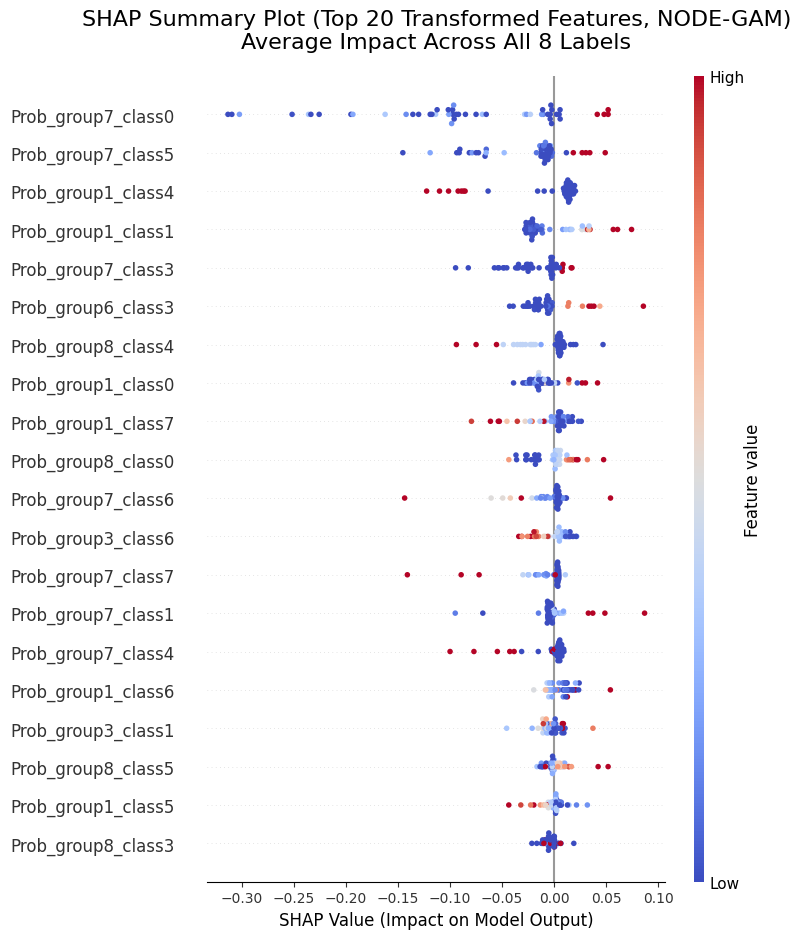

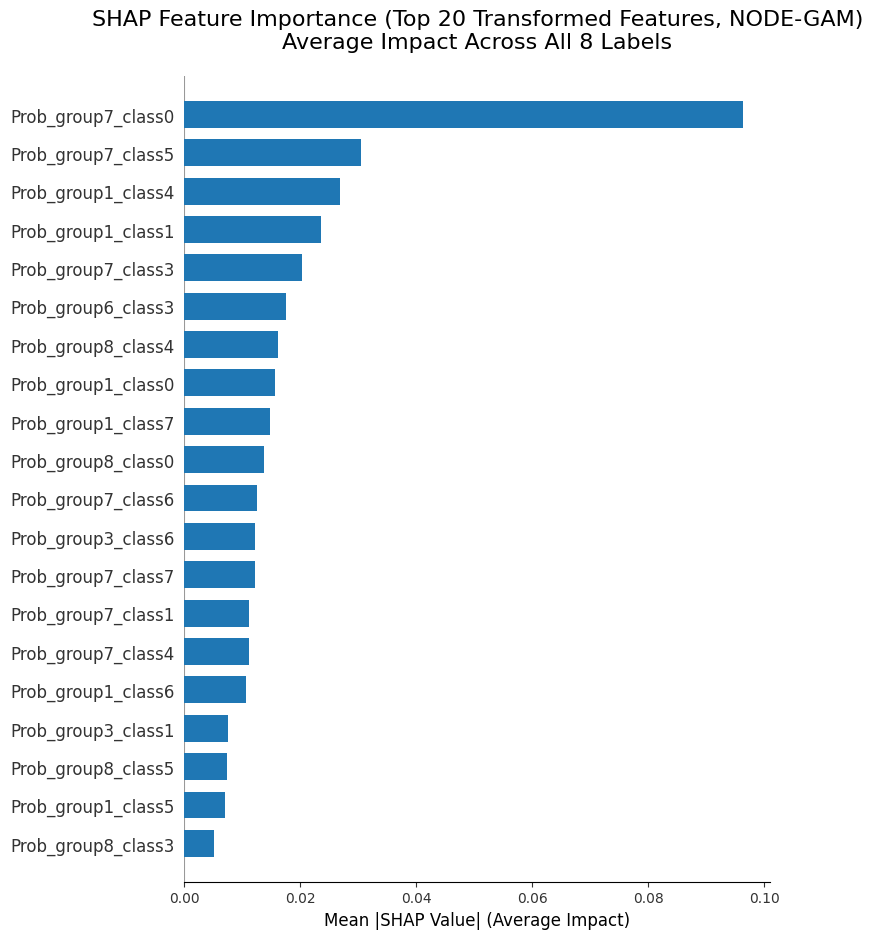

📌 Mapped SHAP values (improved) sample: [[[-5.98292279e-02 -5.98292279e-02 -5.98292279e-02 -5.98292279e-02
   -5.98292279e-02 -5.98292279e-02  5.66163298e-03  5.66163298e-03
    5.66163298e-03  5.66163298e-03]
  [ 2.02514747e-01  2.02514747e-01  2.02514747e-01  2.02514747e-01
    2.02514747e-01  2.02514747e-01  1.70008017e-04  1.70008017e-04
    1.70008017e-04  1.70008017e-04]
  [-1.24861556e-01 -1.24861556e-01 -1.24861556e-01 -1.24861556e-01
   -1.24861556e-01 -1.24861556e-01  8.83099261e-03  8.83099261e-03
    8.83099261e-03  8.83099261e-03]
  [-7.04387478e-02 -7.04387478e-02 -7.04387478e-02 -7.04387478e-02
   -7.04387478e-02 -7.04387478e-02  2.92840843e-03  2.92840843e-03
    2.92840843e-03  2.92840843e-03]
  [-3.25976439e-02 -3.25976439e-02 -3.25976439e-02 -3.25976439e-02
   -3.25976439e-02 -3.25976439e-02 -6.96388266e-04 -6.96388266e-04
   -6.96388266e-04 -6.96388266e-04]]

 [[-1.50516946e-01 -1.50516946e-01 -1.50516946e-01 -1.50516946e-01
   -1.50516946e-01 -1.50516946e-01  6.689

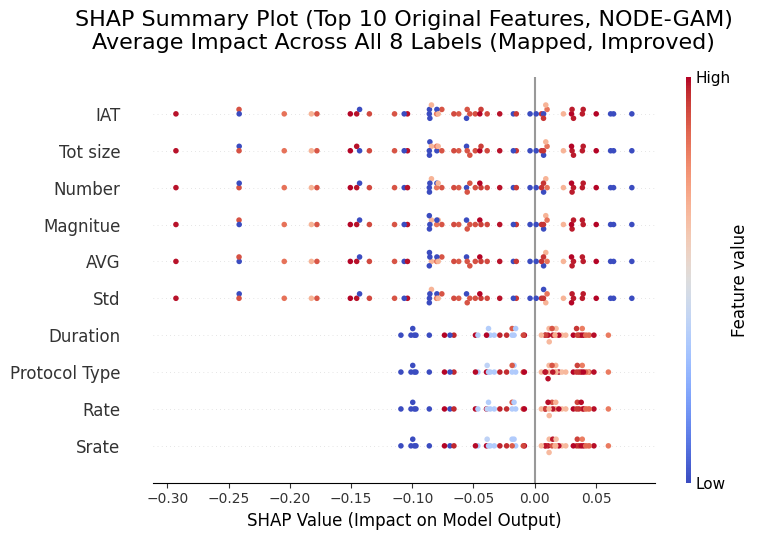

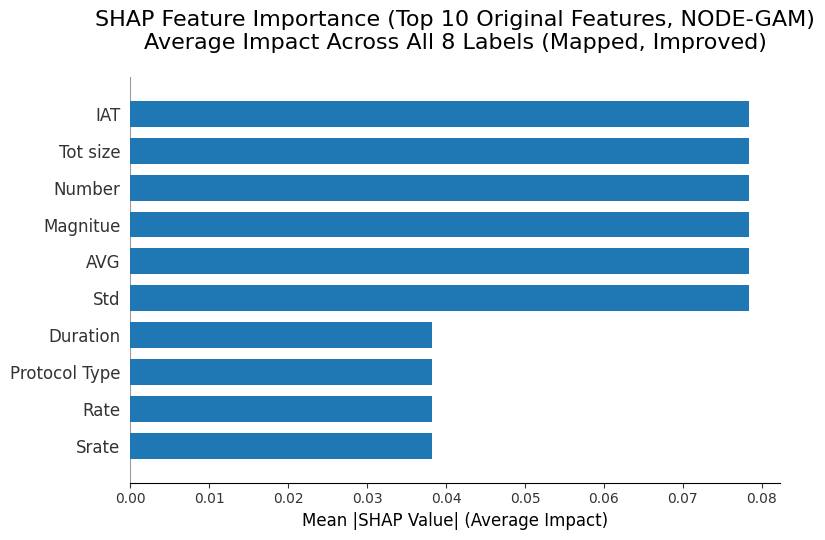

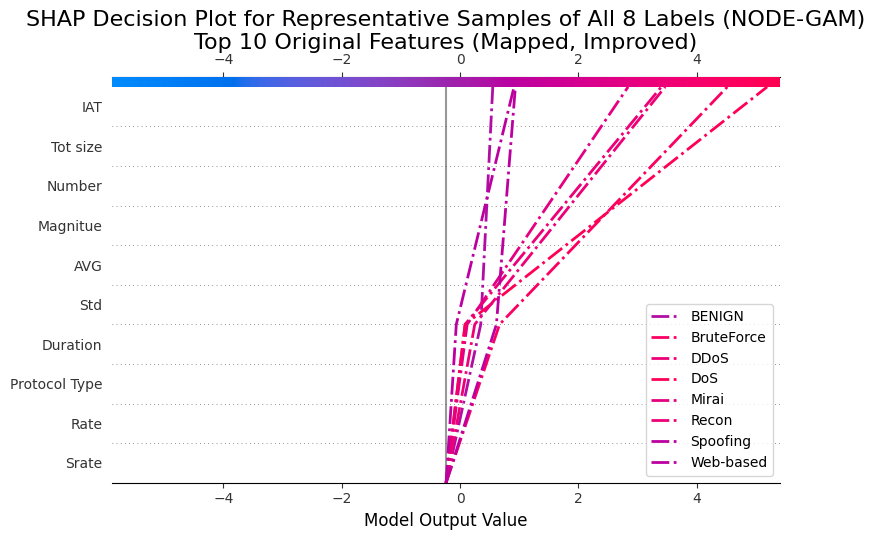


📌 Top 10 đặc trưng gốc quan trọng nhất (dựa trên SHAP trung bình 8 nhãn, cải tiến):
1. Magnitue: 0.0784
2. Number: 0.0784
3. AVG: 0.0784
4. Std: 0.0784
5. Tot size: 0.0784
6. IAT: 0.0784
7. Srate: 0.0383
8. Rate: 0.0383
9. Duration: 0.0383
10. Protocol Type: 0.0383

📊 Độ tương quan giữa feature importance (NODE-GAM) và SHAP (mapped, trung bình 8 nhãn, cải tiến): 0.5922

📌 Top 10 đặc trưng gốc quan trọng nhất (phương pháp cũ - Mean Absolute SHAP):
1. Magnitue: 0.0269
2. Number: 0.0269
3. AVG: 0.0269
4. Std: 0.0269
5. Tot size: 0.0269
6. IAT: 0.0269
7. Srate: 0.0145
8. Rate: 0.0145
9. Duration: 0.0145
10. Protocol Type: 0.0145

📊 Độ tương quan giữa SHAP values ánh xạ (cải tiến) và (cũ): 0.9976

📈 Sự khác biệt trung bình giữa SHAP values ánh xạ (cải tiến vs cũ): 0.0139
📈 Sự khác biệt tối đa giữa SHAP values ánh xạ (cải tiến vs cũ): 0.0515
🎉 Hoàn thành phân tích SHAP cho NODE-GAM (8 nhãn)!


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import shap
from tqdm import tqdm
import os
from collections import Counter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Định nghĩa các lớp cần thiết (giữ nguyên từ code gốc)
class FocalLoss(nn.Module):
    def __init__(self, gamma=3.5, alpha=None, reduction='mean', label_smoothing=0.1):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        inputs = torch.clamp(inputs, -100, 100)
        ce_loss = F.cross_entropy(inputs, targets, reduction='none', label_smoothing=self.label_smoothing)
        pt = torch.exp(-ce_loss)
        loss = ((1 - pt) ** self.gamma) * ce_loss
        if self.alpha is not None:
            alpha_t = self.alpha[targets]
            loss = alpha_t * loss
        if self.reduction == 'mean':
            return loss.mean()
        return loss

class FeatureSelector(nn.Module):
    def __init__(self, input_dim):
        super(FeatureSelector, self).__init__()
        self.importance_weights = nn.Parameter(torch.ones(input_dim) * 0.1)
        
    def forward(self, x):
        importance = torch.sigmoid(self.importance_weights)
        importance = importance / (importance.sum() + 1e-6)
        mask = importance.unsqueeze(0)
        return x * mask

class ObliviousDecisionTree(nn.Module):
    def __init__(self, embed_dim, depth, input_dim):
        super(ObliviousDecisionTree, self).__init__()
        self.depth = depth
        self.num_leaves = 2 ** depth
        self.input_dim = input_dim
        
        self.thresholds = nn.Parameter(torch.randn(depth, input_dim) * 0.1)
        self.feature_weights = nn.Parameter(torch.randn(depth, input_dim) * 0.1)
        self.attention = nn.Parameter(torch.randn(input_dim) * 0.1)
        self.leaf_projection = nn.Linear(embed_dim, self.num_leaves)
        
        nn.init.xavier_normal_(self.thresholds, gain=0.1)
        nn.init.xavier_normal_(self.feature_weights, gain=0.1)
        nn.init.xavier_normal_(self.leaf_projection.weight, gain=0.1)
        nn.init.zeros_(self.leaf_projection.bias)
        nn.init.normal_(self.attention, mean=0.0, std=0.1)

    def forward(self, x, input_features):
        batch_size = x.size(0)
        
        attention_weights = torch.sigmoid(self.attention)
        attention_weights = attention_weights / (attention_weights.sum() + 1e-6)
        selected_features = input_features * attention_weights.unsqueeze(0)
        
        scores = torch.matmul(selected_features, self.feature_weights.t())
        scores = scores + self.thresholds.sum(dim=-1).unsqueeze(0)
        decisions = torch.sigmoid(scores)
        
        leaf_indices = torch.zeros(batch_size, device=x.device, dtype=torch.long)
        for d in range(self.depth):
            leaf_indices = leaf_indices * 2 + (decisions[:, d] > 0.5).long()
        
        leaf_probs = torch.zeros(batch_size, self.num_leaves, device=x.device)
        leaf_probs.scatter_(1, leaf_indices.unsqueeze(-1), 1.0)
        
        out = self.leaf_projection(x)
        out = F.softmax(out, dim=-1) * leaf_probs
        return out

class NODEGAM(nn.Module):
    def __init__(self, input_dim, num_classes, embed_dim=192, num_trees=10, depth=6, num_layers=2, dropout=0.1):
        super(NODEGAM, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.embed_dim = embed_dim
        self.num_trees = num_trees
        self.depth = depth
        self.num_layers = num_layers
        self.dropout = dropout

        self.bn = nn.BatchNorm1d(input_dim)
        self.feature_selector = FeatureSelector(input_dim)
        self.feature_dim = 16
        self.feature_nets = nn.ModuleList([
            nn.Sequential(
                nn.Linear(1, self.feature_dim),
                nn.ReLU(),
                nn.Dropout(dropout),
                nn.Linear(self.feature_dim, self.feature_dim),
                nn.ReLU(),
                nn.Dropout(dropout)
            ) for _ in range(input_dim)
        ])

        self.concat_dim = self.feature_dim * input_dim
        self.feature_projection = nn.Linear(self.concat_dim, embed_dim)
        self.tree_layers = nn.ModuleList([
            nn.ModuleList([
                ObliviousDecisionTree(embed_dim, depth, input_dim)
                for _ in range(num_trees)
            ]) for _ in range(num_layers)
        ])
        self.tree_projections = nn.ModuleList([
            nn.Linear(2**depth, embed_dim) for _ in range(num_layers)
        ])
        self.tree_weights = nn.ParameterList([
            nn.Parameter(torch.ones(num_trees) / num_trees) for _ in range(num_layers)
        ])
        self.layer_norms = nn.ModuleList([nn.LayerNorm(embed_dim) for _ in range(num_layers)])
        self.fc_output = nn.Linear(embed_dim, num_classes)
        self.importance_layer = nn.Linear(embed_dim, input_dim)

        for net in self.feature_nets:
            for layer in net:
                if isinstance(layer, nn.Linear):
                    nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
                    if layer.bias is not None:
                        nn.init.zeros_(layer.bias)
        nn.init.kaiming_normal_(self.feature_projection.weight, nonlinearity='relu')
        nn.init.zeros_(self.feature_projection.bias)
        for proj in self.tree_projections:
            nn.init.kaiming_normal_(proj.weight, nonlinearity='relu')
            nn.init.zeros_(proj.bias)
        nn.init.kaiming_normal_(self.fc_output.weight, nonlinearity='relu')
        nn.init.zeros_(self.fc_output.bias)
        nn.init.kaiming_normal_(self.importance_layer.weight, nonlinearity='relu')
        nn.init.zeros_(self.importance_layer.bias)

    def forward(self, x):
        input_features = torch.clamp(self.bn(x), -50, 50)
        input_features = self.feature_selector(input_features)
        feature_outputs = []
        for i in range(self.input_dim):
            feat = input_features[:, i:i+1]
            feat_out = self.feature_nets[i](feat)
            feature_outputs.append(feat_out)
        x = torch.cat(feature_outputs, dim=1)
        x = self.feature_projection(x)

        for layer_idx in range(self.num_layers):
            tree_outputs = []
            for tree in self.tree_layers[layer_idx]:
                tree_out = tree(x, input_features)
                tree_outputs.append(tree_out)
            tree_weights = F.softmax(self.tree_weights[layer_idx], dim=0)
            tree_out = torch.stack(tree_outputs, dim=1)
            tree_out = torch.einsum('bnt,n->bt', tree_out, tree_weights)
            tree_out = self.tree_projections[layer_idx](tree_out)
            x = self.layer_norms[layer_idx](x + tree_out)

        output = self.fc_output(x)
        importance = torch.sigmoid(self.importance_layer(x))
        importance = torch.clamp(importance, min=1e-6, max=1-1e-6)
        sparsity_loss = torch.mean(-importance * torch.log(importance) - (1-importance) * torch.log(1-importance + 1e-6))
        masks = [importance]

        return output, sparsity_loss, masks

# Wrapper cho GradientExplainer
class NODEGAMWrapper(nn.Module):
    def __init__(self, model):
        super(NODEGAMWrapper, self).__init__()
        self.model = model

    def forward(self, x):
        output, _, _ = self.model(x)
        return output / torch.max(torch.abs(output))  # Chuẩn hóa logits như TabNet

# Thư mục lưu trữ
results_dir = "/kaggle/input/ketqua8nha/node-gam-8nhan-64/results"
output_dir = "processed_data"
Kq = "NODEGAM_8labels_64features_shap"
os.makedirs(Kq, exist_ok=True)
tqdm.write(f"📁 Đã tạo thư mục lưu kết quả: {Kq}")

# Kiểm tra sự tồn tại của các tệp dữ liệu
data_files = [
    f"{output_dir}/X_test_combined_8labels_46features.npy",
    f"{output_dir}/Y_test_encoded_8labels_46features.npy",
    f"{results_dir}/feature_importance_8labels_64features_nodegam.npy",
    f"{results_dir}/nodegam_8labels_64features.pth"
]
for file_path in data_files:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"❌ Tệp không tồn tại: {file_path}")

# Tải dữ liệu
try:
    X_test_combined = np.load(f"{output_dir}/X_test_combined_8labels_46features.npy")
    Y_test_encoded = np.load(f"{output_dir}/Y_test_encoded_8labels_46features.npy")
    feature_importance = np.load(f"{results_dir}/feature_importance_8labels_64features_nodegam.npy")
    tqdm.write("✅ Đã tải dữ liệu cần thiết cho NODE-GAM (8 nhãn, 64 đặc trưng)")
except Exception as e:
    tqdm.write(f"❌ Lỗi khi tải dữ liệu: {str(e)}")
    raise

# Kiểm tra shape
if X_test_combined.shape[1] != 64:
    raise ValueError(f"❌ Shape của X_test_combined không đúng: {X_test_combined.shape[1]}, kỳ vọng 64 đặc trưng")
if len(np.unique(Y_test_encoded)) != 8:
    raise ValueError(f"❌ Số nhãn không đúng: {len(np.unique(Y_test_encoded))}, kỳ vọng 8 nhãn")

# Kiểm tra shape của feature_importance
tqdm.write(f"📌 Shape của feature_importance: {feature_importance.shape}")
if len(feature_importance.shape) == 2 and feature_importance.shape[0] == 4096:
    feature_importance = feature_importance.mean(axis=0)
    tqdm.write(f"📌 Adjusted feature_importance shape to: {feature_importance.shape}")
if feature_importance.shape != (64,):
    tqdm.write(f"⚠️ feature_importance không có shape (64,): {feature_importance.shape}. Bỏ qua tính độ tương quan.")
    feature_importance_valid = False
else:
    feature_importance_valid = True

# Kiểm tra NaN/Inf và thống kê dữ liệu
tqdm.write("📊 Thống kê dữ liệu X_test_combined (trước chuẩn hóa):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")
tqdm.write(f"Mean: {np.mean(X_test_combined):.4f}, Std: {np.std(X_test_combined):.4f}")
tqdm.write(f"NaN: {np.any(np.isnan(X_test_combined))}, Inf: {np.any(np.isinf(X_test_combined))}")
if np.any(np.isnan(X_test_combined)) or np.any(np.isinf(X_test_combined)):
    tqdm.write("⚠️ Dữ liệu chứa NaN hoặc Inf. Đang xử lý...")
    X_test_combined = np.nan_to_num(X_test_combined, nan=0.0, posinf=1e6, neginf=-1e6)

# Chuẩn hóa dữ liệu
X_test_combined = (X_test_combined - X_test_combined.mean(axis=0)) / (X_test_combined.std(axis=0) + 1e-6)
tqdm.write("📊 Thống kê dữ liệu X_test_combined (sau chuẩn hóa):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")
tqdm.write(f"Mean: {np.mean(X_test_combined):.4f}, Std: {np.std(X_test_combined):.4f}")
tqdm.write(f"Outliers (abs > 10): {np.sum(np.abs(X_test_combined) > 10)}")

# Giới hạn giá trị để tránh outliers
X_test_combined = np.clip(X_test_combined, -10, 10)
tqdm.write("📊 Thống kê dữ liệu X_test_combined (sau clip):")
tqdm.write(f"Min: {np.min(X_test_combined):.4f}, Max: {np.max(X_test_combined):.4f}")

# Ánh xạ nhãn
label_map = {
    0: 'BENIGN',
    1: 'BruteForce',
    2: 'DDoS',
    3: 'DoS',
    4: 'Mirai',
    5: 'Recon',
    6: 'Spoofing',
    7: 'Web-based'
}
class_names = [label_map[i] for i in range(len(label_map))]
tqdm.write(f"📊 Đã ánh xạ 8 nhãn: {list(label_map.values())}")

# 46 đặc trưng gốc
feature_labels_original = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate',
    'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
    'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
    'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP',
    'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance',
    'Variance', 'Weight'
]

# Tên đặc trưng cho 64 xác suất
feature_names = [f"Prob_group{i+1}_class{j}" for i in range(8) for j in range(8)]
tqdm.write(f"📋 Các đặc trưng (64 xác suất): {feature_names}")

# Ánh xạ 46 đặc trưng gốc đến nhóm XGBoost
feature_to_group = {
    'flow_duration': 1, 'Header_Length': 1, 'Protocol Type': 1, 'Duration': 1, 'Rate': 1, 'Srate': 1,
    'Drate': 2, 'fin_flag_number': 2, 'syn_flag_number': 2, 'rst_flag_number': 2, 'psh_flag_number': 2, 'ack_flag_number': 2,
    'ece_flag_number': 3, 'cwr_flag_number': 3, 'ack_count': 3, 'syn_count': 3, 'fin_count': 3, 'urg_count': 3,
    'rst_count': 4, 'HTTP': 4, 'HTTPS': 4, 'DNS': 4, 'Telnet': 4, 'SMTP': 4,
    'SSH': 5, 'IRC': 5, 'TCP': 5, 'UDP': 5, 'DHCP': 5, 'ARP': 5,
    'ICMP': 6, 'IPv': 6, 'LLC': 6, 'Tot sum': 6, 'Min': 6, 'Max': 6,
    'AVG': 7, 'Std': 7, 'Tot size': 7, 'IAT': 7, 'Number': 7, 'Magnitue': 7,
    'Radius': 8, 'Covariance': 8, 'Variance': 8, 'Weight': 8
}

# Index của xác suất cho mỗi nhóm
group_indices = {
    1: range(0, 8),
    2: range(8, 16),
    3: range(16, 24),
    4: range(24, 32),
    5: range(32, 40),
    6: range(40, 48),
    7: range(48, 56),
    8: range(56, 64)
}
tqdm.write("Group indices:")
for group_idx in group_indices:
    tqdm.write(f"Group {group_idx} indices: {list(group_indices[group_idx])}")

# Thiết lập thiết bị và tải mô hình
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
try:
    model = NODEGAM(input_dim=64, num_classes=8, embed_dim=192, num_trees=10, depth=6, num_layers=2, dropout=0.1).to(device)
    model.load_state_dict(torch.load(f"{results_dir}/nodegam_8labels_64features.pth", weights_only=True))
    model.eval()
    tqdm.write("✅ Đã tải mô hình NODE-GAM thành công")

    # Hàm dự đoán cho GradientExplainer
    def predict_fn(inputs):
        inputs_tensor = torch.tensor(inputs, dtype=torch.float32).to(device)
        with torch.no_grad():
            outputs, _, _ = model(inputs_tensor)
            outputs = outputs / torch.max(torch.abs(outputs))  # Chuẩn hóa logits như TabNet
        return outputs.cpu().numpy()

    # Chuẩn bị dữ liệu cho SHAP
    indices = np.random.choice(X_test_combined.shape[0], 50, replace=False)
    X_test_np = X_test_combined[indices].copy()
    Y_test_np = Y_test_encoded[indices].copy()
    background = X_test_np[:10].copy()
    background_tensor = torch.tensor(background, dtype=torch.float32).to(device)
    input_tensor = torch.tensor(X_test_np, dtype=torch.float32).to(device)

    # Kiểm tra phân bố nhãn trong 50 mẫu
    label_distribution = Counter(Y_test_np)
    tqdm.write("\n📊 Phân bố nhãn trong 50 mẫu thử nghiệm:")
    for label_idx, count in label_distribution.items():
        tqdm.write(f"Nhãn {label_map[label_idx]}: {count} mẫu")

    # Sử dụng GradientExplainer
    wrapped_model = NODEGAMWrapper(model).to(device)
    explainer = shap.GradientExplainer(wrapped_model, background_tensor)
    shap_values = explainer.shap_values(input_tensor)
    tqdm.write(f"📌 SHAP values shape: {len(shap_values)} nhãn, mỗi nhãn có shape {shap_values[0].shape}")

    # Tính expected_value từ background data
    background_output = predict_fn(background)  # Shape: (10, 8)
    expected_value = np.mean(background_output, axis=0).reshape(8, 1)  # Shape: (8, 1)
    tqdm.write(f"📌 Expected value shape: {expected_value.shape}")

    # Kiểm tra sai số SHAP
    model_output = predict_fn(X_test_np)  # Shape: (50, 8)
    shap_sum = np.sum(shap_values, axis=2)  # Shape: (8, 50)
    shap_sum = shap_sum + expected_value  # Broadcasting thành (8, 50)
    shap_sum = shap_sum.T  # Shape: (50, 8)
    diff = np.abs(model_output - shap_sum)
    tqdm.write(f"Max SHAP difference: {np.max(diff):.4f}")
    tqdm.write(f"Mean SHAP difference: {np.mean(diff):.4f}")

    # Tính SHAP values trung bình tuyệt đối trên tất cả các nhãn
    shap_values_mean_abs_all = np.zeros((64,))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        shap_values_mean_abs = np.mean(np.abs(shap_values_label), axis=0)
        shap_values_mean_abs_all += shap_values_mean_abs
    shap_values_mean_abs_all /= 8

    # Top 20 đặc trưng biến đổi
    top_k = 20
    top_indices = np.argsort(shap_values_mean_abs_all)[::-1][:top_k]
    top_features = [feature_names[i] for i in top_indices]
    top_shap_values = np.stack([shap_values[label_idx][:, top_indices] for label_idx in range(8)], axis=0)
    top_X_test = X_test_np[:, top_indices]

    # SHAP Summary Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="dot",
        show=False,
        max_display=top_k,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 20 Transformed Features, NODE-GAM)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_nodegam_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 20 đặc trưng biến đổi
    plt.figure(figsize=(12, 8))
    shap.summary_plot(
        np.mean(top_shap_values, axis=0),
        top_X_test,
        feature_names=top_features,
        plot_type="bar",
        show=False,
        max_display=top_k,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 20 Transformed Features, NODE-GAM)\nAverage Impact Across All 8 Labels", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_nodegam_top20_all_labels.png", bbox_inches="tight", dpi=300)
    plt.show()

    # Ánh xạ SHAP values về 46 đặc trưng gốc (Weighted Sum SHAP như TabNet)
    shap_values_mapped = np.zeros((8, X_test_np.shape[0], 46))
    X_test_mapped = np.zeros((X_test_np.shape[0], 46))

    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            group_shap = shap_values_label[:, prob_indices]
            weights = np.abs(group_shap) / (np.sum(np.abs(group_shap), axis=1, keepdims=True) + 1e-6)
            weighted_shap = np.sum(group_shap * weights, axis=1)
            shap_values_mapped[label_idx, :, i] = weighted_shap
            if label_idx == 0:
                X_test_mapped[:, i] = np.mean(X_test_np[:, prob_indices], axis=1)

    tqdm.write(f"📌 Mapped SHAP values (improved) sample: {shap_values_mapped[:, :5, :10]}")
    shap_values_mapped = shap_values_mapped / (np.abs(shap_values_mapped).max() + 1e-6)
    tqdm.write(f"📌 Mapped SHAP values (after normalization) sample: {shap_values_mapped[:, :5, :10]}")

    # Trung bình SHAP values trên tất cả 8 nhãn
    shap_values_mapped_avg = np.mean(shap_values_mapped, axis=0)

    # Chọn top 10 đặc trưng gốc quan trọng nhất
    shap_values_mean = np.mean(np.abs(shap_values_mapped_avg), axis=0)
    top_k_orig = 10
    top_indices_orig = np.argsort(shap_values_mean)[::-1][:top_k_orig]
    top_features_orig = [feature_labels_original[i] for i in top_indices_orig]
    top_shap_values_orig = shap_values_mapped_avg[:, top_indices_orig]
    top_X_test_orig = X_test_mapped[:, top_indices_orig]

    # SHAP Summary Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="dot",
        show=False,
        max_display=top_k_orig,
        cmap=plt.cm.coolwarm
    )
    plt.title("SHAP Summary Plot (Top 10 Original Features, NODE-GAM)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_summary_nodegam_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Bar Plot cho top 10 đặc trưng gốc
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        top_shap_values_orig,
        top_X_test_orig,
        feature_names=top_features_orig,
        plot_type="bar",
        show=False,
        max_display=top_k_orig,
        color="#1f77b4"
    )
    plt.title("SHAP Feature Importance (Top 10 Original Features, NODE-GAM)\nAverage Impact Across All 8 Labels (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Mean |SHAP Value| (Average Impact)", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=12, rotation=0)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_bar_nodegam_top10_original_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # SHAP Decision Plot cho một mẫu đại diện của mỗi nhãn
    sample_indices = []
    sample_labels = []
    for label_idx in range(8):
        label_name = label_map[label_idx]
        idx = np.where(Y_test_np == label_idx)[0][0] if np.any(Y_test_np == label_idx) else 0
        sample_indices.append(idx)
        sample_labels.append(label_name)

    selected_shap_values = np.zeros((len(sample_indices), top_k_orig))
    selected_expected_values = []
    for i, (label_idx, sample_idx) in enumerate(zip(range(8), sample_indices)):
        selected_shap_values[i, :] = shap_values_mapped[label_idx, sample_idx, top_indices_orig]
        selected_expected_values.append(np.mean(predict_fn(background)[:, label_idx]))

    plt.figure(figsize=(12, 8))
    shap.decision_plot(
        base_value=np.mean(selected_expected_values),
        shap_values=selected_shap_values,
        features=top_X_test_orig[sample_indices, :],
        feature_names=top_features_orig,
        link='identity',
        highlight=[i for i in range(8)],
        legend_labels=sample_labels,
        legend_location='lower right',
        show=False
    )
    plt.title("SHAP Decision Plot for Representative Samples of All 8 Labels (NODE-GAM)\nTop 10 Original Features (Mapped, Improved)", fontsize=16, pad=20)
    plt.xlabel("Model Output Value", fontsize=12)
    plt.gca().yaxis.set_tick_params(labelsize=10)
    plt.gca().xaxis.set_tick_params(labelsize=10)
    plt.tight_layout()
    plt.savefig(f"{Kq}/shap_decision_top10_original_nodegam_improved.png", bbox_inches="tight", dpi=300)
    plt.show()

    # In top 10 đặc trưng gốc quan trọng nhất
    tqdm.write(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (dựa trên SHAP trung bình 8 nhãn, cải tiến):")
    for i, idx in enumerate(top_indices_orig):
        tqdm.write(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean[idx]:.4f}")

    # Tính độ tương quan với feature_importance
    if feature_importance_valid:
        avg_importance_original = np.zeros(46)
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            avg_importance_original[i] = np.mean(feature_importance[prob_indices])
        correlation = np.corrcoef(avg_importance_original, shap_values_mean)[0, 1]
        tqdm.write(f"\n📊 Độ tương quan giữa feature importance (NODE-GAM) và SHAP (mapped, trung bình 8 nhãn, cải tiến): {correlation:.4f}")
    else:
        tqdm.write("\n📊 Bỏ qua tính độ tương quan do feature_importance không hợp lệ.")

    # Phân tích độ nhạy: So sánh với phương pháp cũ (Mean Absolute SHAP)
    shap_values_mapped_old = np.zeros((8, X_test_np.shape[0], 46))
    for label_idx in range(8):
        shap_values_label = shap_values[label_idx]
        for i, feature in enumerate(feature_labels_original):
            group_idx = feature_to_group[feature]
            prob_indices = group_indices[group_idx]
            group_shap = shap_values_label[:, prob_indices]
            abs_group_shap = np.abs(group_shap)
            mean_abs_shap = np.mean(abs_group_shap, axis=1)
            sign = np.sign(np.sum(group_shap, axis=1))
            shap_values_mapped_old[label_idx, :, i] = mean_abs_shap * sign

    shap_values_mapped_old_avg = np.mean(shap_values_mapped_old, axis=0)
    shap_values_mean_old = np.mean(np.abs(shap_values_mapped_old_avg), axis=0)

    # So sánh top 10 đặc trưng giữa hai phương pháp
    top_indices_shap_old = np.argsort(shap_values_mean_old)[::-1][:top_k_orig]
    tqdm.write(f"\n📌 Top {top_k_orig} đặc trưng gốc quan trọng nhất (phương pháp cũ - Mean Absolute SHAP):")
    for i, idx in enumerate(top_indices_shap_old):
        tqdm.write(f"{i+1}. {feature_labels_original[idx]}: {shap_values_mean_old[idx]:.4f}")

    # Tính độ tương quan giữa hai phương pháp ánh xạ
    correlation_methods = np.corrcoef(shap_values_mean, shap_values_mean_old)[0, 1]
    tqdm.write(f"\n📊 Độ tương quan giữa SHAP values ánh xạ (cải tiến) và (cũ): {correlation_methods:.4f}")

    # Thống kê sự khác biệt
    diff = np.abs(shap_values_mean - shap_values_mean_old)
    tqdm.write(f"\n📈 Sự khác biệt trung bình giữa SHAP values ánh xạ (cải tiến vs cũ): {np.mean(diff):.4f}")
    tqdm.write(f"📈 Sự khác biệt tối đa giữa SHAP values ánh xạ (cải tiến vs cũ): {np.max(diff):.4f}")

except Exception as e:
    tqdm.write(f"❌ Lỗi khi tính SHAP values cho NODE-GAM: {str(e)}")
    raise

tqdm.write("🎉 Hoàn thành phân tích SHAP cho NODE-GAM (8 nhãn)!")

# **TẢI KẾT QUẢ**

In [ ]:
import os
import zipfile
from IPython.display import FileLink

# Đường dẫn đến các thư mục
processed_data_dir = "/kaggle/working/processed_data"
results_dir = "/kaggle/working/TabR_8labels_46features_shap"

# Tạo file ZIP cho thư mục processed_data
# processed_zip = "/kaggle/working/processed_data.zip"
# with zipfile.ZipFile(processed_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
#     for root, dirs, files in os.walk(processed_data_dir):
#         for file in files:
#             file_path = os.path.join(root, file)
#             # Thêm file vào ZIP với đường dẫn tương đối
#             zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Tạo file ZIP cho thư mục results
results_zip = "/kaggle/working/results.zip"
with zipfile.ZipFile(results_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(results_dir):
        for file in files:
            file_path = os.path.join(root, file)
            # Thêm file vào ZIP với đường dẫn tương đối
            zipf.write(file_path, os.path.relpath(file_path, "/kaggle/working"))

# Hiển thị liên kết tải xuống
# print("Tải xuống processed_data.zip:")
# display(FileLink("processed_data.zip"))

print("Tải xuống results.zip:")
display(FileLink("results.zip"))